In [1]:
import os
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch.utils.data import DataLoader

from data import CustomDataset
from engine import train, test_step, test_step_single
from model import UNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

/home/abtin/anaconda3/envs/torchspace/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cuda


In [2]:
train_dir, test_dir = './generated_images/train/', './generated_images/test/'
train_data = CustomDataset(train_dir)
test_data = CustomDataset(test_dir, train=False)

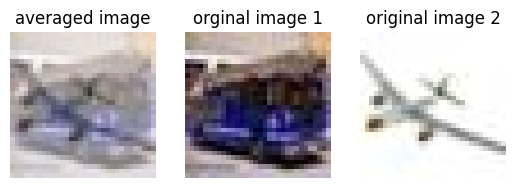

In [8]:
avg_img, img1, img2 = next(iter(train_data))

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(avg_img.permute(1, 2, 0))
plt.title("averaged image")

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img1.permute(1, 2, 0))
plt.title("orginal image 1")

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img2.permute(1, 2, 0))
plt.title("original image 2")

plt.show()

In [9]:
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(
        train_data,
        batch_size=32,
        shuffle=True,
        num_workers=NUM_WORKERS,
        pin_memory=True,
    )

test_dataloader = DataLoader(
        test_data,
        batch_size=32,
        shuffle=True,
        num_workers=NUM_WORKERS,
        pin_memory=True,
    )

In [12]:
model = UNet().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

In [13]:
results = train(
    model,
    train_dataloader,
    optimizer, 
    loss_fn,
    epochs=2000,
    device=device)

  0%|                                        | 1/2000 [00:02<1:29:29,  2.69s/it]

Epoch: 1 | train_loss: 0.0769 | 


  0%|                                        | 2/2000 [00:05<1:28:49,  2.67s/it]

Epoch: 2 | train_loss: 0.0630 | 


  0%|                                        | 3/2000 [00:08<1:29:16,  2.68s/it]

Epoch: 3 | train_loss: 0.0606 | 


  0%|                                        | 4/2000 [00:10<1:29:01,  2.68s/it]

Epoch: 4 | train_loss: 0.0582 | 


  0%|                                        | 5/2000 [00:13<1:28:36,  2.66s/it]

Epoch: 5 | train_loss: 0.0615 | 


  0%|                                        | 6/2000 [00:16<1:28:29,  2.66s/it]

Epoch: 6 | train_loss: 0.0598 | 


  0%|▏                                       | 7/2000 [00:18<1:28:38,  2.67s/it]

Epoch: 7 | train_loss: 0.0602 | 


  0%|▏                                       | 8/2000 [00:21<1:28:43,  2.67s/it]

Epoch: 8 | train_loss: 0.0577 | 


  0%|▏                                       | 9/2000 [00:24<1:28:32,  2.67s/it]

Epoch: 9 | train_loss: 0.0584 | 


  0%|▏                                      | 10/2000 [00:26<1:28:22,  2.66s/it]

Epoch: 10 | train_loss: 0.0574 | 


  1%|▏                                      | 11/2000 [00:29<1:28:44,  2.68s/it]

Epoch: 11 | train_loss: 0.0568 | 


  1%|▏                                      | 12/2000 [00:32<1:28:32,  2.67s/it]

Epoch: 12 | train_loss: 0.0602 | 


  1%|▎                                      | 13/2000 [00:34<1:28:35,  2.68s/it]

Epoch: 13 | train_loss: 0.0590 | 


  1%|▎                                      | 14/2000 [00:37<1:28:19,  2.67s/it]

Epoch: 14 | train_loss: 0.0560 | 


  1%|▎                                      | 15/2000 [00:40<1:28:13,  2.67s/it]

Epoch: 15 | train_loss: 0.0576 | 


  1%|▎                                      | 16/2000 [00:42<1:28:05,  2.66s/it]

Epoch: 16 | train_loss: 0.0587 | 


  1%|▎                                      | 17/2000 [00:45<1:28:03,  2.66s/it]

Epoch: 17 | train_loss: 0.0569 | 


  1%|▎                                      | 18/2000 [00:48<1:28:00,  2.66s/it]

Epoch: 18 | train_loss: 0.0571 | 


  1%|▎                                      | 19/2000 [00:50<1:28:02,  2.67s/it]

Epoch: 19 | train_loss: 0.0558 | 


  1%|▍                                      | 20/2000 [00:53<1:28:09,  2.67s/it]

Epoch: 20 | train_loss: 0.0551 | 


  1%|▍                                      | 21/2000 [00:56<1:28:03,  2.67s/it]

Epoch: 21 | train_loss: 0.0533 | 


  1%|▍                                      | 22/2000 [00:58<1:27:55,  2.67s/it]

Epoch: 22 | train_loss: 0.0560 | 


  1%|▍                                      | 23/2000 [01:01<1:28:06,  2.67s/it]

Epoch: 23 | train_loss: 0.0529 | 


  1%|▍                                      | 24/2000 [01:04<1:27:58,  2.67s/it]

Epoch: 24 | train_loss: 0.0538 | 


  1%|▍                                      | 25/2000 [01:06<1:27:50,  2.67s/it]

Epoch: 25 | train_loss: 0.0545 | 


  1%|▌                                      | 26/2000 [01:09<1:27:45,  2.67s/it]

Epoch: 26 | train_loss: 0.0518 | 


  1%|▌                                      | 27/2000 [01:12<1:27:38,  2.67s/it]

Epoch: 27 | train_loss: 0.0525 | 


  1%|▌                                      | 28/2000 [01:14<1:27:48,  2.67s/it]

Epoch: 28 | train_loss: 0.0522 | 


  1%|▌                                      | 29/2000 [01:17<1:27:46,  2.67s/it]

Epoch: 29 | train_loss: 0.0537 | 


  2%|▌                                      | 30/2000 [01:20<1:27:36,  2.67s/it]

Epoch: 30 | train_loss: 0.0524 | 


  2%|▌                                      | 31/2000 [01:22<1:27:29,  2.67s/it]

Epoch: 31 | train_loss: 0.0538 | 


  2%|▌                                      | 32/2000 [01:25<1:27:32,  2.67s/it]

Epoch: 32 | train_loss: 0.0494 | 


  2%|▋                                      | 33/2000 [01:28<1:27:30,  2.67s/it]

Epoch: 33 | train_loss: 0.0493 | 


  2%|▋                                      | 34/2000 [01:30<1:27:22,  2.67s/it]

Epoch: 34 | train_loss: 0.0527 | 


  2%|▋                                      | 35/2000 [01:33<1:27:28,  2.67s/it]

Epoch: 35 | train_loss: 0.0518 | 


  2%|▋                                      | 36/2000 [01:36<1:27:18,  2.67s/it]

Epoch: 36 | train_loss: 0.0499 | 


  2%|▋                                      | 37/2000 [01:38<1:27:10,  2.66s/it]

Epoch: 37 | train_loss: 0.0525 | 


  2%|▋                                      | 38/2000 [01:41<1:27:29,  2.68s/it]

Epoch: 38 | train_loss: 0.0505 | 


  2%|▊                                      | 39/2000 [01:44<1:27:37,  2.68s/it]

Epoch: 39 | train_loss: 0.0490 | 


  2%|▊                                      | 40/2000 [01:46<1:27:34,  2.68s/it]

Epoch: 40 | train_loss: 0.0493 | 


  2%|▊                                      | 41/2000 [01:49<1:27:38,  2.68s/it]

Epoch: 41 | train_loss: 0.0482 | 


  2%|▊                                      | 42/2000 [01:52<1:27:37,  2.68s/it]

Epoch: 42 | train_loss: 0.0464 | 


  2%|▊                                      | 43/2000 [01:54<1:27:40,  2.69s/it]

Epoch: 43 | train_loss: 0.0481 | 


  2%|▊                                      | 44/2000 [01:57<1:27:35,  2.69s/it]

Epoch: 44 | train_loss: 0.0466 | 


  2%|▉                                      | 45/2000 [02:00<1:27:13,  2.68s/it]

Epoch: 45 | train_loss: 0.0457 | 


  2%|▉                                      | 46/2000 [02:02<1:27:05,  2.67s/it]

Epoch: 46 | train_loss: 0.0451 | 


  2%|▉                                      | 47/2000 [02:05<1:27:07,  2.68s/it]

Epoch: 47 | train_loss: 0.0457 | 


  2%|▉                                      | 48/2000 [02:08<1:27:10,  2.68s/it]

Epoch: 48 | train_loss: 0.0482 | 


  2%|▉                                      | 49/2000 [02:10<1:27:00,  2.68s/it]

Epoch: 49 | train_loss: 0.0455 | 


  2%|▉                                      | 50/2000 [02:13<1:26:50,  2.67s/it]

Epoch: 50 | train_loss: 0.0444 | 


  3%|▉                                      | 51/2000 [02:16<1:26:37,  2.67s/it]

Epoch: 51 | train_loss: 0.0446 | 


  3%|█                                      | 52/2000 [02:18<1:26:30,  2.66s/it]

Epoch: 52 | train_loss: 0.0447 | 


  3%|█                                      | 53/2000 [02:21<1:26:22,  2.66s/it]

Epoch: 53 | train_loss: 0.0465 | 


  3%|█                                      | 54/2000 [02:24<1:26:45,  2.67s/it]

Epoch: 54 | train_loss: 0.0451 | 


  3%|█                                      | 55/2000 [02:26<1:26:38,  2.67s/it]

Epoch: 55 | train_loss: 0.0442 | 


  3%|█                                      | 56/2000 [02:29<1:26:25,  2.67s/it]

Epoch: 56 | train_loss: 0.0434 | 


  3%|█                                      | 57/2000 [02:32<1:26:17,  2.66s/it]

Epoch: 57 | train_loss: 0.0417 | 


  3%|█▏                                     | 58/2000 [02:34<1:26:36,  2.68s/it]

Epoch: 58 | train_loss: 0.0429 | 


  3%|█▏                                     | 59/2000 [02:37<1:26:40,  2.68s/it]

Epoch: 59 | train_loss: 0.0416 | 


  3%|█▏                                     | 60/2000 [02:40<1:26:30,  2.68s/it]

Epoch: 60 | train_loss: 0.0418 | 


  3%|█▏                                     | 61/2000 [02:43<1:26:40,  2.68s/it]

Epoch: 61 | train_loss: 0.0422 | 


  3%|█▏                                     | 62/2000 [02:45<1:26:48,  2.69s/it]

Epoch: 62 | train_loss: 0.0404 | 


  3%|█▏                                     | 63/2000 [02:48<1:26:41,  2.69s/it]

Epoch: 63 | train_loss: 0.0419 | 


  3%|█▏                                     | 64/2000 [02:51<1:26:39,  2.69s/it]

Epoch: 64 | train_loss: 0.0416 | 


  3%|█▎                                     | 65/2000 [02:53<1:26:20,  2.68s/it]

Epoch: 65 | train_loss: 0.0413 | 


  3%|█▎                                     | 66/2000 [02:56<1:26:13,  2.67s/it]

Epoch: 66 | train_loss: 0.0421 | 


  3%|█▎                                     | 67/2000 [02:59<1:26:08,  2.67s/it]

Epoch: 67 | train_loss: 0.0418 | 


  3%|█▎                                     | 68/2000 [03:01<1:25:58,  2.67s/it]

Epoch: 68 | train_loss: 0.0418 | 


  3%|█▎                                     | 69/2000 [03:04<1:25:48,  2.67s/it]

Epoch: 69 | train_loss: 0.0389 | 


  4%|█▎                                     | 70/2000 [03:07<1:25:42,  2.66s/it]

Epoch: 70 | train_loss: 0.0394 | 


  4%|█▍                                     | 71/2000 [03:09<1:25:37,  2.66s/it]

Epoch: 71 | train_loss: 0.0403 | 


  4%|█▍                                     | 72/2000 [03:12<1:25:39,  2.67s/it]

Epoch: 72 | train_loss: 0.0399 | 


  4%|█▍                                     | 73/2000 [03:15<1:25:30,  2.66s/it]

Epoch: 73 | train_loss: 0.0388 | 


  4%|█▍                                     | 74/2000 [03:17<1:25:23,  2.66s/it]

Epoch: 74 | train_loss: 0.0389 | 


  4%|█▍                                     | 75/2000 [03:20<1:25:20,  2.66s/it]

Epoch: 75 | train_loss: 0.0382 | 


  4%|█▍                                     | 76/2000 [03:23<1:25:17,  2.66s/it]

Epoch: 76 | train_loss: 0.0375 | 


  4%|█▌                                     | 77/2000 [03:25<1:25:17,  2.66s/it]

Epoch: 77 | train_loss: 0.0372 | 


  4%|█▌                                     | 78/2000 [03:28<1:25:19,  2.66s/it]

Epoch: 78 | train_loss: 0.0389 | 


  4%|█▌                                     | 79/2000 [03:31<1:25:17,  2.66s/it]

Epoch: 79 | train_loss: 0.0376 | 


  4%|█▌                                     | 80/2000 [03:33<1:25:05,  2.66s/it]

Epoch: 80 | train_loss: 0.0367 | 


  4%|█▌                                     | 81/2000 [03:36<1:25:02,  2.66s/it]

Epoch: 81 | train_loss: 0.0374 | 


  4%|█▌                                     | 82/2000 [03:38<1:25:03,  2.66s/it]

Epoch: 82 | train_loss: 0.0381 | 


  4%|█▌                                     | 83/2000 [03:41<1:24:55,  2.66s/it]

Epoch: 83 | train_loss: 0.0403 | 


  4%|█▋                                     | 84/2000 [03:44<1:24:57,  2.66s/it]

Epoch: 84 | train_loss: 0.0381 | 


  4%|█▋                                     | 85/2000 [03:46<1:24:50,  2.66s/it]

Epoch: 85 | train_loss: 0.0376 | 


  4%|█▋                                     | 86/2000 [03:49<1:24:52,  2.66s/it]

Epoch: 86 | train_loss: 0.0362 | 


  4%|█▋                                     | 87/2000 [03:52<1:25:09,  2.67s/it]

Epoch: 87 | train_loss: 0.0359 | 


  4%|█▋                                     | 88/2000 [03:54<1:24:59,  2.67s/it]

Epoch: 88 | train_loss: 0.0356 | 


  4%|█▋                                     | 89/2000 [03:57<1:24:54,  2.67s/it]

Epoch: 89 | train_loss: 0.0354 | 


  4%|█▊                                     | 90/2000 [04:00<1:24:55,  2.67s/it]

Epoch: 90 | train_loss: 0.0352 | 


  5%|█▊                                     | 91/2000 [04:02<1:24:50,  2.67s/it]

Epoch: 91 | train_loss: 0.0347 | 


  5%|█▊                                     | 92/2000 [04:05<1:24:47,  2.67s/it]

Epoch: 92 | train_loss: 0.0348 | 


  5%|█▊                                     | 93/2000 [04:08<1:24:45,  2.67s/it]

Epoch: 93 | train_loss: 0.0339 | 


  5%|█▊                                     | 94/2000 [04:10<1:24:31,  2.66s/it]

Epoch: 94 | train_loss: 0.0348 | 


  5%|█▊                                     | 95/2000 [04:13<1:24:38,  2.67s/it]

Epoch: 95 | train_loss: 0.0333 | 


  5%|█▊                                     | 96/2000 [04:16<1:24:27,  2.66s/it]

Epoch: 96 | train_loss: 0.0335 | 


  5%|█▉                                     | 97/2000 [04:18<1:24:25,  2.66s/it]

Epoch: 97 | train_loss: 0.0349 | 


  5%|█▉                                     | 98/2000 [04:21<1:24:14,  2.66s/it]

Epoch: 98 | train_loss: 0.0356 | 


  5%|█▉                                     | 99/2000 [04:24<1:24:11,  2.66s/it]

Epoch: 99 | train_loss: 0.0339 | 


  5%|█▉                                    | 100/2000 [04:26<1:24:21,  2.66s/it]

Epoch: 100 | train_loss: 0.0331 | 


  5%|█▉                                    | 101/2000 [04:29<1:24:12,  2.66s/it]

Epoch: 101 | train_loss: 0.0322 | 


  5%|█▉                                    | 102/2000 [04:32<1:24:04,  2.66s/it]

Epoch: 102 | train_loss: 0.0331 | 


  5%|█▉                                    | 103/2000 [04:34<1:24:21,  2.67s/it]

Epoch: 103 | train_loss: 0.0329 | 


  5%|█▉                                    | 104/2000 [04:37<1:24:09,  2.66s/it]

Epoch: 104 | train_loss: 0.0336 | 


  5%|█▉                                    | 105/2000 [04:40<1:24:11,  2.67s/it]

Epoch: 105 | train_loss: 0.0323 | 


  5%|██                                    | 106/2000 [04:42<1:24:03,  2.66s/it]

Epoch: 106 | train_loss: 0.0321 | 


  5%|██                                    | 107/2000 [04:45<1:24:05,  2.67s/it]

Epoch: 107 | train_loss: 0.0312 | 


  5%|██                                    | 108/2000 [04:48<1:23:55,  2.66s/it]

Epoch: 108 | train_loss: 0.0316 | 


  5%|██                                    | 109/2000 [04:50<1:24:02,  2.67s/it]

Epoch: 109 | train_loss: 0.0321 | 


  6%|██                                    | 110/2000 [04:53<1:24:03,  2.67s/it]

Epoch: 110 | train_loss: 0.0323 | 


  6%|██                                    | 111/2000 [04:56<1:23:51,  2.66s/it]

Epoch: 111 | train_loss: 0.0315 | 


  6%|██▏                                   | 112/2000 [04:58<1:23:51,  2.66s/it]

Epoch: 112 | train_loss: 0.0318 | 


  6%|██▏                                   | 113/2000 [05:01<1:23:54,  2.67s/it]

Epoch: 113 | train_loss: 0.0301 | 


  6%|██▏                                   | 114/2000 [05:04<1:23:59,  2.67s/it]

Epoch: 114 | train_loss: 0.0300 | 


  6%|██▏                                   | 115/2000 [05:06<1:23:49,  2.67s/it]

Epoch: 115 | train_loss: 0.0302 | 


  6%|██▏                                   | 116/2000 [05:09<1:23:38,  2.66s/it]

Epoch: 116 | train_loss: 0.0346 | 


  6%|██▏                                   | 117/2000 [05:12<1:23:41,  2.67s/it]

Epoch: 117 | train_loss: 0.0337 | 


  6%|██▏                                   | 118/2000 [05:14<1:23:34,  2.66s/it]

Epoch: 118 | train_loss: 0.0320 | 


  6%|██▎                                   | 119/2000 [05:17<1:23:28,  2.66s/it]

Epoch: 119 | train_loss: 0.0300 | 


  6%|██▎                                   | 120/2000 [05:20<1:23:30,  2.67s/it]

Epoch: 120 | train_loss: 0.0299 | 


  6%|██▎                                   | 121/2000 [05:22<1:23:21,  2.66s/it]

Epoch: 121 | train_loss: 0.0305 | 


  6%|██▎                                   | 122/2000 [05:25<1:23:33,  2.67s/it]

Epoch: 122 | train_loss: 0.0304 | 


  6%|██▎                                   | 123/2000 [05:28<1:23:45,  2.68s/it]

Epoch: 123 | train_loss: 0.0291 | 


  6%|██▎                                   | 124/2000 [05:30<1:23:28,  2.67s/it]

Epoch: 124 | train_loss: 0.0282 | 


  6%|██▍                                   | 125/2000 [05:33<1:23:41,  2.68s/it]

Epoch: 125 | train_loss: 0.0300 | 


  6%|██▍                                   | 126/2000 [05:36<1:23:24,  2.67s/it]

Epoch: 126 | train_loss: 0.0288 | 


  6%|██▍                                   | 127/2000 [05:38<1:23:12,  2.67s/it]

Epoch: 127 | train_loss: 0.0282 | 


  6%|██▍                                   | 128/2000 [05:41<1:23:02,  2.66s/it]

Epoch: 128 | train_loss: 0.0286 | 


  6%|██▍                                   | 129/2000 [05:44<1:22:55,  2.66s/it]

Epoch: 129 | train_loss: 0.0282 | 


  6%|██▍                                   | 130/2000 [05:46<1:22:52,  2.66s/it]

Epoch: 130 | train_loss: 0.0275 | 


  7%|██▍                                   | 131/2000 [05:49<1:22:54,  2.66s/it]

Epoch: 131 | train_loss: 0.0282 | 


  7%|██▌                                   | 132/2000 [05:52<1:22:48,  2.66s/it]

Epoch: 132 | train_loss: 0.0284 | 


  7%|██▌                                   | 133/2000 [05:54<1:22:41,  2.66s/it]

Epoch: 133 | train_loss: 0.0287 | 


  7%|██▌                                   | 134/2000 [05:57<1:22:52,  2.66s/it]

Epoch: 134 | train_loss: 0.0274 | 


  7%|██▌                                   | 135/2000 [06:00<1:22:45,  2.66s/it]

Epoch: 135 | train_loss: 0.0272 | 


  7%|██▌                                   | 136/2000 [06:02<1:22:47,  2.67s/it]

Epoch: 136 | train_loss: 0.0275 | 


  7%|██▌                                   | 137/2000 [06:05<1:22:40,  2.66s/it]

Epoch: 137 | train_loss: 0.0273 | 


  7%|██▌                                   | 138/2000 [06:08<1:22:40,  2.66s/it]

Epoch: 138 | train_loss: 0.0266 | 


  7%|██▋                                   | 139/2000 [06:10<1:22:46,  2.67s/it]

Epoch: 139 | train_loss: 0.0263 | 


  7%|██▋                                   | 140/2000 [06:13<1:22:34,  2.66s/it]

Epoch: 140 | train_loss: 0.0261 | 


  7%|██▋                                   | 141/2000 [06:16<1:22:24,  2.66s/it]

Epoch: 141 | train_loss: 0.0260 | 


  7%|██▋                                   | 142/2000 [06:18<1:22:40,  2.67s/it]

Epoch: 142 | train_loss: 0.0259 | 


  7%|██▋                                   | 143/2000 [06:21<1:22:44,  2.67s/it]

Epoch: 143 | train_loss: 0.0259 | 


  7%|██▋                                   | 144/2000 [06:24<1:22:33,  2.67s/it]

Epoch: 144 | train_loss: 0.0264 | 


  7%|██▊                                   | 145/2000 [06:26<1:22:31,  2.67s/it]

Epoch: 145 | train_loss: 0.0259 | 


  7%|██▊                                   | 146/2000 [06:29<1:22:21,  2.67s/it]

Epoch: 146 | train_loss: 0.0257 | 


  7%|██▊                                   | 147/2000 [06:32<1:22:09,  2.66s/it]

Epoch: 147 | train_loss: 0.0254 | 


  7%|██▊                                   | 148/2000 [06:34<1:21:58,  2.66s/it]

Epoch: 148 | train_loss: 0.0256 | 


  7%|██▊                                   | 149/2000 [06:37<1:21:59,  2.66s/it]

Epoch: 149 | train_loss: 0.0256 | 


  8%|██▊                                   | 150/2000 [06:40<1:22:04,  2.66s/it]

Epoch: 150 | train_loss: 0.0254 | 


  8%|██▊                                   | 151/2000 [06:42<1:21:55,  2.66s/it]

Epoch: 151 | train_loss: 0.0261 | 


  8%|██▉                                   | 152/2000 [06:45<1:22:00,  2.66s/it]

Epoch: 152 | train_loss: 0.0261 | 


  8%|██▉                                   | 153/2000 [06:48<1:21:56,  2.66s/it]

Epoch: 153 | train_loss: 0.0256 | 


  8%|██▉                                   | 154/2000 [06:50<1:21:56,  2.66s/it]

Epoch: 154 | train_loss: 0.0261 | 


  8%|██▉                                   | 155/2000 [06:53<1:22:08,  2.67s/it]

Epoch: 155 | train_loss: 0.0247 | 


  8%|██▉                                   | 156/2000 [06:56<1:21:54,  2.67s/it]

Epoch: 156 | train_loss: 0.0249 | 


  8%|██▉                                   | 157/2000 [06:58<1:21:46,  2.66s/it]

Epoch: 157 | train_loss: 0.0241 | 


  8%|███                                   | 158/2000 [07:01<1:21:43,  2.66s/it]

Epoch: 158 | train_loss: 0.0257 | 


  8%|███                                   | 159/2000 [07:04<1:21:42,  2.66s/it]

Epoch: 159 | train_loss: 0.0246 | 


  8%|███                                   | 160/2000 [07:06<1:21:43,  2.66s/it]

Epoch: 160 | train_loss: 0.0243 | 


  8%|███                                   | 161/2000 [07:09<1:21:35,  2.66s/it]

Epoch: 161 | train_loss: 0.0249 | 


  8%|███                                   | 162/2000 [07:12<1:21:32,  2.66s/it]

Epoch: 162 | train_loss: 0.0251 | 


  8%|███                                   | 163/2000 [07:14<1:21:22,  2.66s/it]

Epoch: 163 | train_loss: 0.0245 | 


  8%|███                                   | 164/2000 [07:17<1:21:27,  2.66s/it]

Epoch: 164 | train_loss: 0.0230 | 


  8%|███▏                                  | 165/2000 [07:20<1:21:24,  2.66s/it]

Epoch: 165 | train_loss: 0.0235 | 


  8%|███▏                                  | 166/2000 [07:22<1:21:22,  2.66s/it]

Epoch: 166 | train_loss: 0.0227 | 


  8%|███▏                                  | 167/2000 [07:25<1:21:24,  2.66s/it]

Epoch: 167 | train_loss: 0.0227 | 


  8%|███▏                                  | 168/2000 [07:28<1:21:23,  2.67s/it]

Epoch: 168 | train_loss: 0.0226 | 


  8%|███▏                                  | 169/2000 [07:30<1:21:15,  2.66s/it]

Epoch: 169 | train_loss: 0.0225 | 


  8%|███▏                                  | 170/2000 [07:33<1:21:17,  2.67s/it]

Epoch: 170 | train_loss: 0.0226 | 


  9%|███▏                                  | 171/2000 [07:36<1:21:10,  2.66s/it]

Epoch: 171 | train_loss: 0.0230 | 


  9%|███▎                                  | 172/2000 [07:38<1:21:10,  2.66s/it]

Epoch: 172 | train_loss: 0.0226 | 


  9%|███▎                                  | 173/2000 [07:41<1:20:57,  2.66s/it]

Epoch: 173 | train_loss: 0.0235 | 


  9%|███▎                                  | 174/2000 [07:44<1:20:56,  2.66s/it]

Epoch: 174 | train_loss: 0.0223 | 


  9%|███▎                                  | 175/2000 [07:46<1:21:08,  2.67s/it]

Epoch: 175 | train_loss: 0.0224 | 


  9%|███▎                                  | 176/2000 [07:49<1:21:06,  2.67s/it]

Epoch: 176 | train_loss: 0.0234 | 


  9%|███▎                                  | 177/2000 [07:52<1:21:25,  2.68s/it]

Epoch: 177 | train_loss: 0.0228 | 


  9%|███▍                                  | 178/2000 [07:54<1:21:25,  2.68s/it]

Epoch: 178 | train_loss: 0.0230 | 


  9%|███▍                                  | 179/2000 [07:57<1:21:22,  2.68s/it]

Epoch: 179 | train_loss: 0.0233 | 


  9%|███▍                                  | 180/2000 [08:00<1:21:16,  2.68s/it]

Epoch: 180 | train_loss: 0.0225 | 


  9%|███▍                                  | 181/2000 [08:02<1:21:03,  2.67s/it]

Epoch: 181 | train_loss: 0.0220 | 


  9%|███▍                                  | 182/2000 [08:05<1:20:48,  2.67s/it]

Epoch: 182 | train_loss: 0.0231 | 


  9%|███▍                                  | 183/2000 [08:08<1:20:45,  2.67s/it]

Epoch: 183 | train_loss: 0.0231 | 


  9%|███▍                                  | 184/2000 [08:10<1:20:38,  2.66s/it]

Epoch: 184 | train_loss: 0.0221 | 


  9%|███▌                                  | 185/2000 [08:13<1:20:33,  2.66s/it]

Epoch: 185 | train_loss: 0.0230 | 


  9%|███▌                                  | 186/2000 [08:16<1:20:32,  2.66s/it]

Epoch: 186 | train_loss: 0.0221 | 


  9%|███▌                                  | 187/2000 [08:18<1:20:22,  2.66s/it]

Epoch: 187 | train_loss: 0.0218 | 


  9%|███▌                                  | 188/2000 [08:21<1:20:27,  2.66s/it]

Epoch: 188 | train_loss: 0.0216 | 


  9%|███▌                                  | 189/2000 [08:24<1:20:20,  2.66s/it]

Epoch: 189 | train_loss: 0.0215 | 


 10%|███▌                                  | 190/2000 [08:26<1:20:17,  2.66s/it]

Epoch: 190 | train_loss: 0.0223 | 


 10%|███▋                                  | 191/2000 [08:29<1:20:12,  2.66s/it]

Epoch: 191 | train_loss: 0.0217 | 


 10%|███▋                                  | 192/2000 [08:32<1:20:07,  2.66s/it]

Epoch: 192 | train_loss: 0.0221 | 


 10%|███▋                                  | 193/2000 [08:34<1:20:07,  2.66s/it]

Epoch: 193 | train_loss: 0.0212 | 


 10%|███▋                                  | 194/2000 [08:37<1:19:54,  2.65s/it]

Epoch: 194 | train_loss: 0.0216 | 


 10%|███▋                                  | 195/2000 [08:40<1:19:51,  2.65s/it]

Epoch: 195 | train_loss: 0.0204 | 


 10%|███▋                                  | 196/2000 [08:42<1:19:42,  2.65s/it]

Epoch: 196 | train_loss: 0.0209 | 


 10%|███▋                                  | 197/2000 [08:45<1:19:49,  2.66s/it]

Epoch: 197 | train_loss: 0.0220 | 


 10%|███▊                                  | 198/2000 [08:48<1:19:53,  2.66s/it]

Epoch: 198 | train_loss: 0.0209 | 


 10%|███▊                                  | 199/2000 [08:50<1:19:53,  2.66s/it]

Epoch: 199 | train_loss: 0.0210 | 


 10%|███▊                                  | 200/2000 [08:53<1:19:49,  2.66s/it]

Epoch: 200 | train_loss: 0.0200 | 


 10%|███▊                                  | 201/2000 [08:56<1:19:44,  2.66s/it]

Epoch: 201 | train_loss: 0.0222 | 


 10%|███▊                                  | 202/2000 [08:58<1:20:02,  2.67s/it]

Epoch: 202 | train_loss: 0.0220 | 


 10%|███▊                                  | 203/2000 [09:01<1:20:01,  2.67s/it]

Epoch: 203 | train_loss: 0.0210 | 


 10%|███▉                                  | 204/2000 [09:04<1:19:53,  2.67s/it]

Epoch: 204 | train_loss: 0.0206 | 


 10%|███▉                                  | 205/2000 [09:06<1:19:49,  2.67s/it]

Epoch: 205 | train_loss: 0.0201 | 


 10%|███▉                                  | 206/2000 [09:09<1:19:44,  2.67s/it]

Epoch: 206 | train_loss: 0.0211 | 


 10%|███▉                                  | 207/2000 [09:12<1:19:37,  2.66s/it]

Epoch: 207 | train_loss: 0.0209 | 


 10%|███▉                                  | 208/2000 [09:14<1:19:40,  2.67s/it]

Epoch: 208 | train_loss: 0.0203 | 


 10%|███▉                                  | 209/2000 [09:17<1:19:46,  2.67s/it]

Epoch: 209 | train_loss: 0.0206 | 


 10%|███▉                                  | 210/2000 [09:20<1:19:43,  2.67s/it]

Epoch: 210 | train_loss: 0.0204 | 


 11%|████                                  | 211/2000 [09:22<1:19:38,  2.67s/it]

Epoch: 211 | train_loss: 0.0226 | 


 11%|████                                  | 212/2000 [09:25<1:19:32,  2.67s/it]

Epoch: 212 | train_loss: 0.0203 | 


 11%|████                                  | 213/2000 [09:28<1:19:32,  2.67s/it]

Epoch: 213 | train_loss: 0.0196 | 


 11%|████                                  | 214/2000 [09:30<1:19:44,  2.68s/it]

Epoch: 214 | train_loss: 0.0195 | 


 11%|████                                  | 215/2000 [09:33<1:19:40,  2.68s/it]

Epoch: 215 | train_loss: 0.0194 | 


 11%|████                                  | 216/2000 [09:36<1:19:30,  2.67s/it]

Epoch: 216 | train_loss: 0.0193 | 


 11%|████                                  | 217/2000 [09:38<1:19:25,  2.67s/it]

Epoch: 217 | train_loss: 0.0191 | 


 11%|████▏                                 | 218/2000 [09:41<1:19:22,  2.67s/it]

Epoch: 218 | train_loss: 0.0193 | 


 11%|████▏                                 | 219/2000 [09:44<1:19:29,  2.68s/it]

Epoch: 219 | train_loss: 0.0196 | 


 11%|████▏                                 | 220/2000 [09:46<1:19:18,  2.67s/it]

Epoch: 220 | train_loss: 0.0187 | 


 11%|████▏                                 | 221/2000 [09:49<1:19:16,  2.67s/it]

Epoch: 221 | train_loss: 0.0191 | 


 11%|████▏                                 | 222/2000 [09:52<1:19:11,  2.67s/it]

Epoch: 222 | train_loss: 0.0195 | 


 11%|████▏                                 | 223/2000 [09:54<1:19:04,  2.67s/it]

Epoch: 223 | train_loss: 0.0200 | 


 11%|████▎                                 | 224/2000 [09:57<1:18:58,  2.67s/it]

Epoch: 224 | train_loss: 0.0196 | 


 11%|████▎                                 | 225/2000 [10:00<1:18:51,  2.67s/it]

Epoch: 225 | train_loss: 0.0194 | 


 11%|████▎                                 | 226/2000 [10:02<1:18:51,  2.67s/it]

Epoch: 226 | train_loss: 0.0186 | 


 11%|████▎                                 | 227/2000 [10:05<1:18:48,  2.67s/it]

Epoch: 227 | train_loss: 0.0194 | 


 11%|████▎                                 | 228/2000 [10:08<1:18:56,  2.67s/it]

Epoch: 228 | train_loss: 0.0192 | 


 11%|████▎                                 | 229/2000 [10:10<1:18:50,  2.67s/it]

Epoch: 229 | train_loss: 0.0196 | 


 12%|████▎                                 | 230/2000 [10:13<1:18:45,  2.67s/it]

Epoch: 230 | train_loss: 0.0190 | 


 12%|████▍                                 | 231/2000 [10:16<1:18:44,  2.67s/it]

Epoch: 231 | train_loss: 0.0194 | 


 12%|████▍                                 | 232/2000 [10:18<1:18:35,  2.67s/it]

Epoch: 232 | train_loss: 0.0193 | 


 12%|████▍                                 | 233/2000 [10:21<1:18:40,  2.67s/it]

Epoch: 233 | train_loss: 0.0187 | 


 12%|████▍                                 | 234/2000 [10:24<1:18:50,  2.68s/it]

Epoch: 234 | train_loss: 0.0189 | 


 12%|████▍                                 | 235/2000 [10:26<1:18:43,  2.68s/it]

Epoch: 235 | train_loss: 0.0187 | 


 12%|████▍                                 | 236/2000 [10:29<1:18:47,  2.68s/it]

Epoch: 236 | train_loss: 0.0191 | 


 12%|████▌                                 | 237/2000 [10:32<1:18:43,  2.68s/it]

Epoch: 237 | train_loss: 0.0191 | 


 12%|████▌                                 | 238/2000 [10:34<1:18:44,  2.68s/it]

Epoch: 238 | train_loss: 0.0182 | 


 12%|████▌                                 | 239/2000 [10:37<1:18:27,  2.67s/it]

Epoch: 239 | train_loss: 0.0180 | 


 12%|████▌                                 | 240/2000 [10:40<1:18:27,  2.67s/it]

Epoch: 240 | train_loss: 0.0182 | 


 12%|████▌                                 | 241/2000 [10:42<1:18:19,  2.67s/it]

Epoch: 241 | train_loss: 0.0182 | 


 12%|████▌                                 | 242/2000 [10:45<1:18:13,  2.67s/it]

Epoch: 242 | train_loss: 0.0178 | 


 12%|████▌                                 | 243/2000 [10:48<1:18:06,  2.67s/it]

Epoch: 243 | train_loss: 0.0176 | 


 12%|████▋                                 | 244/2000 [10:50<1:18:22,  2.68s/it]

Epoch: 244 | train_loss: 0.0176 | 


 12%|████▋                                 | 245/2000 [10:53<1:18:25,  2.68s/it]

Epoch: 245 | train_loss: 0.0189 | 


 12%|████▋                                 | 246/2000 [10:56<1:18:17,  2.68s/it]

Epoch: 246 | train_loss: 0.0187 | 


 12%|████▋                                 | 247/2000 [10:58<1:18:17,  2.68s/it]

Epoch: 247 | train_loss: 0.0196 | 


 12%|████▋                                 | 248/2000 [11:01<1:18:20,  2.68s/it]

Epoch: 248 | train_loss: 0.0182 | 


 12%|████▋                                 | 249/2000 [11:04<1:18:04,  2.68s/it]

Epoch: 249 | train_loss: 0.0177 | 


 12%|████▊                                 | 250/2000 [11:07<1:18:16,  2.68s/it]

Epoch: 250 | train_loss: 0.0177 | 


 13%|████▊                                 | 251/2000 [11:09<1:18:11,  2.68s/it]

Epoch: 251 | train_loss: 0.0174 | 


 13%|████▊                                 | 252/2000 [11:12<1:18:00,  2.68s/it]

Epoch: 252 | train_loss: 0.0172 | 


 13%|████▊                                 | 253/2000 [11:15<1:17:57,  2.68s/it]

Epoch: 253 | train_loss: 0.0172 | 


 13%|████▊                                 | 254/2000 [11:17<1:17:56,  2.68s/it]

Epoch: 254 | train_loss: 0.0175 | 


 13%|████▊                                 | 255/2000 [11:20<1:18:01,  2.68s/it]

Epoch: 255 | train_loss: 0.0177 | 


 13%|████▊                                 | 256/2000 [11:23<1:17:53,  2.68s/it]

Epoch: 256 | train_loss: 0.0184 | 


 13%|████▉                                 | 257/2000 [11:25<1:17:46,  2.68s/it]

Epoch: 257 | train_loss: 0.0177 | 


 13%|████▉                                 | 258/2000 [11:28<1:17:43,  2.68s/it]

Epoch: 258 | train_loss: 0.0177 | 


 13%|████▉                                 | 259/2000 [11:31<1:17:38,  2.68s/it]

Epoch: 259 | train_loss: 0.0178 | 


 13%|████▉                                 | 260/2000 [11:33<1:17:33,  2.67s/it]

Epoch: 260 | train_loss: 0.0179 | 


 13%|████▉                                 | 261/2000 [11:36<1:17:31,  2.68s/it]

Epoch: 261 | train_loss: 0.0198 | 


 13%|████▉                                 | 262/2000 [11:39<1:17:27,  2.67s/it]

Epoch: 262 | train_loss: 0.0188 | 


 13%|████▉                                 | 263/2000 [11:41<1:17:18,  2.67s/it]

Epoch: 263 | train_loss: 0.0177 | 


 13%|█████                                 | 264/2000 [11:44<1:17:14,  2.67s/it]

Epoch: 264 | train_loss: 0.0176 | 


 13%|█████                                 | 265/2000 [11:47<1:17:20,  2.67s/it]

Epoch: 265 | train_loss: 0.0182 | 


 13%|█████                                 | 266/2000 [11:49<1:17:22,  2.68s/it]

Epoch: 266 | train_loss: 0.0174 | 


 13%|█████                                 | 267/2000 [11:52<1:17:20,  2.68s/it]

Epoch: 267 | train_loss: 0.0177 | 


 13%|█████                                 | 268/2000 [11:55<1:17:20,  2.68s/it]

Epoch: 268 | train_loss: 0.0169 | 


 13%|█████                                 | 269/2000 [11:57<1:17:21,  2.68s/it]

Epoch: 269 | train_loss: 0.0176 | 


 14%|█████▏                                | 270/2000 [12:00<1:17:10,  2.68s/it]

Epoch: 270 | train_loss: 0.0169 | 


 14%|█████▏                                | 271/2000 [12:03<1:17:02,  2.67s/it]

Epoch: 271 | train_loss: 0.0167 | 


 14%|█████▏                                | 272/2000 [12:05<1:16:58,  2.67s/it]

Epoch: 272 | train_loss: 0.0180 | 


 14%|█████▏                                | 273/2000 [12:08<1:16:53,  2.67s/it]

Epoch: 273 | train_loss: 0.0168 | 


 14%|█████▏                                | 274/2000 [12:11<1:16:45,  2.67s/it]

Epoch: 274 | train_loss: 0.0164 | 


 14%|█████▏                                | 275/2000 [12:13<1:16:56,  2.68s/it]

Epoch: 275 | train_loss: 0.0164 | 


 14%|█████▏                                | 276/2000 [12:16<1:16:48,  2.67s/it]

Epoch: 276 | train_loss: 0.0164 | 


 14%|█████▎                                | 277/2000 [12:19<1:16:56,  2.68s/it]

Epoch: 277 | train_loss: 0.0163 | 


 14%|█████▎                                | 278/2000 [12:21<1:16:44,  2.67s/it]

Epoch: 278 | train_loss: 0.0160 | 


 14%|█████▎                                | 279/2000 [12:24<1:16:54,  2.68s/it]

Epoch: 279 | train_loss: 0.0168 | 


 14%|█████▎                                | 280/2000 [12:27<1:16:45,  2.68s/it]

Epoch: 280 | train_loss: 0.0171 | 


 14%|█████▎                                | 281/2000 [12:30<1:16:43,  2.68s/it]

Epoch: 281 | train_loss: 0.0169 | 


 14%|█████▎                                | 282/2000 [12:32<1:16:35,  2.67s/it]

Epoch: 282 | train_loss: 0.0167 | 


 14%|█████▍                                | 283/2000 [12:35<1:16:24,  2.67s/it]

Epoch: 283 | train_loss: 0.0169 | 


 14%|█████▍                                | 284/2000 [12:38<1:16:27,  2.67s/it]

Epoch: 284 | train_loss: 0.0173 | 


 14%|█████▍                                | 285/2000 [12:40<1:16:21,  2.67s/it]

Epoch: 285 | train_loss: 0.0164 | 


 14%|█████▍                                | 286/2000 [12:43<1:16:27,  2.68s/it]

Epoch: 286 | train_loss: 0.0164 | 


 14%|█████▍                                | 287/2000 [12:46<1:16:19,  2.67s/it]

Epoch: 287 | train_loss: 0.0172 | 


 14%|█████▍                                | 288/2000 [12:48<1:16:20,  2.68s/it]

Epoch: 288 | train_loss: 0.0166 | 


 14%|█████▍                                | 289/2000 [12:51<1:16:12,  2.67s/it]

Epoch: 289 | train_loss: 0.0163 | 


 14%|█████▌                                | 290/2000 [12:54<1:16:04,  2.67s/it]

Epoch: 290 | train_loss: 0.0157 | 


 15%|█████▌                                | 291/2000 [12:56<1:15:59,  2.67s/it]

Epoch: 291 | train_loss: 0.0164 | 


 15%|█████▌                                | 292/2000 [12:59<1:15:55,  2.67s/it]

Epoch: 292 | train_loss: 0.0162 | 


 15%|█████▌                                | 293/2000 [13:02<1:15:56,  2.67s/it]

Epoch: 293 | train_loss: 0.0170 | 


 15%|█████▌                                | 294/2000 [13:04<1:15:53,  2.67s/it]

Epoch: 294 | train_loss: 0.0168 | 


 15%|█████▌                                | 295/2000 [13:07<1:16:18,  2.69s/it]

Epoch: 295 | train_loss: 0.0169 | 


 15%|█████▌                                | 296/2000 [13:10<1:16:30,  2.69s/it]

Epoch: 296 | train_loss: 0.0161 | 


 15%|█████▋                                | 297/2000 [13:12<1:16:29,  2.70s/it]

Epoch: 297 | train_loss: 0.0157 | 


 15%|█████▋                                | 298/2000 [13:15<1:16:24,  2.69s/it]

Epoch: 298 | train_loss: 0.0163 | 


 15%|█████▋                                | 299/2000 [13:18<1:16:30,  2.70s/it]

Epoch: 299 | train_loss: 0.0157 | 


 15%|█████▋                                | 300/2000 [13:20<1:16:28,  2.70s/it]

Epoch: 300 | train_loss: 0.0163 | 


 15%|█████▋                                | 301/2000 [13:23<1:16:08,  2.69s/it]

Epoch: 301 | train_loss: 0.0156 | 


 15%|█████▋                                | 302/2000 [13:26<1:15:50,  2.68s/it]

Epoch: 302 | train_loss: 0.0158 | 


 15%|█████▊                                | 303/2000 [13:28<1:15:36,  2.67s/it]

Epoch: 303 | train_loss: 0.0158 | 


 15%|█████▊                                | 304/2000 [13:31<1:15:30,  2.67s/it]

Epoch: 304 | train_loss: 0.0157 | 


 15%|█████▊                                | 305/2000 [13:34<1:15:36,  2.68s/it]

Epoch: 305 | train_loss: 0.0156 | 


 15%|█████▊                                | 306/2000 [13:36<1:15:24,  2.67s/it]

Epoch: 306 | train_loss: 0.0170 | 


 15%|█████▊                                | 307/2000 [13:39<1:15:16,  2.67s/it]

Epoch: 307 | train_loss: 0.0162 | 


 15%|█████▊                                | 308/2000 [13:42<1:15:50,  2.69s/it]

Epoch: 308 | train_loss: 0.0164 | 


 15%|█████▊                                | 309/2000 [13:45<1:15:35,  2.68s/it]

Epoch: 309 | train_loss: 0.0157 | 


 16%|█████▉                                | 310/2000 [13:47<1:15:26,  2.68s/it]

Epoch: 310 | train_loss: 0.0155 | 


 16%|█████▉                                | 311/2000 [13:50<1:15:10,  2.67s/it]

Epoch: 311 | train_loss: 0.0149 | 


 16%|█████▉                                | 312/2000 [13:52<1:15:00,  2.67s/it]

Epoch: 312 | train_loss: 0.0154 | 


 16%|█████▉                                | 313/2000 [13:55<1:14:51,  2.66s/it]

Epoch: 313 | train_loss: 0.0157 | 


 16%|█████▉                                | 314/2000 [13:58<1:14:57,  2.67s/it]

Epoch: 314 | train_loss: 0.0148 | 


 16%|█████▉                                | 315/2000 [14:00<1:14:47,  2.66s/it]

Epoch: 315 | train_loss: 0.0148 | 


 16%|██████                                | 316/2000 [14:03<1:14:42,  2.66s/it]

Epoch: 316 | train_loss: 0.0149 | 


 16%|██████                                | 317/2000 [14:06<1:14:47,  2.67s/it]

Epoch: 317 | train_loss: 0.0156 | 


 16%|██████                                | 318/2000 [14:08<1:14:42,  2.67s/it]

Epoch: 318 | train_loss: 0.0153 | 


 16%|██████                                | 319/2000 [14:11<1:14:40,  2.67s/it]

Epoch: 319 | train_loss: 0.0147 | 


 16%|██████                                | 320/2000 [14:14<1:14:33,  2.66s/it]

Epoch: 320 | train_loss: 0.0152 | 


 16%|██████                                | 321/2000 [14:16<1:14:42,  2.67s/it]

Epoch: 321 | train_loss: 0.0169 | 


 16%|██████                                | 322/2000 [14:19<1:14:31,  2.66s/it]

Epoch: 322 | train_loss: 0.0159 | 


 16%|██████▏                               | 323/2000 [14:22<1:14:25,  2.66s/it]

Epoch: 323 | train_loss: 0.0155 | 


 16%|██████▏                               | 324/2000 [14:24<1:14:33,  2.67s/it]

Epoch: 324 | train_loss: 0.0162 | 


 16%|██████▏                               | 325/2000 [14:27<1:14:34,  2.67s/it]

Epoch: 325 | train_loss: 0.0148 | 


 16%|██████▏                               | 326/2000 [14:30<1:14:27,  2.67s/it]

Epoch: 326 | train_loss: 0.0152 | 


 16%|██████▏                               | 327/2000 [14:32<1:14:19,  2.67s/it]

Epoch: 327 | train_loss: 0.0154 | 


 16%|██████▏                               | 328/2000 [14:35<1:14:31,  2.67s/it]

Epoch: 328 | train_loss: 0.0143 | 


 16%|██████▎                               | 329/2000 [14:38<1:14:26,  2.67s/it]

Epoch: 329 | train_loss: 0.0149 | 


 16%|██████▎                               | 330/2000 [14:41<1:14:24,  2.67s/it]

Epoch: 330 | train_loss: 0.0145 | 


 17%|██████▎                               | 331/2000 [14:43<1:14:17,  2.67s/it]

Epoch: 331 | train_loss: 0.0146 | 


 17%|██████▎                               | 332/2000 [14:46<1:14:09,  2.67s/it]

Epoch: 332 | train_loss: 0.0152 | 


 17%|██████▎                               | 333/2000 [14:49<1:14:06,  2.67s/it]

Epoch: 333 | train_loss: 0.0150 | 


 17%|██████▎                               | 334/2000 [14:51<1:14:07,  2.67s/it]

Epoch: 334 | train_loss: 0.0141 | 


 17%|██████▎                               | 335/2000 [14:54<1:13:59,  2.67s/it]

Epoch: 335 | train_loss: 0.0143 | 


 17%|██████▍                               | 336/2000 [14:57<1:14:00,  2.67s/it]

Epoch: 336 | train_loss: 0.0147 | 


 17%|██████▍                               | 337/2000 [14:59<1:14:00,  2.67s/it]

Epoch: 337 | train_loss: 0.0154 | 


 17%|██████▍                               | 338/2000 [15:02<1:14:04,  2.67s/it]

Epoch: 338 | train_loss: 0.0167 | 


 17%|██████▍                               | 339/2000 [15:05<1:14:06,  2.68s/it]

Epoch: 339 | train_loss: 0.0152 | 


 17%|██████▍                               | 340/2000 [15:07<1:13:52,  2.67s/it]

Epoch: 340 | train_loss: 0.0148 | 


 17%|██████▍                               | 341/2000 [15:10<1:13:53,  2.67s/it]

Epoch: 341 | train_loss: 0.0141 | 


 17%|██████▍                               | 342/2000 [15:13<1:13:45,  2.67s/it]

Epoch: 342 | train_loss: 0.0150 | 


 17%|██████▌                               | 343/2000 [15:15<1:13:46,  2.67s/it]

Epoch: 343 | train_loss: 0.0147 | 


 17%|██████▌                               | 344/2000 [15:18<1:13:42,  2.67s/it]

Epoch: 344 | train_loss: 0.0152 | 


 17%|██████▌                               | 345/2000 [15:21<1:13:31,  2.67s/it]

Epoch: 345 | train_loss: 0.0150 | 


 17%|██████▌                               | 346/2000 [15:23<1:13:36,  2.67s/it]

Epoch: 346 | train_loss: 0.0142 | 


 17%|██████▌                               | 347/2000 [15:26<1:13:28,  2.67s/it]

Epoch: 347 | train_loss: 0.0142 | 


 17%|██████▌                               | 348/2000 [15:29<1:13:31,  2.67s/it]

Epoch: 348 | train_loss: 0.0139 | 


 17%|██████▋                               | 349/2000 [15:31<1:13:32,  2.67s/it]

Epoch: 349 | train_loss: 0.0145 | 


 18%|██████▋                               | 350/2000 [15:34<1:13:48,  2.68s/it]

Epoch: 350 | train_loss: 0.0140 | 


 18%|██████▋                               | 351/2000 [15:37<1:13:57,  2.69s/it]

Epoch: 351 | train_loss: 0.0147 | 


 18%|██████▋                               | 352/2000 [15:39<1:13:48,  2.69s/it]

Epoch: 352 | train_loss: 0.0153 | 


 18%|██████▋                               | 353/2000 [15:42<1:13:35,  2.68s/it]

Epoch: 353 | train_loss: 0.0145 | 


 18%|██████▋                               | 354/2000 [15:45<1:13:34,  2.68s/it]

Epoch: 354 | train_loss: 0.0141 | 


 18%|██████▋                               | 355/2000 [15:47<1:13:25,  2.68s/it]

Epoch: 355 | train_loss: 0.0148 | 


 18%|██████▊                               | 356/2000 [15:50<1:13:17,  2.68s/it]

Epoch: 356 | train_loss: 0.0146 | 


 18%|██████▊                               | 357/2000 [15:53<1:13:13,  2.67s/it]

Epoch: 357 | train_loss: 0.0142 | 


 18%|██████▊                               | 358/2000 [15:55<1:13:14,  2.68s/it]

Epoch: 358 | train_loss: 0.0139 | 


 18%|██████▊                               | 359/2000 [15:58<1:13:15,  2.68s/it]

Epoch: 359 | train_loss: 0.0144 | 


 18%|██████▊                               | 360/2000 [16:01<1:13:25,  2.69s/it]

Epoch: 360 | train_loss: 0.0138 | 


 18%|██████▊                               | 361/2000 [16:03<1:13:36,  2.69s/it]

Epoch: 361 | train_loss: 0.0139 | 


 18%|██████▉                               | 362/2000 [16:06<1:13:41,  2.70s/it]

Epoch: 362 | train_loss: 0.0138 | 


 18%|██████▉                               | 363/2000 [16:09<1:13:50,  2.71s/it]

Epoch: 363 | train_loss: 0.0135 | 


 18%|██████▉                               | 364/2000 [16:12<1:13:41,  2.70s/it]

Epoch: 364 | train_loss: 0.0137 | 


 18%|██████▉                               | 365/2000 [16:14<1:13:28,  2.70s/it]

Epoch: 365 | train_loss: 0.0138 | 


 18%|██████▉                               | 366/2000 [16:17<1:13:11,  2.69s/it]

Epoch: 366 | train_loss: 0.0144 | 


 18%|██████▉                               | 367/2000 [16:20<1:13:04,  2.68s/it]

Epoch: 367 | train_loss: 0.0148 | 


 18%|██████▉                               | 368/2000 [16:22<1:13:10,  2.69s/it]

Epoch: 368 | train_loss: 0.0144 | 


 18%|███████                               | 369/2000 [16:25<1:13:07,  2.69s/it]

Epoch: 369 | train_loss: 0.0139 | 


 18%|███████                               | 370/2000 [16:28<1:13:00,  2.69s/it]

Epoch: 370 | train_loss: 0.0137 | 


 19%|███████                               | 371/2000 [16:30<1:12:50,  2.68s/it]

Epoch: 371 | train_loss: 0.0139 | 


 19%|███████                               | 372/2000 [16:33<1:12:40,  2.68s/it]

Epoch: 372 | train_loss: 0.0139 | 


 19%|███████                               | 373/2000 [16:36<1:12:30,  2.67s/it]

Epoch: 373 | train_loss: 0.0134 | 


 19%|███████                               | 374/2000 [16:38<1:12:25,  2.67s/it]

Epoch: 374 | train_loss: 0.0138 | 


 19%|███████▏                              | 375/2000 [16:41<1:12:23,  2.67s/it]

Epoch: 375 | train_loss: 0.0138 | 


 19%|███████▏                              | 376/2000 [16:44<1:12:14,  2.67s/it]

Epoch: 376 | train_loss: 0.0136 | 


 19%|███████▏                              | 377/2000 [16:46<1:12:04,  2.66s/it]

Epoch: 377 | train_loss: 0.0134 | 


 19%|███████▏                              | 378/2000 [16:49<1:11:55,  2.66s/it]

Epoch: 378 | train_loss: 0.0142 | 


 19%|███████▏                              | 379/2000 [16:52<1:11:47,  2.66s/it]

Epoch: 379 | train_loss: 0.0140 | 


 19%|███████▏                              | 380/2000 [16:54<1:12:06,  2.67s/it]

Epoch: 380 | train_loss: 0.0140 | 


 19%|███████▏                              | 381/2000 [16:57<1:12:14,  2.68s/it]

Epoch: 381 | train_loss: 0.0133 | 


 19%|███████▎                              | 382/2000 [17:00<1:12:26,  2.69s/it]

Epoch: 382 | train_loss: 0.0139 | 


 19%|███████▎                              | 383/2000 [17:02<1:12:37,  2.69s/it]

Epoch: 383 | train_loss: 0.0135 | 


 19%|███████▎                              | 384/2000 [17:05<1:12:52,  2.71s/it]

Epoch: 384 | train_loss: 0.0135 | 


 19%|███████▎                              | 385/2000 [17:08<1:13:03,  2.71s/it]

Epoch: 385 | train_loss: 0.0138 | 


 19%|███████▎                              | 386/2000 [17:11<1:12:50,  2.71s/it]

Epoch: 386 | train_loss: 0.0136 | 


 19%|███████▎                              | 387/2000 [17:13<1:12:44,  2.71s/it]

Epoch: 387 | train_loss: 0.0140 | 


 19%|███████▎                              | 388/2000 [17:16<1:12:45,  2.71s/it]

Epoch: 388 | train_loss: 0.0137 | 


 19%|███████▍                              | 389/2000 [17:19<1:12:47,  2.71s/it]

Epoch: 389 | train_loss: 0.0137 | 


 20%|███████▍                              | 390/2000 [17:21<1:12:32,  2.70s/it]

Epoch: 390 | train_loss: 0.0135 | 


 20%|███████▍                              | 391/2000 [17:24<1:12:19,  2.70s/it]

Epoch: 391 | train_loss: 0.0136 | 


 20%|███████▍                              | 392/2000 [17:27<1:12:08,  2.69s/it]

Epoch: 392 | train_loss: 0.0132 | 


 20%|███████▍                              | 393/2000 [17:30<1:12:29,  2.71s/it]

Epoch: 393 | train_loss: 0.0137 | 


 20%|███████▍                              | 394/2000 [17:32<1:12:08,  2.70s/it]

Epoch: 394 | train_loss: 0.0142 | 


 20%|███████▌                              | 395/2000 [17:35<1:11:55,  2.69s/it]

Epoch: 395 | train_loss: 0.0142 | 


 20%|███████▌                              | 396/2000 [17:38<1:11:42,  2.68s/it]

Epoch: 396 | train_loss: 0.0139 | 


 20%|███████▌                              | 397/2000 [17:40<1:11:29,  2.68s/it]

Epoch: 397 | train_loss: 0.0140 | 


 20%|███████▌                              | 398/2000 [17:43<1:12:14,  2.71s/it]

Epoch: 398 | train_loss: 0.0136 | 


 20%|███████▌                              | 399/2000 [17:46<1:12:16,  2.71s/it]

Epoch: 399 | train_loss: 0.0139 | 


 20%|███████▌                              | 400/2000 [17:48<1:11:49,  2.69s/it]

Epoch: 400 | train_loss: 0.0136 | 


 20%|███████▌                              | 401/2000 [17:51<1:11:43,  2.69s/it]

Epoch: 401 | train_loss: 0.0135 | 


 20%|███████▋                              | 402/2000 [17:54<1:11:43,  2.69s/it]

Epoch: 402 | train_loss: 0.0126 | 


 20%|███████▋                              | 403/2000 [17:56<1:11:35,  2.69s/it]

Epoch: 403 | train_loss: 0.0131 | 


 20%|███████▋                              | 404/2000 [17:59<1:11:33,  2.69s/it]

Epoch: 404 | train_loss: 0.0132 | 


 20%|███████▋                              | 405/2000 [18:02<1:11:33,  2.69s/it]

Epoch: 405 | train_loss: 0.0132 | 


 20%|███████▋                              | 406/2000 [18:05<1:11:24,  2.69s/it]

Epoch: 406 | train_loss: 0.0134 | 


 20%|███████▋                              | 407/2000 [18:07<1:11:31,  2.69s/it]

Epoch: 407 | train_loss: 0.0139 | 


 20%|███████▊                              | 408/2000 [18:10<1:11:47,  2.71s/it]

Epoch: 408 | train_loss: 0.0132 | 


 20%|███████▊                              | 409/2000 [18:13<1:11:48,  2.71s/it]

Epoch: 409 | train_loss: 0.0137 | 


 20%|███████▊                              | 410/2000 [18:15<1:11:50,  2.71s/it]

Epoch: 410 | train_loss: 0.0137 | 


 21%|███████▊                              | 411/2000 [18:18<1:11:50,  2.71s/it]

Epoch: 411 | train_loss: 0.0139 | 


 21%|███████▊                              | 412/2000 [18:21<1:11:49,  2.71s/it]

Epoch: 412 | train_loss: 0.0139 | 


 21%|███████▊                              | 413/2000 [18:24<1:11:45,  2.71s/it]

Epoch: 413 | train_loss: 0.0136 | 


 21%|███████▊                              | 414/2000 [18:26<1:11:48,  2.72s/it]

Epoch: 414 | train_loss: 0.0135 | 


 21%|███████▉                              | 415/2000 [18:29<1:11:43,  2.72s/it]

Epoch: 415 | train_loss: 0.0132 | 


 21%|███████▉                              | 416/2000 [18:32<1:11:37,  2.71s/it]

Epoch: 416 | train_loss: 0.0133 | 


 21%|███████▉                              | 417/2000 [18:34<1:11:40,  2.72s/it]

Epoch: 417 | train_loss: 0.0135 | 


 21%|███████▉                              | 418/2000 [18:37<1:11:26,  2.71s/it]

Epoch: 418 | train_loss: 0.0136 | 


 21%|███████▉                              | 419/2000 [18:40<1:11:06,  2.70s/it]

Epoch: 419 | train_loss: 0.0130 | 


 21%|███████▉                              | 420/2000 [18:42<1:11:01,  2.70s/it]

Epoch: 420 | train_loss: 0.0123 | 


 21%|███████▉                              | 421/2000 [18:45<1:11:07,  2.70s/it]

Epoch: 421 | train_loss: 0.0129 | 


 21%|████████                              | 422/2000 [18:48<1:11:13,  2.71s/it]

Epoch: 422 | train_loss: 0.0127 | 


 21%|████████                              | 423/2000 [18:51<1:11:18,  2.71s/it]

Epoch: 423 | train_loss: 0.0138 | 


 21%|████████                              | 424/2000 [18:53<1:11:25,  2.72s/it]

Epoch: 424 | train_loss: 0.0140 | 


 21%|████████                              | 425/2000 [18:56<1:11:23,  2.72s/it]

Epoch: 425 | train_loss: 0.0136 | 


 21%|████████                              | 426/2000 [18:59<1:11:12,  2.71s/it]

Epoch: 426 | train_loss: 0.0139 | 


 21%|████████                              | 427/2000 [19:02<1:11:16,  2.72s/it]

Epoch: 427 | train_loss: 0.0143 | 


 21%|████████▏                             | 428/2000 [19:04<1:11:17,  2.72s/it]

Epoch: 428 | train_loss: 0.0133 | 


 21%|████████▏                             | 429/2000 [19:07<1:11:08,  2.72s/it]

Epoch: 429 | train_loss: 0.0131 | 


 22%|████████▏                             | 430/2000 [19:10<1:10:51,  2.71s/it]

Epoch: 430 | train_loss: 0.0125 | 


 22%|████████▏                             | 431/2000 [19:12<1:10:52,  2.71s/it]

Epoch: 431 | train_loss: 0.0127 | 


 22%|████████▏                             | 432/2000 [19:15<1:11:31,  2.74s/it]

Epoch: 432 | train_loss: 0.0132 | 


 22%|████████▏                             | 433/2000 [19:18<1:10:58,  2.72s/it]

Epoch: 433 | train_loss: 0.0130 | 


 22%|████████▏                             | 434/2000 [19:21<1:10:43,  2.71s/it]

Epoch: 434 | train_loss: 0.0128 | 


 22%|████████▎                             | 435/2000 [19:23<1:10:29,  2.70s/it]

Epoch: 435 | train_loss: 0.0134 | 


 22%|████████▎                             | 436/2000 [19:26<1:10:20,  2.70s/it]

Epoch: 436 | train_loss: 0.0140 | 


 22%|████████▎                             | 437/2000 [19:29<1:10:06,  2.69s/it]

Epoch: 437 | train_loss: 0.0131 | 


 22%|████████▎                             | 438/2000 [19:31<1:10:02,  2.69s/it]

Epoch: 438 | train_loss: 0.0125 | 


 22%|████████▎                             | 439/2000 [19:34<1:09:47,  2.68s/it]

Epoch: 439 | train_loss: 0.0130 | 


 22%|████████▎                             | 440/2000 [19:37<1:09:44,  2.68s/it]

Epoch: 440 | train_loss: 0.0122 | 


 22%|████████▍                             | 441/2000 [19:39<1:09:46,  2.69s/it]

Epoch: 441 | train_loss: 0.0123 | 


 22%|████████▍                             | 442/2000 [19:42<1:11:32,  2.75s/it]

Epoch: 442 | train_loss: 0.0127 | 


 22%|████████▍                             | 443/2000 [19:45<1:11:57,  2.77s/it]

Epoch: 443 | train_loss: 0.0129 | 


 22%|████████▍                             | 444/2000 [19:48<1:11:12,  2.75s/it]

Epoch: 444 | train_loss: 0.0127 | 


 22%|████████▍                             | 445/2000 [19:50<1:10:52,  2.73s/it]

Epoch: 445 | train_loss: 0.0134 | 


 22%|████████▍                             | 446/2000 [19:53<1:10:29,  2.72s/it]

Epoch: 446 | train_loss: 0.0132 | 


 22%|████████▍                             | 447/2000 [19:56<1:10:07,  2.71s/it]

Epoch: 447 | train_loss: 0.0138 | 


 22%|████████▌                             | 448/2000 [19:58<1:09:55,  2.70s/it]

Epoch: 448 | train_loss: 0.0143 | 


 22%|████████▌                             | 449/2000 [20:01<1:09:41,  2.70s/it]

Epoch: 449 | train_loss: 0.0131 | 


 22%|████████▌                             | 450/2000 [20:04<1:09:36,  2.69s/it]

Epoch: 450 | train_loss: 0.0130 | 


 23%|████████▌                             | 451/2000 [20:07<1:09:31,  2.69s/it]

Epoch: 451 | train_loss: 0.0126 | 


 23%|████████▌                             | 452/2000 [20:09<1:09:26,  2.69s/it]

Epoch: 452 | train_loss: 0.0122 | 


 23%|████████▌                             | 453/2000 [20:12<1:09:20,  2.69s/it]

Epoch: 453 | train_loss: 0.0123 | 


 23%|████████▋                             | 454/2000 [20:15<1:09:24,  2.69s/it]

Epoch: 454 | train_loss: 0.0126 | 


 23%|████████▋                             | 455/2000 [20:17<1:09:10,  2.69s/it]

Epoch: 455 | train_loss: 0.0131 | 


 23%|████████▋                             | 456/2000 [20:20<1:08:53,  2.68s/it]

Epoch: 456 | train_loss: 0.0124 | 


 23%|████████▋                             | 457/2000 [20:23<1:08:53,  2.68s/it]

Epoch: 457 | train_loss: 0.0119 | 


 23%|████████▋                             | 458/2000 [20:25<1:09:10,  2.69s/it]

Epoch: 458 | train_loss: 0.0124 | 


 23%|████████▋                             | 459/2000 [20:28<1:08:55,  2.68s/it]

Epoch: 459 | train_loss: 0.0129 | 


 23%|████████▋                             | 460/2000 [20:31<1:08:41,  2.68s/it]

Epoch: 460 | train_loss: 0.0123 | 


 23%|████████▊                             | 461/2000 [20:33<1:08:35,  2.67s/it]

Epoch: 461 | train_loss: 0.0122 | 


 23%|████████▊                             | 462/2000 [20:36<1:08:42,  2.68s/it]

Epoch: 462 | train_loss: 0.0128 | 


 23%|████████▊                             | 463/2000 [20:39<1:08:43,  2.68s/it]

Epoch: 463 | train_loss: 0.0128 | 


 23%|████████▊                             | 464/2000 [20:41<1:08:33,  2.68s/it]

Epoch: 464 | train_loss: 0.0123 | 


 23%|████████▊                             | 465/2000 [20:44<1:08:31,  2.68s/it]

Epoch: 465 | train_loss: 0.0125 | 


 23%|████████▊                             | 466/2000 [20:47<1:08:27,  2.68s/it]

Epoch: 466 | train_loss: 0.0119 | 


 23%|████████▊                             | 467/2000 [20:49<1:08:22,  2.68s/it]

Epoch: 467 | train_loss: 0.0120 | 


 23%|████████▉                             | 468/2000 [20:52<1:08:20,  2.68s/it]

Epoch: 468 | train_loss: 0.0131 | 


 23%|████████▉                             | 469/2000 [20:55<1:08:20,  2.68s/it]

Epoch: 469 | train_loss: 0.0130 | 


 24%|████████▉                             | 470/2000 [20:58<1:10:05,  2.75s/it]

Epoch: 470 | train_loss: 0.0124 | 


 24%|████████▉                             | 471/2000 [21:01<1:11:18,  2.80s/it]

Epoch: 471 | train_loss: 0.0123 | 


 24%|████████▉                             | 472/2000 [21:03<1:10:30,  2.77s/it]

Epoch: 472 | train_loss: 0.0123 | 


 24%|████████▉                             | 473/2000 [21:06<1:10:04,  2.75s/it]

Epoch: 473 | train_loss: 0.0129 | 


 24%|█████████                             | 474/2000 [21:09<1:09:39,  2.74s/it]

Epoch: 474 | train_loss: 0.0119 | 


 24%|█████████                             | 475/2000 [21:11<1:09:22,  2.73s/it]

Epoch: 475 | train_loss: 0.0125 | 


 24%|█████████                             | 476/2000 [21:14<1:09:11,  2.72s/it]

Epoch: 476 | train_loss: 0.0122 | 


 24%|█████████                             | 477/2000 [21:17<1:08:58,  2.72s/it]

Epoch: 477 | train_loss: 0.0122 | 


 24%|█████████                             | 478/2000 [21:20<1:08:54,  2.72s/it]

Epoch: 478 | train_loss: 0.0117 | 


 24%|█████████                             | 479/2000 [21:22<1:08:50,  2.72s/it]

Epoch: 479 | train_loss: 0.0119 | 


 24%|█████████                             | 480/2000 [21:25<1:09:00,  2.72s/it]

Epoch: 480 | train_loss: 0.0122 | 


 24%|█████████▏                            | 481/2000 [21:28<1:09:00,  2.73s/it]

Epoch: 481 | train_loss: 0.0122 | 


 24%|█████████▏                            | 482/2000 [21:30<1:09:05,  2.73s/it]

Epoch: 482 | train_loss: 0.0117 | 


 24%|█████████▏                            | 483/2000 [21:33<1:09:05,  2.73s/it]

Epoch: 483 | train_loss: 0.0119 | 


 24%|█████████▏                            | 484/2000 [21:36<1:09:07,  2.74s/it]

Epoch: 484 | train_loss: 0.0119 | 


 24%|█████████▏                            | 485/2000 [21:39<1:09:00,  2.73s/it]

Epoch: 485 | train_loss: 0.0121 | 


 24%|█████████▏                            | 486/2000 [21:41<1:08:52,  2.73s/it]

Epoch: 486 | train_loss: 0.0123 | 


 24%|█████████▎                            | 487/2000 [21:44<1:08:48,  2.73s/it]

Epoch: 487 | train_loss: 0.0124 | 


 24%|█████████▎                            | 488/2000 [21:47<1:08:46,  2.73s/it]

Epoch: 488 | train_loss: 0.0123 | 


 24%|█████████▎                            | 489/2000 [21:50<1:08:41,  2.73s/it]

Epoch: 489 | train_loss: 0.0120 | 


 24%|█████████▎                            | 490/2000 [21:52<1:08:39,  2.73s/it]

Epoch: 490 | train_loss: 0.0119 | 


 25%|█████████▎                            | 491/2000 [21:55<1:08:24,  2.72s/it]

Epoch: 491 | train_loss: 0.0118 | 


 25%|█████████▎                            | 492/2000 [21:58<1:08:11,  2.71s/it]

Epoch: 492 | train_loss: 0.0120 | 


 25%|█████████▎                            | 493/2000 [22:00<1:08:07,  2.71s/it]

Epoch: 493 | train_loss: 0.0120 | 


 25%|█████████▍                            | 494/2000 [22:03<1:08:03,  2.71s/it]

Epoch: 494 | train_loss: 0.0125 | 


 25%|█████████▍                            | 495/2000 [22:06<1:07:45,  2.70s/it]

Epoch: 495 | train_loss: 0.0117 | 


 25%|█████████▍                            | 496/2000 [22:08<1:07:27,  2.69s/it]

Epoch: 496 | train_loss: 0.0122 | 


 25%|█████████▍                            | 497/2000 [22:11<1:07:14,  2.68s/it]

Epoch: 497 | train_loss: 0.0118 | 


 25%|█████████▍                            | 498/2000 [22:14<1:07:05,  2.68s/it]

Epoch: 498 | train_loss: 0.0118 | 


 25%|█████████▍                            | 499/2000 [22:16<1:06:56,  2.68s/it]

Epoch: 499 | train_loss: 0.0122 | 


 25%|█████████▌                            | 500/2000 [22:19<1:06:59,  2.68s/it]

Epoch: 500 | train_loss: 0.0126 | 


 25%|█████████▌                            | 501/2000 [22:22<1:07:11,  2.69s/it]

Epoch: 501 | train_loss: 0.0119 | 


 25%|█████████▌                            | 502/2000 [22:25<1:07:06,  2.69s/it]

Epoch: 502 | train_loss: 0.0115 | 


 25%|█████████▌                            | 503/2000 [22:27<1:07:18,  2.70s/it]

Epoch: 503 | train_loss: 0.0126 | 


 25%|█████████▌                            | 504/2000 [22:30<1:07:12,  2.70s/it]

Epoch: 504 | train_loss: 0.0121 | 


 25%|█████████▌                            | 505/2000 [22:33<1:07:21,  2.70s/it]

Epoch: 505 | train_loss: 0.0116 | 


 25%|█████████▌                            | 506/2000 [22:35<1:07:16,  2.70s/it]

Epoch: 506 | train_loss: 0.0122 | 


 25%|█████████▋                            | 507/2000 [22:38<1:07:44,  2.72s/it]

Epoch: 507 | train_loss: 0.0118 | 


 25%|█████████▋                            | 508/2000 [22:41<1:07:30,  2.71s/it]

Epoch: 508 | train_loss: 0.0115 | 


 25%|█████████▋                            | 509/2000 [22:44<1:07:11,  2.70s/it]

Epoch: 509 | train_loss: 0.0118 | 


 26%|█████████▋                            | 510/2000 [22:46<1:06:50,  2.69s/it]

Epoch: 510 | train_loss: 0.0122 | 


 26%|█████████▋                            | 511/2000 [22:49<1:06:46,  2.69s/it]

Epoch: 511 | train_loss: 0.0117 | 


 26%|█████████▋                            | 512/2000 [22:52<1:06:34,  2.68s/it]

Epoch: 512 | train_loss: 0.0124 | 


 26%|█████████▋                            | 513/2000 [22:54<1:06:24,  2.68s/it]

Epoch: 513 | train_loss: 0.0126 | 


 26%|█████████▊                            | 514/2000 [22:57<1:06:26,  2.68s/it]

Epoch: 514 | train_loss: 0.0128 | 


 26%|█████████▊                            | 515/2000 [23:00<1:06:24,  2.68s/it]

Epoch: 515 | train_loss: 0.0120 | 


 26%|█████████▊                            | 516/2000 [23:02<1:06:22,  2.68s/it]

Epoch: 516 | train_loss: 0.0116 | 


 26%|█████████▊                            | 517/2000 [23:05<1:06:25,  2.69s/it]

Epoch: 517 | train_loss: 0.0118 | 


 26%|█████████▊                            | 518/2000 [23:08<1:06:52,  2.71s/it]

Epoch: 518 | train_loss: 0.0120 | 


 26%|█████████▊                            | 519/2000 [23:10<1:07:07,  2.72s/it]

Epoch: 519 | train_loss: 0.0119 | 


 26%|█████████▉                            | 520/2000 [23:13<1:07:21,  2.73s/it]

Epoch: 520 | train_loss: 0.0118 | 


 26%|█████████▉                            | 521/2000 [23:16<1:07:19,  2.73s/it]

Epoch: 521 | train_loss: 0.0127 | 


 26%|█████████▉                            | 522/2000 [23:19<1:07:17,  2.73s/it]

Epoch: 522 | train_loss: 0.0123 | 


 26%|█████████▉                            | 523/2000 [23:21<1:07:13,  2.73s/it]

Epoch: 523 | train_loss: 0.0116 | 


 26%|█████████▉                            | 524/2000 [23:24<1:07:16,  2.73s/it]

Epoch: 524 | train_loss: 0.0114 | 


 26%|█████████▉                            | 525/2000 [23:27<1:07:09,  2.73s/it]

Epoch: 525 | train_loss: 0.0115 | 


 26%|█████████▉                            | 526/2000 [23:30<1:07:03,  2.73s/it]

Epoch: 526 | train_loss: 0.0113 | 


 26%|██████████                            | 527/2000 [23:32<1:07:05,  2.73s/it]

Epoch: 527 | train_loss: 0.0124 | 


 26%|██████████                            | 528/2000 [23:35<1:07:01,  2.73s/it]

Epoch: 528 | train_loss: 0.0119 | 


 26%|██████████                            | 529/2000 [23:38<1:07:02,  2.73s/it]

Epoch: 529 | train_loss: 0.0119 | 


 26%|██████████                            | 530/2000 [23:41<1:06:51,  2.73s/it]

Epoch: 530 | train_loss: 0.0119 | 


 27%|██████████                            | 531/2000 [23:43<1:06:45,  2.73s/it]

Epoch: 531 | train_loss: 0.0128 | 


 27%|██████████                            | 532/2000 [23:46<1:06:42,  2.73s/it]

Epoch: 532 | train_loss: 0.0120 | 


 27%|██████████▏                           | 533/2000 [23:49<1:06:35,  2.72s/it]

Epoch: 533 | train_loss: 0.0115 | 


 27%|██████████▏                           | 534/2000 [23:51<1:06:29,  2.72s/it]

Epoch: 534 | train_loss: 0.0118 | 


 27%|██████████▏                           | 535/2000 [23:54<1:06:22,  2.72s/it]

Epoch: 535 | train_loss: 0.0111 | 


 27%|██████████▏                           | 536/2000 [23:57<1:06:25,  2.72s/it]

Epoch: 536 | train_loss: 0.0113 | 


 27%|██████████▏                           | 537/2000 [24:00<1:06:28,  2.73s/it]

Epoch: 537 | train_loss: 0.0114 | 


 27%|██████████▏                           | 538/2000 [24:02<1:06:14,  2.72s/it]

Epoch: 538 | train_loss: 0.0112 | 


 27%|██████████▏                           | 539/2000 [24:05<1:06:02,  2.71s/it]

Epoch: 539 | train_loss: 0.0114 | 


 27%|██████████▎                           | 540/2000 [24:08<1:05:57,  2.71s/it]

Epoch: 540 | train_loss: 0.0109 | 


 27%|██████████▎                           | 541/2000 [24:10<1:05:55,  2.71s/it]

Epoch: 541 | train_loss: 0.0114 | 


 27%|██████████▎                           | 542/2000 [24:13<1:05:51,  2.71s/it]

Epoch: 542 | train_loss: 0.0120 | 


 27%|██████████▎                           | 543/2000 [24:16<1:05:45,  2.71s/it]

Epoch: 543 | train_loss: 0.0110 | 


 27%|██████████▎                           | 544/2000 [24:19<1:05:45,  2.71s/it]

Epoch: 544 | train_loss: 0.0115 | 


 27%|██████████▎                           | 545/2000 [24:21<1:06:16,  2.73s/it]

Epoch: 545 | train_loss: 0.0117 | 


 27%|██████████▎                           | 546/2000 [24:24<1:06:10,  2.73s/it]

Epoch: 546 | train_loss: 0.0120 | 


 27%|██████████▍                           | 547/2000 [24:27<1:06:08,  2.73s/it]

Epoch: 547 | train_loss: 0.0118 | 


 27%|██████████▍                           | 548/2000 [24:30<1:05:59,  2.73s/it]

Epoch: 548 | train_loss: 0.0118 | 


 27%|██████████▍                           | 549/2000 [24:32<1:05:59,  2.73s/it]

Epoch: 549 | train_loss: 0.0116 | 


 28%|██████████▍                           | 550/2000 [24:35<1:05:58,  2.73s/it]

Epoch: 550 | train_loss: 0.0127 | 


 28%|██████████▍                           | 551/2000 [24:38<1:05:56,  2.73s/it]

Epoch: 551 | train_loss: 0.0136 | 


 28%|██████████▍                           | 552/2000 [24:40<1:05:46,  2.73s/it]

Epoch: 552 | train_loss: 0.0119 | 


 28%|██████████▌                           | 553/2000 [24:43<1:05:40,  2.72s/it]

Epoch: 553 | train_loss: 0.0113 | 


 28%|██████████▌                           | 554/2000 [24:46<1:05:53,  2.73s/it]

Epoch: 554 | train_loss: 0.0113 | 


 28%|██████████▌                           | 555/2000 [24:49<1:05:42,  2.73s/it]

Epoch: 555 | train_loss: 0.0108 | 


 28%|██████████▌                           | 556/2000 [24:51<1:05:33,  2.72s/it]

Epoch: 556 | train_loss: 0.0110 | 


 28%|██████████▌                           | 557/2000 [24:54<1:05:26,  2.72s/it]

Epoch: 557 | train_loss: 0.0112 | 


 28%|██████████▌                           | 558/2000 [24:57<1:05:21,  2.72s/it]

Epoch: 558 | train_loss: 0.0121 | 


 28%|██████████▌                           | 559/2000 [24:59<1:05:16,  2.72s/it]

Epoch: 559 | train_loss: 0.0115 | 


 28%|██████████▋                           | 560/2000 [25:02<1:05:06,  2.71s/it]

Epoch: 560 | train_loss: 0.0117 | 


 28%|██████████▋                           | 561/2000 [25:05<1:05:13,  2.72s/it]

Epoch: 561 | train_loss: 0.0115 | 


 28%|██████████▋                           | 562/2000 [25:08<1:05:15,  2.72s/it]

Epoch: 562 | train_loss: 0.0114 | 


 28%|██████████▋                           | 563/2000 [25:10<1:05:14,  2.72s/it]

Epoch: 563 | train_loss: 0.0111 | 


 28%|██████████▋                           | 564/2000 [25:13<1:05:13,  2.73s/it]

Epoch: 564 | train_loss: 0.0122 | 


 28%|██████████▋                           | 565/2000 [25:16<1:04:58,  2.72s/it]

Epoch: 565 | train_loss: 0.0111 | 


 28%|██████████▊                           | 566/2000 [25:19<1:06:42,  2.79s/it]

Epoch: 566 | train_loss: 0.0114 | 


 28%|██████████▊                           | 567/2000 [25:22<1:08:11,  2.86s/it]

Epoch: 567 | train_loss: 0.0115 | 


 28%|██████████▊                           | 568/2000 [25:25<1:07:12,  2.82s/it]

Epoch: 568 | train_loss: 0.0110 | 


 28%|██████████▊                           | 569/2000 [25:27<1:06:18,  2.78s/it]

Epoch: 569 | train_loss: 0.0106 | 


 28%|██████████▊                           | 570/2000 [25:30<1:05:45,  2.76s/it]

Epoch: 570 | train_loss: 0.0115 | 


 29%|██████████▊                           | 571/2000 [25:33<1:05:20,  2.74s/it]

Epoch: 571 | train_loss: 0.0111 | 


 29%|██████████▊                           | 572/2000 [25:35<1:05:10,  2.74s/it]

Epoch: 572 | train_loss: 0.0118 | 


 29%|██████████▉                           | 573/2000 [25:38<1:04:51,  2.73s/it]

Epoch: 573 | train_loss: 0.0108 | 


 29%|██████████▉                           | 574/2000 [25:41<1:05:02,  2.74s/it]

Epoch: 574 | train_loss: 0.0109 | 


 29%|██████████▉                           | 575/2000 [25:44<1:05:21,  2.75s/it]

Epoch: 575 | train_loss: 0.0114 | 


 29%|██████████▉                           | 576/2000 [25:46<1:05:13,  2.75s/it]

Epoch: 576 | train_loss: 0.0110 | 


 29%|██████████▉                           | 577/2000 [25:49<1:04:56,  2.74s/it]

Epoch: 577 | train_loss: 0.0112 | 


 29%|██████████▉                           | 578/2000 [25:52<1:04:42,  2.73s/it]

Epoch: 578 | train_loss: 0.0111 | 


 29%|███████████                           | 579/2000 [25:54<1:04:34,  2.73s/it]

Epoch: 579 | train_loss: 0.0112 | 


 29%|███████████                           | 580/2000 [25:57<1:04:30,  2.73s/it]

Epoch: 580 | train_loss: 0.0115 | 


 29%|███████████                           | 581/2000 [26:00<1:04:25,  2.72s/it]

Epoch: 581 | train_loss: 0.0115 | 


 29%|███████████                           | 582/2000 [26:03<1:04:14,  2.72s/it]

Epoch: 582 | train_loss: 0.0107 | 


 29%|███████████                           | 583/2000 [26:05<1:04:10,  2.72s/it]

Epoch: 583 | train_loss: 0.0111 | 


 29%|███████████                           | 584/2000 [26:08<1:04:21,  2.73s/it]

Epoch: 584 | train_loss: 0.0111 | 


 29%|███████████                           | 585/2000 [26:11<1:04:25,  2.73s/it]

Epoch: 585 | train_loss: 0.0114 | 


 29%|███████████▏                          | 586/2000 [26:14<1:04:17,  2.73s/it]

Epoch: 586 | train_loss: 0.0109 | 


 29%|███████████▏                          | 587/2000 [26:16<1:04:12,  2.73s/it]

Epoch: 587 | train_loss: 0.0114 | 


 29%|███████████▏                          | 588/2000 [26:19<1:04:04,  2.72s/it]

Epoch: 588 | train_loss: 0.0119 | 


 29%|███████████▏                          | 589/2000 [26:22<1:04:03,  2.72s/it]

Epoch: 589 | train_loss: 0.0110 | 


 30%|███████████▏                          | 590/2000 [26:24<1:03:55,  2.72s/it]

Epoch: 590 | train_loss: 0.0112 | 


 30%|███████████▏                          | 591/2000 [26:27<1:05:31,  2.79s/it]

Epoch: 591 | train_loss: 0.0112 | 


 30%|███████████▏                          | 592/2000 [26:30<1:06:56,  2.85s/it]

Epoch: 592 | train_loss: 0.0109 | 


 30%|███████████▎                          | 593/2000 [26:33<1:06:00,  2.81s/it]

Epoch: 593 | train_loss: 0.0105 | 


 30%|███████████▎                          | 594/2000 [26:36<1:05:18,  2.79s/it]

Epoch: 594 | train_loss: 0.0108 | 


 30%|███████████▎                          | 595/2000 [26:39<1:04:38,  2.76s/it]

Epoch: 595 | train_loss: 0.0108 | 


 30%|███████████▎                          | 596/2000 [26:41<1:04:12,  2.74s/it]

Epoch: 596 | train_loss: 0.0110 | 


 30%|███████████▎                          | 597/2000 [26:44<1:03:49,  2.73s/it]

Epoch: 597 | train_loss: 0.0108 | 


 30%|███████████▎                          | 598/2000 [26:47<1:03:33,  2.72s/it]

Epoch: 598 | train_loss: 0.0109 | 


 30%|███████████▍                          | 599/2000 [26:49<1:03:22,  2.71s/it]

Epoch: 599 | train_loss: 0.0113 | 


 30%|███████████▍                          | 600/2000 [26:52<1:03:18,  2.71s/it]

Epoch: 600 | train_loss: 0.0121 | 


 30%|███████████▍                          | 601/2000 [26:55<1:03:12,  2.71s/it]

Epoch: 601 | train_loss: 0.0113 | 


 30%|███████████▍                          | 602/2000 [26:57<1:03:08,  2.71s/it]

Epoch: 602 | train_loss: 0.0112 | 


 30%|███████████▍                          | 603/2000 [27:00<1:03:12,  2.71s/it]

Epoch: 603 | train_loss: 0.0111 | 


 30%|███████████▍                          | 604/2000 [27:03<1:03:06,  2.71s/it]

Epoch: 604 | train_loss: 0.0113 | 


 30%|███████████▍                          | 605/2000 [27:06<1:03:00,  2.71s/it]

Epoch: 605 | train_loss: 0.0110 | 


 30%|███████████▌                          | 606/2000 [27:08<1:02:51,  2.71s/it]

Epoch: 606 | train_loss: 0.0108 | 


 30%|███████████▌                          | 607/2000 [27:11<1:02:49,  2.71s/it]

Epoch: 607 | train_loss: 0.0109 | 


 30%|███████████▌                          | 608/2000 [27:14<1:03:19,  2.73s/it]

Epoch: 608 | train_loss: 0.0106 | 


 30%|███████████▌                          | 609/2000 [27:16<1:03:10,  2.73s/it]

Epoch: 609 | train_loss: 0.0107 | 


 30%|███████████▌                          | 610/2000 [27:19<1:02:55,  2.72s/it]

Epoch: 610 | train_loss: 0.0112 | 


 31%|███████████▌                          | 611/2000 [27:22<1:06:31,  2.87s/it]

Epoch: 611 | train_loss: 0.0108 | 


 31%|███████████▋                          | 612/2000 [27:25<1:05:19,  2.82s/it]

Epoch: 612 | train_loss: 0.0104 | 


 31%|███████████▋                          | 613/2000 [27:28<1:04:29,  2.79s/it]

Epoch: 613 | train_loss: 0.0107 | 


 31%|███████████▋                          | 614/2000 [27:31<1:04:10,  2.78s/it]

Epoch: 614 | train_loss: 0.0105 | 


 31%|███████████▋                          | 615/2000 [27:33<1:03:46,  2.76s/it]

Epoch: 615 | train_loss: 0.0108 | 


 31%|███████████▋                          | 616/2000 [27:36<1:03:26,  2.75s/it]

Epoch: 616 | train_loss: 0.0115 | 


 31%|███████████▋                          | 617/2000 [27:39<1:03:40,  2.76s/it]

Epoch: 617 | train_loss: 0.0112 | 


 31%|███████████▋                          | 618/2000 [27:42<1:03:12,  2.74s/it]

Epoch: 618 | train_loss: 0.0105 | 


 31%|███████████▊                          | 619/2000 [27:44<1:02:50,  2.73s/it]

Epoch: 619 | train_loss: 0.0104 | 


 31%|███████████▊                          | 620/2000 [27:47<1:02:39,  2.72s/it]

Epoch: 620 | train_loss: 0.0104 | 


 31%|███████████▊                          | 621/2000 [27:50<1:02:27,  2.72s/it]

Epoch: 621 | train_loss: 0.0103 | 


 31%|███████████▊                          | 622/2000 [27:52<1:02:26,  2.72s/it]

Epoch: 622 | train_loss: 0.0105 | 


 31%|███████████▊                          | 623/2000 [27:55<1:02:38,  2.73s/it]

Epoch: 623 | train_loss: 0.0109 | 


 31%|███████████▊                          | 624/2000 [27:58<1:02:45,  2.74s/it]

Epoch: 624 | train_loss: 0.0108 | 


 31%|███████████▉                          | 625/2000 [28:01<1:02:38,  2.73s/it]

Epoch: 625 | train_loss: 0.0107 | 


 31%|███████████▉                          | 626/2000 [28:03<1:02:21,  2.72s/it]

Epoch: 626 | train_loss: 0.0107 | 


 31%|███████████▉                          | 627/2000 [28:06<1:03:08,  2.76s/it]

Epoch: 627 | train_loss: 0.0104 | 


 31%|███████████▉                          | 628/2000 [28:09<1:03:05,  2.76s/it]

Epoch: 628 | train_loss: 0.0104 | 


 31%|███████████▉                          | 629/2000 [28:12<1:02:54,  2.75s/it]

Epoch: 629 | train_loss: 0.0105 | 


 32%|███████████▉                          | 630/2000 [28:14<1:02:41,  2.75s/it]

Epoch: 630 | train_loss: 0.0104 | 


 32%|███████████▉                          | 631/2000 [28:17<1:02:42,  2.75s/it]

Epoch: 631 | train_loss: 0.0105 | 


 32%|████████████                          | 632/2000 [28:20<1:02:39,  2.75s/it]

Epoch: 632 | train_loss: 0.0108 | 


 32%|████████████                          | 633/2000 [28:23<1:02:35,  2.75s/it]

Epoch: 633 | train_loss: 0.0112 | 


 32%|████████████                          | 634/2000 [28:26<1:03:47,  2.80s/it]

Epoch: 634 | train_loss: 0.0105 | 


 32%|████████████                          | 635/2000 [28:28<1:04:16,  2.83s/it]

Epoch: 635 | train_loss: 0.0103 | 


 32%|████████████                          | 636/2000 [28:31<1:03:45,  2.80s/it]

Epoch: 636 | train_loss: 0.0104 | 


 32%|████████████                          | 637/2000 [28:34<1:02:51,  2.77s/it]

Epoch: 637 | train_loss: 0.0108 | 


 32%|████████████                          | 638/2000 [28:37<1:02:07,  2.74s/it]

Epoch: 638 | train_loss: 0.0101 | 


 32%|████████████▏                         | 639/2000 [28:39<1:01:52,  2.73s/it]

Epoch: 639 | train_loss: 0.0104 | 


 32%|████████████▏                         | 640/2000 [28:42<1:01:37,  2.72s/it]

Epoch: 640 | train_loss: 0.0108 | 


 32%|████████████▏                         | 641/2000 [28:45<1:03:16,  2.79s/it]

Epoch: 641 | train_loss: 0.0111 | 


 32%|████████████▏                         | 642/2000 [28:48<1:02:49,  2.78s/it]

Epoch: 642 | train_loss: 0.0110 | 


 32%|████████████▏                         | 643/2000 [28:50<1:02:28,  2.76s/it]

Epoch: 643 | train_loss: 0.0104 | 


 32%|████████████▏                         | 644/2000 [28:53<1:02:12,  2.75s/it]

Epoch: 644 | train_loss: 0.0110 | 


 32%|████████████▎                         | 645/2000 [28:56<1:01:56,  2.74s/it]

Epoch: 645 | train_loss: 0.0108 | 


 32%|████████████▎                         | 646/2000 [28:59<1:01:44,  2.74s/it]

Epoch: 646 | train_loss: 0.0110 | 


 32%|████████████▎                         | 647/2000 [29:01<1:01:33,  2.73s/it]

Epoch: 647 | train_loss: 0.0112 | 


 32%|████████████▎                         | 648/2000 [29:04<1:01:23,  2.72s/it]

Epoch: 648 | train_loss: 0.0110 | 


 32%|████████████▎                         | 649/2000 [29:07<1:01:16,  2.72s/it]

Epoch: 649 | train_loss: 0.0104 | 


 32%|████████████▎                         | 650/2000 [29:09<1:01:28,  2.73s/it]

Epoch: 650 | train_loss: 0.0104 | 


 33%|████████████▎                         | 651/2000 [29:12<1:01:18,  2.73s/it]

Epoch: 651 | train_loss: 0.0105 | 


 33%|████████████▍                         | 652/2000 [29:15<1:01:08,  2.72s/it]

Epoch: 652 | train_loss: 0.0103 | 


 33%|████████████▍                         | 653/2000 [29:18<1:01:02,  2.72s/it]

Epoch: 653 | train_loss: 0.0105 | 


 33%|████████████▍                         | 654/2000 [29:20<1:00:58,  2.72s/it]

Epoch: 654 | train_loss: 0.0107 | 


 33%|████████████▍                         | 655/2000 [29:23<1:00:49,  2.71s/it]

Epoch: 655 | train_loss: 0.0104 | 


 33%|████████████▍                         | 656/2000 [29:26<1:00:40,  2.71s/it]

Epoch: 656 | train_loss: 0.0104 | 


 33%|████████████▍                         | 657/2000 [29:28<1:00:54,  2.72s/it]

Epoch: 657 | train_loss: 0.0110 | 


 33%|████████████▌                         | 658/2000 [29:31<1:01:03,  2.73s/it]

Epoch: 658 | train_loss: 0.0109 | 


 33%|████████████▌                         | 659/2000 [29:34<1:01:03,  2.73s/it]

Epoch: 659 | train_loss: 0.0105 | 


 33%|████████████▌                         | 660/2000 [29:37<1:01:15,  2.74s/it]

Epoch: 660 | train_loss: 0.0103 | 


 33%|████████████▌                         | 661/2000 [29:39<1:00:58,  2.73s/it]

Epoch: 661 | train_loss: 0.0107 | 


 33%|████████████▌                         | 662/2000 [29:42<1:00:54,  2.73s/it]

Epoch: 662 | train_loss: 0.0111 | 


 33%|████████████▌                         | 663/2000 [29:45<1:01:58,  2.78s/it]

Epoch: 663 | train_loss: 0.0118 | 


 33%|████████████▌                         | 664/2000 [29:48<1:01:22,  2.76s/it]

Epoch: 664 | train_loss: 0.0114 | 


 33%|████████████▋                         | 665/2000 [29:50<1:01:01,  2.74s/it]

Epoch: 665 | train_loss: 0.0114 | 


 33%|████████████▋                         | 666/2000 [29:53<1:02:18,  2.80s/it]

Epoch: 666 | train_loss: 0.0113 | 


 33%|████████████▋                         | 667/2000 [29:56<1:01:51,  2.78s/it]

Epoch: 667 | train_loss: 0.0105 | 


 33%|████████████▋                         | 668/2000 [29:59<1:01:19,  2.76s/it]

Epoch: 668 | train_loss: 0.0100 | 


 33%|████████████▋                         | 669/2000 [30:02<1:01:00,  2.75s/it]

Epoch: 669 | train_loss: 0.0100 | 


 34%|████████████▋                         | 670/2000 [30:04<1:01:03,  2.75s/it]

Epoch: 670 | train_loss: 0.0106 | 


 34%|████████████▋                         | 671/2000 [30:07<1:02:00,  2.80s/it]

Epoch: 671 | train_loss: 0.0105 | 


 34%|████████████▊                         | 672/2000 [30:10<1:05:09,  2.94s/it]

Epoch: 672 | train_loss: 0.0104 | 


 34%|████████████▊                         | 673/2000 [30:13<1:04:54,  2.93s/it]

Epoch: 673 | train_loss: 0.0110 | 


 34%|████████████▊                         | 674/2000 [30:16<1:04:32,  2.92s/it]

Epoch: 674 | train_loss: 0.0106 | 


 34%|████████████▊                         | 675/2000 [30:19<1:03:20,  2.87s/it]

Epoch: 675 | train_loss: 0.0110 | 


 34%|████████████▊                         | 676/2000 [30:22<1:02:23,  2.83s/it]

Epoch: 676 | train_loss: 0.0103 | 


 34%|████████████▊                         | 677/2000 [30:24<1:01:38,  2.80s/it]

Epoch: 677 | train_loss: 0.0102 | 


 34%|████████████▉                         | 678/2000 [30:27<1:01:07,  2.77s/it]

Epoch: 678 | train_loss: 0.0110 | 


 34%|████████████▉                         | 679/2000 [30:30<1:00:43,  2.76s/it]

Epoch: 679 | train_loss: 0.0109 | 


 34%|████████████▉                         | 680/2000 [30:33<1:00:20,  2.74s/it]

Epoch: 680 | train_loss: 0.0105 | 


 34%|████████████▉                         | 681/2000 [30:35<1:00:11,  2.74s/it]

Epoch: 681 | train_loss: 0.0103 | 


 34%|████████████▉                         | 682/2000 [30:38<1:01:23,  2.79s/it]

Epoch: 682 | train_loss: 0.0100 | 


 34%|████████████▉                         | 683/2000 [30:41<1:00:52,  2.77s/it]

Epoch: 683 | train_loss: 0.0099 | 


 34%|████████████▉                         | 684/2000 [30:44<1:00:25,  2.76s/it]

Epoch: 684 | train_loss: 0.0100 | 


 34%|█████████████                         | 685/2000 [30:46<1:00:13,  2.75s/it]

Epoch: 685 | train_loss: 0.0107 | 


 34%|█████████████                         | 686/2000 [30:49<1:00:02,  2.74s/it]

Epoch: 686 | train_loss: 0.0113 | 


 34%|█████████████                         | 687/2000 [30:52<1:00:01,  2.74s/it]

Epoch: 687 | train_loss: 0.0114 | 


 34%|█████████████                         | 688/2000 [30:55<1:00:07,  2.75s/it]

Epoch: 688 | train_loss: 0.0106 | 


 34%|█████████████▊                          | 689/2000 [30:57<59:57,  2.74s/it]

Epoch: 689 | train_loss: 0.0101 | 


 34%|█████████████                         | 690/2000 [31:00<1:00:01,  2.75s/it]

Epoch: 690 | train_loss: 0.0104 | 


 35%|█████████████▊                          | 691/2000 [31:03<59:50,  2.74s/it]

Epoch: 691 | train_loss: 0.0106 | 


 35%|█████████████▊                          | 692/2000 [31:06<59:42,  2.74s/it]

Epoch: 692 | train_loss: 0.0108 | 


 35%|█████████████▊                          | 693/2000 [31:08<59:40,  2.74s/it]

Epoch: 693 | train_loss: 0.0104 | 


 35%|█████████████▉                          | 694/2000 [31:11<59:45,  2.75s/it]

Epoch: 694 | train_loss: 0.0103 | 


 35%|█████████████▉                          | 695/2000 [31:14<59:45,  2.75s/it]

Epoch: 695 | train_loss: 0.0100 | 


 35%|█████████████▉                          | 696/2000 [31:17<59:35,  2.74s/it]

Epoch: 696 | train_loss: 0.0104 | 


 35%|█████████████▉                          | 697/2000 [31:19<59:22,  2.73s/it]

Epoch: 697 | train_loss: 0.0101 | 


 35%|█████████████▉                          | 698/2000 [31:22<59:54,  2.76s/it]

Epoch: 698 | train_loss: 0.0101 | 


 35%|█████████████▉                          | 699/2000 [31:25<59:27,  2.74s/it]

Epoch: 699 | train_loss: 0.0106 | 


 35%|██████████████                          | 700/2000 [31:28<59:22,  2.74s/it]

Epoch: 700 | train_loss: 0.0100 | 


 35%|██████████████                          | 701/2000 [31:30<59:14,  2.74s/it]

Epoch: 701 | train_loss: 0.0103 | 


 35%|██████████████                          | 702/2000 [31:33<59:05,  2.73s/it]

Epoch: 702 | train_loss: 0.0099 | 


 35%|██████████████                          | 703/2000 [31:36<58:59,  2.73s/it]

Epoch: 703 | train_loss: 0.0103 | 


 35%|██████████████                          | 704/2000 [31:38<58:49,  2.72s/it]

Epoch: 704 | train_loss: 0.0099 | 


 35%|██████████████                          | 705/2000 [31:41<58:39,  2.72s/it]

Epoch: 705 | train_loss: 0.0104 | 


 35%|██████████████                          | 706/2000 [31:44<59:07,  2.74s/it]

Epoch: 706 | train_loss: 0.0103 | 


 35%|██████████████▏                         | 707/2000 [31:47<58:51,  2.73s/it]

Epoch: 707 | train_loss: 0.0099 | 


 35%|██████████████▏                         | 708/2000 [31:49<58:41,  2.73s/it]

Epoch: 708 | train_loss: 0.0100 | 


 35%|██████████████▏                         | 709/2000 [31:52<59:03,  2.74s/it]

Epoch: 709 | train_loss: 0.0097 | 


 36%|██████████████▏                         | 710/2000 [31:55<58:48,  2.74s/it]

Epoch: 710 | train_loss: 0.0109 | 


 36%|██████████████▏                         | 711/2000 [31:58<58:31,  2.72s/it]

Epoch: 711 | train_loss: 0.0107 | 


 36%|██████████████▏                         | 712/2000 [32:00<58:24,  2.72s/it]

Epoch: 712 | train_loss: 0.0103 | 


 36%|██████████████▎                         | 713/2000 [32:03<58:25,  2.72s/it]

Epoch: 713 | train_loss: 0.0107 | 


 36%|██████████████▎                         | 714/2000 [32:06<58:17,  2.72s/it]

Epoch: 714 | train_loss: 0.0104 | 


 36%|██████████████▎                         | 715/2000 [32:08<58:08,  2.72s/it]

Epoch: 715 | train_loss: 0.0101 | 


 36%|██████████████▎                         | 716/2000 [32:11<58:03,  2.71s/it]

Epoch: 716 | train_loss: 0.0103 | 


 36%|██████████████▎                         | 717/2000 [32:14<57:55,  2.71s/it]

Epoch: 717 | train_loss: 0.0104 | 


 36%|██████████████▎                         | 718/2000 [32:17<57:55,  2.71s/it]

Epoch: 718 | train_loss: 0.0102 | 


 36%|██████████████▍                         | 719/2000 [32:19<57:50,  2.71s/it]

Epoch: 719 | train_loss: 0.0103 | 


 36%|██████████████▍                         | 720/2000 [32:22<57:46,  2.71s/it]

Epoch: 720 | train_loss: 0.0098 | 


 36%|██████████████▍                         | 721/2000 [32:25<57:43,  2.71s/it]

Epoch: 721 | train_loss: 0.0105 | 


 36%|██████████████▍                         | 722/2000 [32:27<57:49,  2.71s/it]

Epoch: 722 | train_loss: 0.0108 | 


 36%|██████████████▍                         | 723/2000 [32:30<57:46,  2.71s/it]

Epoch: 723 | train_loss: 0.0103 | 


 36%|██████████████▍                         | 724/2000 [32:33<57:40,  2.71s/it]

Epoch: 724 | train_loss: 0.0102 | 


 36%|██████████████▌                         | 725/2000 [32:36<57:34,  2.71s/it]

Epoch: 725 | train_loss: 0.0097 | 


 36%|██████████████▌                         | 726/2000 [32:38<57:26,  2.71s/it]

Epoch: 726 | train_loss: 0.0106 | 


 36%|██████████████▌                         | 727/2000 [32:41<57:23,  2.70s/it]

Epoch: 727 | train_loss: 0.0106 | 


 36%|██████████████▌                         | 728/2000 [32:44<57:17,  2.70s/it]

Epoch: 728 | train_loss: 0.0106 | 


 36%|██████████████▌                         | 729/2000 [32:46<57:13,  2.70s/it]

Epoch: 729 | train_loss: 0.0102 | 


 36%|██████████████▌                         | 730/2000 [32:49<57:05,  2.70s/it]

Epoch: 730 | train_loss: 0.0099 | 


 37%|██████████████▌                         | 731/2000 [32:52<57:08,  2.70s/it]

Epoch: 731 | train_loss: 0.0101 | 


 37%|██████████████▋                         | 732/2000 [32:54<57:01,  2.70s/it]

Epoch: 732 | train_loss: 0.0104 | 


 37%|██████████████▋                         | 733/2000 [32:57<56:57,  2.70s/it]

Epoch: 733 | train_loss: 0.0101 | 


 37%|██████████████▋                         | 734/2000 [33:00<57:03,  2.70s/it]

Epoch: 734 | train_loss: 0.0098 | 


 37%|██████████████▋                         | 735/2000 [33:03<56:57,  2.70s/it]

Epoch: 735 | train_loss: 0.0096 | 


 37%|██████████████▋                         | 736/2000 [33:05<56:52,  2.70s/it]

Epoch: 736 | train_loss: 0.0100 | 


 37%|██████████████▋                         | 737/2000 [33:08<56:48,  2.70s/it]

Epoch: 737 | train_loss: 0.0106 | 


 37%|██████████████▊                         | 738/2000 [33:11<56:44,  2.70s/it]

Epoch: 738 | train_loss: 0.0101 | 


 37%|██████████████▊                         | 739/2000 [33:13<56:48,  2.70s/it]

Epoch: 739 | train_loss: 0.0102 | 


 37%|██████████████▊                         | 740/2000 [33:16<56:50,  2.71s/it]

Epoch: 740 | train_loss: 0.0096 | 


 37%|██████████████▊                         | 741/2000 [33:19<56:47,  2.71s/it]

Epoch: 741 | train_loss: 0.0098 | 


 37%|██████████████▊                         | 742/2000 [33:21<56:42,  2.70s/it]

Epoch: 742 | train_loss: 0.0102 | 


 37%|██████████████▊                         | 743/2000 [33:24<56:45,  2.71s/it]

Epoch: 743 | train_loss: 0.0098 | 


 37%|██████████████▉                         | 744/2000 [33:27<56:41,  2.71s/it]

Epoch: 744 | train_loss: 0.0095 | 


 37%|██████████████▉                         | 745/2000 [33:30<56:44,  2.71s/it]

Epoch: 745 | train_loss: 0.0096 | 


 37%|██████████████▉                         | 746/2000 [33:32<56:39,  2.71s/it]

Epoch: 746 | train_loss: 0.0094 | 


 37%|██████████████▉                         | 747/2000 [33:35<56:44,  2.72s/it]

Epoch: 747 | train_loss: 0.0098 | 


 37%|██████████████▉                         | 748/2000 [33:38<56:40,  2.72s/it]

Epoch: 748 | train_loss: 0.0105 | 


 37%|██████████████▉                         | 749/2000 [33:41<56:49,  2.73s/it]

Epoch: 749 | train_loss: 0.0103 | 


 38%|███████████████                         | 750/2000 [33:43<56:47,  2.73s/it]

Epoch: 750 | train_loss: 0.0097 | 


 38%|███████████████                         | 751/2000 [33:46<56:44,  2.73s/it]

Epoch: 751 | train_loss: 0.0094 | 


 38%|███████████████                         | 752/2000 [33:49<56:43,  2.73s/it]

Epoch: 752 | train_loss: 0.0092 | 


 38%|███████████████                         | 753/2000 [33:51<56:52,  2.74s/it]

Epoch: 753 | train_loss: 0.0096 | 


 38%|███████████████                         | 754/2000 [33:54<56:49,  2.74s/it]

Epoch: 754 | train_loss: 0.0097 | 


 38%|███████████████                         | 755/2000 [33:57<56:33,  2.73s/it]

Epoch: 755 | train_loss: 0.0097 | 


 38%|███████████████                         | 756/2000 [34:00<56:20,  2.72s/it]

Epoch: 756 | train_loss: 0.0098 | 


 38%|███████████████▏                        | 757/2000 [34:02<56:14,  2.71s/it]

Epoch: 757 | train_loss: 0.0097 | 


 38%|███████████████▏                        | 758/2000 [34:05<56:08,  2.71s/it]

Epoch: 758 | train_loss: 0.0098 | 


 38%|███████████████▏                        | 759/2000 [34:08<56:07,  2.71s/it]

Epoch: 759 | train_loss: 0.0098 | 


 38%|███████████████▏                        | 760/2000 [34:10<55:58,  2.71s/it]

Epoch: 760 | train_loss: 0.0093 | 


 38%|███████████████▏                        | 761/2000 [34:13<55:52,  2.71s/it]

Epoch: 761 | train_loss: 0.0103 | 


 38%|███████████████▏                        | 762/2000 [34:16<55:52,  2.71s/it]

Epoch: 762 | train_loss: 0.0099 | 


 38%|███████████████▎                        | 763/2000 [34:19<56:04,  2.72s/it]

Epoch: 763 | train_loss: 0.0096 | 


 38%|███████████████▎                        | 764/2000 [34:22<58:21,  2.83s/it]

Epoch: 764 | train_loss: 0.0094 | 


 38%|███████████████▎                        | 765/2000 [34:24<57:54,  2.81s/it]

Epoch: 765 | train_loss: 0.0092 | 


 38%|███████████████▎                        | 766/2000 [34:27<57:12,  2.78s/it]

Epoch: 766 | train_loss: 0.0095 | 


 38%|███████████████▎                        | 767/2000 [34:30<56:43,  2.76s/it]

Epoch: 767 | train_loss: 0.0107 | 


 38%|███████████████▎                        | 768/2000 [34:33<57:54,  2.82s/it]

Epoch: 768 | train_loss: 0.0103 | 


 38%|███████████████▍                        | 769/2000 [34:36<57:47,  2.82s/it]

Epoch: 769 | train_loss: 0.0099 | 


 38%|███████████████▍                        | 770/2000 [34:38<57:35,  2.81s/it]

Epoch: 770 | train_loss: 0.0099 | 


 39%|███████████████▍                        | 771/2000 [34:41<57:18,  2.80s/it]

Epoch: 771 | train_loss: 0.0104 | 


 39%|███████████████▍                        | 772/2000 [34:44<57:01,  2.79s/it]

Epoch: 772 | train_loss: 0.0098 | 


 39%|███████████████▍                        | 773/2000 [34:47<56:51,  2.78s/it]

Epoch: 773 | train_loss: 0.0099 | 


 39%|███████████████▍                        | 774/2000 [34:50<56:47,  2.78s/it]

Epoch: 774 | train_loss: 0.0095 | 


 39%|███████████████▌                        | 775/2000 [34:53<58:55,  2.89s/it]

Epoch: 775 | train_loss: 0.0100 | 


 39%|███████████████▌                        | 776/2000 [34:55<57:54,  2.84s/it]

Epoch: 776 | train_loss: 0.0096 | 


 39%|███████████████▌                        | 777/2000 [34:58<57:10,  2.81s/it]

Epoch: 777 | train_loss: 0.0094 | 


 39%|███████████████▌                        | 778/2000 [35:01<56:32,  2.78s/it]

Epoch: 778 | train_loss: 0.0096 | 


 39%|███████████████▌                        | 779/2000 [35:04<56:04,  2.76s/it]

Epoch: 779 | train_loss: 0.0097 | 


 39%|███████████████▌                        | 780/2000 [35:06<55:45,  2.74s/it]

Epoch: 780 | train_loss: 0.0098 | 


 39%|███████████████▌                        | 781/2000 [35:09<55:31,  2.73s/it]

Epoch: 781 | train_loss: 0.0096 | 


 39%|███████████████▋                        | 782/2000 [35:12<55:26,  2.73s/it]

Epoch: 782 | train_loss: 0.0097 | 


 39%|███████████████▋                        | 783/2000 [35:14<55:18,  2.73s/it]

Epoch: 783 | train_loss: 0.0095 | 


 39%|███████████████▋                        | 784/2000 [35:17<55:13,  2.72s/it]

Epoch: 784 | train_loss: 0.0098 | 


 39%|███████████████▋                        | 785/2000 [35:20<55:31,  2.74s/it]

Epoch: 785 | train_loss: 0.0101 | 


 39%|███████████████▋                        | 786/2000 [35:23<55:12,  2.73s/it]

Epoch: 786 | train_loss: 0.0100 | 


 39%|███████████████▋                        | 787/2000 [35:25<55:01,  2.72s/it]

Epoch: 787 | train_loss: 0.0098 | 


 39%|███████████████▊                        | 788/2000 [35:28<54:51,  2.72s/it]

Epoch: 788 | train_loss: 0.0094 | 


 39%|███████████████▊                        | 789/2000 [35:31<54:45,  2.71s/it]

Epoch: 789 | train_loss: 0.0094 | 


 40%|███████████████▊                        | 790/2000 [35:33<54:39,  2.71s/it]

Epoch: 790 | train_loss: 0.0097 | 


 40%|███████████████▊                        | 791/2000 [35:36<54:31,  2.71s/it]

Epoch: 791 | train_loss: 0.0105 | 


 40%|███████████████▊                        | 792/2000 [35:39<54:35,  2.71s/it]

Epoch: 792 | train_loss: 0.0126 | 


 40%|███████████████▊                        | 793/2000 [35:42<54:35,  2.71s/it]

Epoch: 793 | train_loss: 0.0107 | 


 40%|███████████████▉                        | 794/2000 [35:44<55:10,  2.75s/it]

Epoch: 794 | train_loss: 0.0108 | 


 40%|███████████████▉                        | 795/2000 [35:47<54:52,  2.73s/it]

Epoch: 795 | train_loss: 0.0112 | 


 40%|███████████████▉                        | 796/2000 [35:50<54:40,  2.72s/it]

Epoch: 796 | train_loss: 0.0103 | 


 40%|███████████████▉                        | 797/2000 [35:52<54:30,  2.72s/it]

Epoch: 797 | train_loss: 0.0096 | 


 40%|███████████████▉                        | 798/2000 [35:55<54:26,  2.72s/it]

Epoch: 798 | train_loss: 0.0094 | 


 40%|███████████████▉                        | 799/2000 [35:58<54:21,  2.72s/it]

Epoch: 799 | train_loss: 0.0094 | 


 40%|████████████████                        | 800/2000 [36:01<54:15,  2.71s/it]

Epoch: 800 | train_loss: 0.0099 | 


 40%|████████████████                        | 801/2000 [36:03<54:59,  2.75s/it]

Epoch: 801 | train_loss: 0.0094 | 


 40%|████████████████                        | 802/2000 [36:06<54:38,  2.74s/it]

Epoch: 802 | train_loss: 0.0097 | 


 40%|████████████████                        | 803/2000 [36:09<54:20,  2.72s/it]

Epoch: 803 | train_loss: 0.0097 | 


 40%|████████████████                        | 804/2000 [36:12<54:10,  2.72s/it]

Epoch: 804 | train_loss: 0.0095 | 


 40%|████████████████                        | 805/2000 [36:14<54:02,  2.71s/it]

Epoch: 805 | train_loss: 0.0102 | 


 40%|████████████████                        | 806/2000 [36:17<53:55,  2.71s/it]

Epoch: 806 | train_loss: 0.0094 | 


 40%|████████████████▏                       | 807/2000 [36:20<53:53,  2.71s/it]

Epoch: 807 | train_loss: 0.0092 | 


 40%|████████████████▏                       | 808/2000 [36:23<54:48,  2.76s/it]

Epoch: 808 | train_loss: 0.0093 | 


 40%|████████████████▏                       | 809/2000 [36:25<54:29,  2.75s/it]

Epoch: 809 | train_loss: 0.0098 | 


 40%|████████████████▏                       | 810/2000 [36:28<54:18,  2.74s/it]

Epoch: 810 | train_loss: 0.0098 | 


 41%|████████████████▏                       | 811/2000 [36:31<54:08,  2.73s/it]

Epoch: 811 | train_loss: 0.0095 | 


 41%|████████████████▏                       | 812/2000 [36:34<55:18,  2.79s/it]

Epoch: 812 | train_loss: 0.0096 | 


 41%|████████████████▎                       | 813/2000 [36:37<58:20,  2.95s/it]

Epoch: 813 | train_loss: 0.0094 | 


 41%|████████████████▎                       | 814/2000 [36:40<56:55,  2.88s/it]

Epoch: 814 | train_loss: 0.0101 | 


 41%|████████████████▎                       | 815/2000 [36:42<56:03,  2.84s/it]

Epoch: 815 | train_loss: 0.0094 | 


 41%|████████████████▎                       | 816/2000 [36:45<55:55,  2.83s/it]

Epoch: 816 | train_loss: 0.0098 | 


 41%|████████████████▎                       | 817/2000 [36:49<59:09,  3.00s/it]

Epoch: 817 | train_loss: 0.0094 | 


 41%|████████████████▎                       | 818/2000 [36:51<57:30,  2.92s/it]

Epoch: 818 | train_loss: 0.0093 | 


 41%|████████████████▍                       | 819/2000 [36:54<56:12,  2.86s/it]

Epoch: 819 | train_loss: 0.0093 | 


 41%|████████████████▍                       | 820/2000 [36:57<55:16,  2.81s/it]

Epoch: 820 | train_loss: 0.0093 | 


 41%|████████████████▍                       | 821/2000 [36:59<54:40,  2.78s/it]

Epoch: 821 | train_loss: 0.0093 | 


 41%|████████████████▍                       | 822/2000 [37:02<54:11,  2.76s/it]

Epoch: 822 | train_loss: 0.0096 | 


 41%|████████████████▍                       | 823/2000 [37:05<57:01,  2.91s/it]

Epoch: 823 | train_loss: 0.0096 | 


 41%|████████████████▍                       | 824/2000 [37:08<55:48,  2.85s/it]

Epoch: 824 | train_loss: 0.0092 | 


 41%|████████████████▌                       | 825/2000 [37:11<54:56,  2.81s/it]

Epoch: 825 | train_loss: 0.0094 | 


 41%|████████████████▌                       | 826/2000 [37:14<54:21,  2.78s/it]

Epoch: 826 | train_loss: 0.0095 | 


 41%|████████████████▌                       | 827/2000 [37:16<53:52,  2.76s/it]

Epoch: 827 | train_loss: 0.0091 | 


 41%|████████████████▌                       | 828/2000 [37:19<53:33,  2.74s/it]

Epoch: 828 | train_loss: 0.0092 | 


 41%|████████████████▌                       | 829/2000 [37:22<53:18,  2.73s/it]

Epoch: 829 | train_loss: 0.0096 | 


 42%|████████████████▌                       | 830/2000 [37:24<53:04,  2.72s/it]

Epoch: 830 | train_loss: 0.0097 | 


 42%|████████████████▌                       | 831/2000 [37:27<52:53,  2.72s/it]

Epoch: 831 | train_loss: 0.0095 | 


 42%|████████████████▋                       | 832/2000 [37:30<52:54,  2.72s/it]

Epoch: 832 | train_loss: 0.0091 | 


 42%|████████████████▋                       | 833/2000 [37:33<52:45,  2.71s/it]

Epoch: 833 | train_loss: 0.0099 | 


 42%|████████████████▋                       | 834/2000 [37:35<52:42,  2.71s/it]

Epoch: 834 | train_loss: 0.0103 | 


 42%|████████████████▋                       | 835/2000 [37:38<52:36,  2.71s/it]

Epoch: 835 | train_loss: 0.0097 | 


 42%|████████████████▋                       | 836/2000 [37:41<52:39,  2.71s/it]

Epoch: 836 | train_loss: 0.0098 | 


 42%|████████████████▋                       | 837/2000 [37:44<54:00,  2.79s/it]

Epoch: 837 | train_loss: 0.0097 | 


 42%|████████████████▊                       | 838/2000 [37:46<53:30,  2.76s/it]

Epoch: 838 | train_loss: 0.0093 | 


 42%|████████████████▊                       | 839/2000 [37:49<53:18,  2.76s/it]

Epoch: 839 | train_loss: 0.0097 | 


 42%|████████████████▊                       | 840/2000 [37:52<52:56,  2.74s/it]

Epoch: 840 | train_loss: 0.0099 | 


 42%|████████████████▊                       | 841/2000 [37:55<53:04,  2.75s/it]

Epoch: 841 | train_loss: 0.0099 | 


 42%|████████████████▊                       | 842/2000 [37:57<53:01,  2.75s/it]

Epoch: 842 | train_loss: 0.0095 | 


 42%|████████████████▊                       | 843/2000 [38:00<52:42,  2.73s/it]

Epoch: 843 | train_loss: 0.0091 | 


 42%|████████████████▉                       | 844/2000 [38:03<52:30,  2.73s/it]

Epoch: 844 | train_loss: 0.0093 | 


 42%|████████████████▉                       | 845/2000 [38:05<52:31,  2.73s/it]

Epoch: 845 | train_loss: 0.0097 | 


 42%|████████████████▉                       | 846/2000 [38:08<52:17,  2.72s/it]

Epoch: 846 | train_loss: 0.0103 | 


 42%|████████████████▉                       | 847/2000 [38:11<52:11,  2.72s/it]

Epoch: 847 | train_loss: 0.0094 | 


 42%|████████████████▉                       | 848/2000 [38:14<52:06,  2.71s/it]

Epoch: 848 | train_loss: 0.0091 | 


 42%|████████████████▉                       | 849/2000 [38:16<51:57,  2.71s/it]

Epoch: 849 | train_loss: 0.0089 | 


 42%|█████████████████                       | 850/2000 [38:19<51:56,  2.71s/it]

Epoch: 850 | train_loss: 0.0093 | 


 43%|█████████████████                       | 851/2000 [38:22<51:47,  2.70s/it]

Epoch: 851 | train_loss: 0.0092 | 


 43%|█████████████████                       | 852/2000 [38:24<51:44,  2.70s/it]

Epoch: 852 | train_loss: 0.0090 | 


 43%|█████████████████                       | 853/2000 [38:27<51:44,  2.71s/it]

Epoch: 853 | train_loss: 0.0096 | 


 43%|█████████████████                       | 854/2000 [38:30<51:49,  2.71s/it]

Epoch: 854 | train_loss: 0.0105 | 


 43%|█████████████████                       | 855/2000 [38:32<51:38,  2.71s/it]

Epoch: 855 | train_loss: 0.0099 | 


 43%|█████████████████                       | 856/2000 [38:35<51:35,  2.71s/it]

Epoch: 856 | train_loss: 0.0092 | 


 43%|█████████████████▏                      | 857/2000 [38:38<51:32,  2.71s/it]

Epoch: 857 | train_loss: 0.0096 | 


 43%|█████████████████▏                      | 858/2000 [38:41<51:28,  2.70s/it]

Epoch: 858 | train_loss: 0.0090 | 


 43%|█████████████████▏                      | 859/2000 [38:43<51:32,  2.71s/it]

Epoch: 859 | train_loss: 0.0091 | 


 43%|█████████████████▏                      | 860/2000 [38:46<51:23,  2.71s/it]

Epoch: 860 | train_loss: 0.0092 | 


 43%|█████████████████▏                      | 861/2000 [38:49<51:20,  2.70s/it]

Epoch: 861 | train_loss: 0.0092 | 


 43%|█████████████████▏                      | 862/2000 [38:51<51:18,  2.71s/it]

Epoch: 862 | train_loss: 0.0089 | 


 43%|█████████████████▎                      | 863/2000 [38:54<51:12,  2.70s/it]

Epoch: 863 | train_loss: 0.0088 | 


 43%|█████████████████▎                      | 864/2000 [38:57<51:08,  2.70s/it]

Epoch: 864 | train_loss: 0.0090 | 


 43%|█████████████████▎                      | 865/2000 [39:00<51:12,  2.71s/it]

Epoch: 865 | train_loss: 0.0089 | 


 43%|█████████████████▎                      | 866/2000 [39:02<51:14,  2.71s/it]

Epoch: 866 | train_loss: 0.0090 | 


 43%|█████████████████▎                      | 867/2000 [39:05<51:26,  2.72s/it]

Epoch: 867 | train_loss: 0.0092 | 


 43%|█████████████████▎                      | 868/2000 [39:08<51:25,  2.73s/it]

Epoch: 868 | train_loss: 0.0091 | 


 43%|█████████████████▍                      | 869/2000 [39:10<51:11,  2.72s/it]

Epoch: 869 | train_loss: 0.0092 | 


 44%|█████████████████▍                      | 870/2000 [39:13<51:13,  2.72s/it]

Epoch: 870 | train_loss: 0.0094 | 


 44%|█████████████████▍                      | 871/2000 [39:16<51:02,  2.71s/it]

Epoch: 871 | train_loss: 0.0095 | 


 44%|█████████████████▍                      | 872/2000 [39:19<51:02,  2.72s/it]

Epoch: 872 | train_loss: 0.0095 | 


 44%|█████████████████▍                      | 873/2000 [39:21<50:58,  2.71s/it]

Epoch: 873 | train_loss: 0.0091 | 


 44%|█████████████████▍                      | 874/2000 [39:24<50:55,  2.71s/it]

Epoch: 874 | train_loss: 0.0092 | 


 44%|█████████████████▌                      | 875/2000 [39:27<50:49,  2.71s/it]

Epoch: 875 | train_loss: 0.0099 | 


 44%|█████████████████▌                      | 876/2000 [39:29<50:55,  2.72s/it]

Epoch: 876 | train_loss: 0.0097 | 


 44%|█████████████████▌                      | 877/2000 [39:32<50:54,  2.72s/it]

Epoch: 877 | train_loss: 0.0099 | 


 44%|█████████████████▌                      | 878/2000 [39:35<50:47,  2.72s/it]

Epoch: 878 | train_loss: 0.0091 | 


 44%|█████████████████▌                      | 879/2000 [39:38<50:41,  2.71s/it]

Epoch: 879 | train_loss: 0.0096 | 


 44%|█████████████████▌                      | 880/2000 [39:40<50:46,  2.72s/it]

Epoch: 880 | train_loss: 0.0090 | 


 44%|█████████████████▌                      | 881/2000 [39:43<50:37,  2.71s/it]

Epoch: 881 | train_loss: 0.0091 | 


 44%|█████████████████▋                      | 882/2000 [39:46<50:31,  2.71s/it]

Epoch: 882 | train_loss: 0.0087 | 


 44%|█████████████████▋                      | 883/2000 [39:48<50:27,  2.71s/it]

Epoch: 883 | train_loss: 0.0088 | 


 44%|█████████████████▋                      | 884/2000 [39:51<50:25,  2.71s/it]

Epoch: 884 | train_loss: 0.0088 | 


 44%|█████████████████▋                      | 885/2000 [39:54<50:26,  2.71s/it]

Epoch: 885 | train_loss: 0.0090 | 


 44%|█████████████████▋                      | 886/2000 [39:57<50:29,  2.72s/it]

Epoch: 886 | train_loss: 0.0090 | 


 44%|█████████████████▋                      | 887/2000 [39:59<50:35,  2.73s/it]

Epoch: 887 | train_loss: 0.0092 | 


 44%|█████████████████▊                      | 888/2000 [40:02<50:30,  2.73s/it]

Epoch: 888 | train_loss: 0.0090 | 


 44%|█████████████████▊                      | 889/2000 [40:05<50:35,  2.73s/it]

Epoch: 889 | train_loss: 0.0086 | 


 44%|█████████████████▊                      | 890/2000 [40:07<50:21,  2.72s/it]

Epoch: 890 | train_loss: 0.0090 | 


 45%|█████████████████▊                      | 891/2000 [40:10<50:13,  2.72s/it]

Epoch: 891 | train_loss: 0.0090 | 


 45%|█████████████████▊                      | 892/2000 [40:13<50:10,  2.72s/it]

Epoch: 892 | train_loss: 0.0090 | 


 45%|█████████████████▊                      | 893/2000 [40:16<50:09,  2.72s/it]

Epoch: 893 | train_loss: 0.0087 | 


 45%|█████████████████▉                      | 894/2000 [40:18<50:08,  2.72s/it]

Epoch: 894 | train_loss: 0.0088 | 


 45%|█████████████████▉                      | 895/2000 [40:21<49:59,  2.71s/it]

Epoch: 895 | train_loss: 0.0090 | 


 45%|█████████████████▉                      | 896/2000 [40:24<49:54,  2.71s/it]

Epoch: 896 | train_loss: 0.0097 | 


 45%|█████████████████▉                      | 897/2000 [40:26<49:46,  2.71s/it]

Epoch: 897 | train_loss: 0.0106 | 


 45%|█████████████████▉                      | 898/2000 [40:29<49:45,  2.71s/it]

Epoch: 898 | train_loss: 0.0099 | 


 45%|█████████████████▉                      | 899/2000 [40:32<49:45,  2.71s/it]

Epoch: 899 | train_loss: 0.0092 | 


 45%|██████████████████                      | 900/2000 [40:35<49:43,  2.71s/it]

Epoch: 900 | train_loss: 0.0091 | 


 45%|██████████████████                      | 901/2000 [40:37<50:14,  2.74s/it]

Epoch: 901 | train_loss: 0.0087 | 


 45%|██████████████████                      | 902/2000 [40:40<50:02,  2.73s/it]

Epoch: 902 | train_loss: 0.0086 | 


 45%|██████████████████                      | 903/2000 [40:43<49:51,  2.73s/it]

Epoch: 903 | train_loss: 0.0094 | 


 45%|██████████████████                      | 904/2000 [40:46<49:44,  2.72s/it]

Epoch: 904 | train_loss: 0.0089 | 


 45%|██████████████████                      | 905/2000 [40:48<49:40,  2.72s/it]

Epoch: 905 | train_loss: 0.0089 | 


 45%|██████████████████                      | 906/2000 [40:51<49:30,  2.72s/it]

Epoch: 906 | train_loss: 0.0089 | 


 45%|██████████████████▏                     | 907/2000 [40:54<49:23,  2.71s/it]

Epoch: 907 | train_loss: 0.0096 | 


 45%|██████████████████▏                     | 908/2000 [40:56<49:17,  2.71s/it]

Epoch: 908 | train_loss: 0.0102 | 


 45%|██████████████████▏                     | 909/2000 [40:59<49:15,  2.71s/it]

Epoch: 909 | train_loss: 0.0101 | 


 46%|██████████████████▏                     | 910/2000 [41:02<49:15,  2.71s/it]

Epoch: 910 | train_loss: 0.0097 | 


 46%|██████████████████▏                     | 911/2000 [41:05<49:11,  2.71s/it]

Epoch: 911 | train_loss: 0.0094 | 


 46%|██████████████████▏                     | 912/2000 [41:07<49:07,  2.71s/it]

Epoch: 912 | train_loss: 0.0094 | 


 46%|██████████████████▎                     | 913/2000 [41:10<49:03,  2.71s/it]

Epoch: 913 | train_loss: 0.0092 | 


 46%|██████████████████▎                     | 914/2000 [41:13<49:13,  2.72s/it]

Epoch: 914 | train_loss: 0.0092 | 


 46%|██████████████████▎                     | 915/2000 [41:15<49:24,  2.73s/it]

Epoch: 915 | train_loss: 0.0088 | 


 46%|██████████████████▎                     | 916/2000 [41:18<51:02,  2.83s/it]

Epoch: 916 | train_loss: 0.0088 | 


 46%|██████████████████▎                     | 917/2000 [41:21<50:15,  2.78s/it]

Epoch: 917 | train_loss: 0.0089 | 


 46%|██████████████████▎                     | 918/2000 [41:24<49:56,  2.77s/it]

Epoch: 918 | train_loss: 0.0088 | 


 46%|██████████████████▍                     | 919/2000 [41:27<49:27,  2.75s/it]

Epoch: 919 | train_loss: 0.0089 | 


 46%|██████████████████▍                     | 920/2000 [41:29<49:34,  2.75s/it]

Epoch: 920 | train_loss: 0.0090 | 


 46%|██████████████████▍                     | 921/2000 [41:32<49:22,  2.75s/it]

Epoch: 921 | train_loss: 0.0095 | 


 46%|██████████████████▍                     | 922/2000 [41:35<49:12,  2.74s/it]

Epoch: 922 | train_loss: 0.0097 | 


 46%|██████████████████▍                     | 923/2000 [41:38<49:31,  2.76s/it]

Epoch: 923 | train_loss: 0.0094 | 


 46%|██████████████████▍                     | 924/2000 [41:40<49:06,  2.74s/it]

Epoch: 924 | train_loss: 0.0098 | 


 46%|██████████████████▌                     | 925/2000 [41:43<49:28,  2.76s/it]

Epoch: 925 | train_loss: 0.0087 | 


 46%|██████████████████▌                     | 926/2000 [41:46<49:03,  2.74s/it]

Epoch: 926 | train_loss: 0.0086 | 


 46%|██████████████████▌                     | 927/2000 [41:49<48:44,  2.73s/it]

Epoch: 927 | train_loss: 0.0088 | 


 46%|██████████████████▌                     | 928/2000 [41:52<50:23,  2.82s/it]

Epoch: 928 | train_loss: 0.0092 | 


 46%|██████████████████▌                     | 929/2000 [41:54<50:20,  2.82s/it]

Epoch: 929 | train_loss: 0.0103 | 


 46%|██████████████████▌                     | 930/2000 [41:57<49:26,  2.77s/it]

Epoch: 930 | train_loss: 0.0092 | 


 47%|██████████████████▌                     | 931/2000 [42:00<49:42,  2.79s/it]

Epoch: 931 | train_loss: 0.0089 | 


 47%|██████████████████▋                     | 932/2000 [42:03<49:30,  2.78s/it]

Epoch: 932 | train_loss: 0.0085 | 


 47%|██████████████████▋                     | 933/2000 [42:06<50:46,  2.86s/it]

Epoch: 933 | train_loss: 0.0089 | 


 47%|██████████████████▋                     | 934/2000 [42:08<50:33,  2.85s/it]

Epoch: 934 | train_loss: 0.0091 | 


 47%|██████████████████▋                     | 935/2000 [42:11<49:43,  2.80s/it]

Epoch: 935 | train_loss: 0.0085 | 


 47%|██████████████████▋                     | 936/2000 [42:14<49:03,  2.77s/it]

Epoch: 936 | train_loss: 0.0091 | 


 47%|██████████████████▋                     | 937/2000 [42:17<49:45,  2.81s/it]

Epoch: 937 | train_loss: 0.0116 | 


 47%|██████████████████▊                     | 938/2000 [42:20<49:40,  2.81s/it]

Epoch: 938 | train_loss: 0.0108 | 


 47%|██████████████████▊                     | 939/2000 [42:22<48:50,  2.76s/it]

Epoch: 939 | train_loss: 0.0103 | 


 47%|██████████████████▊                     | 940/2000 [42:25<48:14,  2.73s/it]

Epoch: 940 | train_loss: 0.0094 | 


 47%|██████████████████▊                     | 941/2000 [42:28<48:37,  2.75s/it]

Epoch: 941 | train_loss: 0.0097 | 


 47%|██████████████████▊                     | 942/2000 [42:30<48:06,  2.73s/it]

Epoch: 942 | train_loss: 0.0094 | 


 47%|██████████████████▊                     | 943/2000 [42:33<47:47,  2.71s/it]

Epoch: 943 | train_loss: 0.0094 | 


 47%|██████████████████▉                     | 944/2000 [42:36<47:33,  2.70s/it]

Epoch: 944 | train_loss: 0.0095 | 


 47%|██████████████████▉                     | 945/2000 [42:38<47:25,  2.70s/it]

Epoch: 945 | train_loss: 0.0088 | 


 47%|██████████████████▉                     | 946/2000 [42:41<47:30,  2.70s/it]

Epoch: 946 | train_loss: 0.0089 | 


 47%|██████████████████▉                     | 947/2000 [42:44<47:16,  2.69s/it]

Epoch: 947 | train_loss: 0.0089 | 


 47%|██████████████████▉                     | 948/2000 [42:47<47:25,  2.70s/it]

Epoch: 948 | train_loss: 0.0089 | 


 47%|██████████████████▉                     | 949/2000 [42:49<47:11,  2.69s/it]

Epoch: 949 | train_loss: 0.0094 | 


 48%|███████████████████                     | 950/2000 [42:52<47:30,  2.71s/it]

Epoch: 950 | train_loss: 0.0090 | 


 48%|███████████████████                     | 951/2000 [42:55<48:20,  2.76s/it]

Epoch: 951 | train_loss: 0.0091 | 


 48%|███████████████████                     | 952/2000 [42:58<49:20,  2.82s/it]

Epoch: 952 | train_loss: 0.0087 | 


 48%|███████████████████                     | 953/2000 [43:01<48:57,  2.81s/it]

Epoch: 953 | train_loss: 0.0087 | 


 48%|███████████████████                     | 954/2000 [43:03<48:07,  2.76s/it]

Epoch: 954 | train_loss: 0.0091 | 


 48%|███████████████████                     | 955/2000 [43:06<47:55,  2.75s/it]

Epoch: 955 | train_loss: 0.0093 | 


 48%|███████████████████                     | 956/2000 [43:09<48:25,  2.78s/it]

Epoch: 956 | train_loss: 0.0086 | 


 48%|███████████████████▏                    | 957/2000 [43:12<50:06,  2.88s/it]

Epoch: 957 | train_loss: 0.0091 | 


 48%|███████████████████▏                    | 958/2000 [43:15<48:57,  2.82s/it]

Epoch: 958 | train_loss: 0.0087 | 


 48%|███████████████████▏                    | 959/2000 [43:17<48:04,  2.77s/it]

Epoch: 959 | train_loss: 0.0095 | 


 48%|███████████████████▏                    | 960/2000 [43:20<48:08,  2.78s/it]

Epoch: 960 | train_loss: 0.0093 | 


 48%|███████████████████▏                    | 961/2000 [43:23<47:40,  2.75s/it]

Epoch: 961 | train_loss: 0.0087 | 


 48%|███████████████████▏                    | 962/2000 [43:25<47:16,  2.73s/it]

Epoch: 962 | train_loss: 0.0086 | 


 48%|███████████████████▎                    | 963/2000 [43:28<47:01,  2.72s/it]

Epoch: 963 | train_loss: 0.0082 | 


 48%|███████████████████▎                    | 964/2000 [43:31<46:47,  2.71s/it]

Epoch: 964 | train_loss: 0.0085 | 


 48%|███████████████████▎                    | 965/2000 [43:33<46:32,  2.70s/it]

Epoch: 965 | train_loss: 0.0090 | 


 48%|███████████████████▎                    | 966/2000 [43:36<46:18,  2.69s/it]

Epoch: 966 | train_loss: 0.0088 | 


 48%|███████████████████▎                    | 967/2000 [43:39<46:10,  2.68s/it]

Epoch: 967 | train_loss: 0.0090 | 


 48%|███████████████████▎                    | 968/2000 [43:41<46:12,  2.69s/it]

Epoch: 968 | train_loss: 0.0091 | 


 48%|███████████████████▍                    | 969/2000 [43:44<46:01,  2.68s/it]

Epoch: 969 | train_loss: 0.0092 | 


 48%|███████████████████▍                    | 970/2000 [43:47<46:52,  2.73s/it]

Epoch: 970 | train_loss: 0.0086 | 


 49%|███████████████████▍                    | 971/2000 [43:50<48:59,  2.86s/it]

Epoch: 971 | train_loss: 0.0085 | 


 49%|███████████████████▍                    | 972/2000 [43:53<48:03,  2.81s/it]

Epoch: 972 | train_loss: 0.0086 | 


 49%|███████████████████▍                    | 973/2000 [43:56<47:25,  2.77s/it]

Epoch: 973 | train_loss: 0.0085 | 


 49%|███████████████████▍                    | 974/2000 [43:58<47:18,  2.77s/it]

Epoch: 974 | train_loss: 0.0086 | 


 49%|███████████████████▌                    | 975/2000 [44:01<47:11,  2.76s/it]

Epoch: 975 | train_loss: 0.0085 | 


 49%|███████████████████▌                    | 976/2000 [44:04<46:41,  2.74s/it]

Epoch: 976 | train_loss: 0.0089 | 


 49%|███████████████████▌                    | 977/2000 [44:06<46:17,  2.71s/it]

Epoch: 977 | train_loss: 0.0087 | 


 49%|███████████████████▌                    | 978/2000 [44:09<46:02,  2.70s/it]

Epoch: 978 | train_loss: 0.0084 | 


 49%|███████████████████▌                    | 979/2000 [44:12<46:15,  2.72s/it]

Epoch: 979 | train_loss: 0.0085 | 


 49%|███████████████████▌                    | 980/2000 [44:14<45:52,  2.70s/it]

Epoch: 980 | train_loss: 0.0083 | 


 49%|███████████████████▌                    | 981/2000 [44:17<45:39,  2.69s/it]

Epoch: 981 | train_loss: 0.0084 | 


 49%|███████████████████▋                    | 982/2000 [44:20<45:35,  2.69s/it]

Epoch: 982 | train_loss: 0.0089 | 


 49%|███████████████████▋                    | 983/2000 [44:23<46:49,  2.76s/it]

Epoch: 983 | train_loss: 0.0089 | 


 49%|███████████████████▋                    | 984/2000 [44:25<46:32,  2.75s/it]

Epoch: 984 | train_loss: 0.0089 | 


 49%|███████████████████▋                    | 985/2000 [44:28<46:00,  2.72s/it]

Epoch: 985 | train_loss: 0.0086 | 


 49%|███████████████████▋                    | 986/2000 [44:31<45:47,  2.71s/it]

Epoch: 986 | train_loss: 0.0086 | 


 49%|███████████████████▋                    | 987/2000 [44:33<45:35,  2.70s/it]

Epoch: 987 | train_loss: 0.0085 | 


 49%|███████████████████▊                    | 988/2000 [44:36<45:24,  2.69s/it]

Epoch: 988 | train_loss: 0.0087 | 


 49%|███████████████████▊                    | 989/2000 [44:39<45:23,  2.69s/it]

Epoch: 989 | train_loss: 0.0088 | 


 50%|███████████████████▊                    | 990/2000 [44:42<45:23,  2.70s/it]

Epoch: 990 | train_loss: 0.0087 | 


 50%|███████████████████▊                    | 991/2000 [44:44<46:11,  2.75s/it]

Epoch: 991 | train_loss: 0.0087 | 


 50%|███████████████████▊                    | 992/2000 [44:48<48:29,  2.89s/it]

Epoch: 992 | train_loss: 0.0088 | 


 50%|███████████████████▊                    | 993/2000 [44:50<47:21,  2.82s/it]

Epoch: 993 | train_loss: 0.0088 | 


 50%|███████████████████▉                    | 994/2000 [44:53<47:53,  2.86s/it]

Epoch: 994 | train_loss: 0.0093 | 


 50%|███████████████████▉                    | 995/2000 [44:56<46:55,  2.80s/it]

Epoch: 995 | train_loss: 0.0085 | 


 50%|███████████████████▉                    | 996/2000 [44:59<46:25,  2.77s/it]

Epoch: 996 | train_loss: 0.0089 | 


 50%|███████████████████▉                    | 997/2000 [45:01<46:03,  2.76s/it]

Epoch: 997 | train_loss: 0.0086 | 


 50%|███████████████████▉                    | 998/2000 [45:04<46:02,  2.76s/it]

Epoch: 998 | train_loss: 0.0085 | 


 50%|███████████████████▉                    | 999/2000 [45:07<46:13,  2.77s/it]

Epoch: 999 | train_loss: 0.0086 | 


 50%|███████████████████▌                   | 1000/2000 [45:10<46:10,  2.77s/it]

Epoch: 1000 | train_loss: 0.0084 | 


 50%|███████████████████▌                   | 1001/2000 [45:12<46:03,  2.77s/it]

Epoch: 1001 | train_loss: 0.0085 | 


 50%|███████████████████▌                   | 1002/2000 [45:15<45:54,  2.76s/it]

Epoch: 1002 | train_loss: 0.0086 | 


 50%|███████████████████▌                   | 1003/2000 [45:18<45:48,  2.76s/it]

Epoch: 1003 | train_loss: 0.0090 | 


 50%|███████████████████▌                   | 1004/2000 [45:21<45:37,  2.75s/it]

Epoch: 1004 | train_loss: 0.0094 | 


 50%|███████████████████▌                   | 1005/2000 [45:23<45:33,  2.75s/it]

Epoch: 1005 | train_loss: 0.0090 | 


 50%|███████████████████▌                   | 1006/2000 [45:26<45:24,  2.74s/it]

Epoch: 1006 | train_loss: 0.0089 | 


 50%|███████████████████▋                   | 1007/2000 [45:29<45:21,  2.74s/it]

Epoch: 1007 | train_loss: 0.0087 | 


 50%|███████████████████▋                   | 1008/2000 [45:32<45:13,  2.74s/it]

Epoch: 1008 | train_loss: 0.0090 | 


 50%|███████████████████▋                   | 1009/2000 [45:34<45:12,  2.74s/it]

Epoch: 1009 | train_loss: 0.0087 | 


 50%|███████████████████▋                   | 1010/2000 [45:37<45:05,  2.73s/it]

Epoch: 1010 | train_loss: 0.0089 | 


 51%|███████████████████▋                   | 1011/2000 [45:40<44:58,  2.73s/it]

Epoch: 1011 | train_loss: 0.0088 | 


 51%|███████████████████▋                   | 1012/2000 [45:42<44:51,  2.72s/it]

Epoch: 1012 | train_loss: 0.0088 | 


 51%|███████████████████▊                   | 1013/2000 [45:45<44:41,  2.72s/it]

Epoch: 1013 | train_loss: 0.0088 | 


 51%|███████████████████▊                   | 1014/2000 [45:48<44:37,  2.72s/it]

Epoch: 1014 | train_loss: 0.0086 | 


 51%|███████████████████▊                   | 1015/2000 [45:51<44:35,  2.72s/it]

Epoch: 1015 | train_loss: 0.0085 | 


 51%|███████████████████▊                   | 1016/2000 [45:53<44:39,  2.72s/it]

Epoch: 1016 | train_loss: 0.0086 | 


 51%|███████████████████▊                   | 1017/2000 [45:56<44:35,  2.72s/it]

Epoch: 1017 | train_loss: 0.0089 | 


 51%|███████████████████▊                   | 1018/2000 [45:59<44:27,  2.72s/it]

Epoch: 1018 | train_loss: 0.0086 | 


 51%|███████████████████▊                   | 1019/2000 [46:02<44:30,  2.72s/it]

Epoch: 1019 | train_loss: 0.0087 | 


 51%|███████████████████▉                   | 1020/2000 [46:04<44:27,  2.72s/it]

Epoch: 1020 | train_loss: 0.0093 | 


 51%|███████████████████▉                   | 1021/2000 [46:07<44:22,  2.72s/it]

Epoch: 1021 | train_loss: 0.0092 | 


 51%|███████████████████▉                   | 1022/2000 [46:10<44:25,  2.73s/it]

Epoch: 1022 | train_loss: 0.0087 | 


 51%|███████████████████▉                   | 1023/2000 [46:12<44:34,  2.74s/it]

Epoch: 1023 | train_loss: 0.0085 | 


 51%|███████████████████▉                   | 1024/2000 [46:15<44:49,  2.76s/it]

Epoch: 1024 | train_loss: 0.0086 | 


 51%|███████████████████▉                   | 1025/2000 [46:18<45:10,  2.78s/it]

Epoch: 1025 | train_loss: 0.0087 | 


 51%|████████████████████                   | 1026/2000 [46:21<47:54,  2.95s/it]

Epoch: 1026 | train_loss: 0.0083 | 


 51%|████████████████████                   | 1027/2000 [46:24<46:55,  2.89s/it]

Epoch: 1027 | train_loss: 0.0083 | 


 51%|████████████████████                   | 1028/2000 [46:27<46:16,  2.86s/it]

Epoch: 1028 | train_loss: 0.0081 | 


 51%|████████████████████                   | 1029/2000 [46:30<45:40,  2.82s/it]

Epoch: 1029 | train_loss: 0.0086 | 


 52%|████████████████████                   | 1030/2000 [46:32<45:13,  2.80s/it]

Epoch: 1030 | train_loss: 0.0084 | 


 52%|████████████████████                   | 1031/2000 [46:35<44:48,  2.77s/it]

Epoch: 1031 | train_loss: 0.0082 | 


 52%|████████████████████                   | 1032/2000 [46:38<44:29,  2.76s/it]

Epoch: 1032 | train_loss: 0.0091 | 


 52%|████████████████████▏                  | 1033/2000 [46:41<44:14,  2.75s/it]

Epoch: 1033 | train_loss: 0.0093 | 


 52%|████████████████████▏                  | 1034/2000 [46:43<44:09,  2.74s/it]

Epoch: 1034 | train_loss: 0.0094 | 


 52%|████████████████████▏                  | 1035/2000 [46:46<44:05,  2.74s/it]

Epoch: 1035 | train_loss: 0.0085 | 


 52%|████████████████████▏                  | 1036/2000 [46:49<43:58,  2.74s/it]

Epoch: 1036 | train_loss: 0.0089 | 


 52%|████████████████████▏                  | 1037/2000 [46:52<43:50,  2.73s/it]

Epoch: 1037 | train_loss: 0.0084 | 


 52%|████████████████████▏                  | 1038/2000 [46:54<43:40,  2.72s/it]

Epoch: 1038 | train_loss: 0.0083 | 


 52%|████████████████████▎                  | 1039/2000 [46:57<43:36,  2.72s/it]

Epoch: 1039 | train_loss: 0.0085 | 


 52%|████████████████████▎                  | 1040/2000 [47:00<43:33,  2.72s/it]

Epoch: 1040 | train_loss: 0.0081 | 


 52%|████████████████████▎                  | 1041/2000 [47:02<43:28,  2.72s/it]

Epoch: 1041 | train_loss: 0.0086 | 


 52%|████████████████████▎                  | 1042/2000 [47:05<43:25,  2.72s/it]

Epoch: 1042 | train_loss: 0.0085 | 


 52%|████████████████████▎                  | 1043/2000 [47:08<43:18,  2.72s/it]

Epoch: 1043 | train_loss: 0.0083 | 


 52%|████████████████████▎                  | 1044/2000 [47:11<43:18,  2.72s/it]

Epoch: 1044 | train_loss: 0.0083 | 


 52%|████████████████████▍                  | 1045/2000 [47:13<43:14,  2.72s/it]

Epoch: 1045 | train_loss: 0.0085 | 


 52%|████████████████████▍                  | 1046/2000 [47:16<43:15,  2.72s/it]

Epoch: 1046 | train_loss: 0.0092 | 


 52%|████████████████████▍                  | 1047/2000 [47:19<43:13,  2.72s/it]

Epoch: 1047 | train_loss: 0.0093 | 


 52%|████████████████████▍                  | 1048/2000 [47:21<43:04,  2.71s/it]

Epoch: 1048 | train_loss: 0.0089 | 


 52%|████████████████████▍                  | 1049/2000 [47:24<42:58,  2.71s/it]

Epoch: 1049 | train_loss: 0.0084 | 


 52%|████████████████████▍                  | 1050/2000 [47:27<42:53,  2.71s/it]

Epoch: 1050 | train_loss: 0.0083 | 


 53%|████████████████████▍                  | 1051/2000 [47:30<42:50,  2.71s/it]

Epoch: 1051 | train_loss: 0.0081 | 


 53%|████████████████████▌                  | 1052/2000 [47:32<42:46,  2.71s/it]

Epoch: 1052 | train_loss: 0.0081 | 


 53%|████████████████████▌                  | 1053/2000 [47:35<42:47,  2.71s/it]

Epoch: 1053 | train_loss: 0.0081 | 


 53%|████████████████████▌                  | 1054/2000 [47:38<42:45,  2.71s/it]

Epoch: 1054 | train_loss: 0.0081 | 


 53%|████████████████████▌                  | 1055/2000 [47:40<42:45,  2.71s/it]

Epoch: 1055 | train_loss: 0.0087 | 


 53%|████████████████████▌                  | 1056/2000 [47:43<43:58,  2.80s/it]

Epoch: 1056 | train_loss: 0.0090 | 


 53%|████████████████████▌                  | 1057/2000 [47:46<44:45,  2.85s/it]

Epoch: 1057 | train_loss: 0.0084 | 


 53%|████████████████████▋                  | 1058/2000 [47:49<44:10,  2.81s/it]

Epoch: 1058 | train_loss: 0.0087 | 


 53%|████████████████████▋                  | 1059/2000 [47:52<43:41,  2.79s/it]

Epoch: 1059 | train_loss: 0.0085 | 


 53%|████████████████████▋                  | 1060/2000 [47:54<43:15,  2.76s/it]

Epoch: 1060 | train_loss: 0.0084 | 


 53%|████████████████████▋                  | 1061/2000 [47:57<42:59,  2.75s/it]

Epoch: 1061 | train_loss: 0.0085 | 


 53%|████████████████████▋                  | 1062/2000 [48:00<42:49,  2.74s/it]

Epoch: 1062 | train_loss: 0.0082 | 


 53%|████████████████████▋                  | 1063/2000 [48:03<42:36,  2.73s/it]

Epoch: 1063 | train_loss: 0.0083 | 


 53%|████████████████████▋                  | 1064/2000 [48:05<42:28,  2.72s/it]

Epoch: 1064 | train_loss: 0.0086 | 


 53%|████████████████████▊                  | 1065/2000 [48:08<42:26,  2.72s/it]

Epoch: 1065 | train_loss: 0.0086 | 


 53%|████████████████████▊                  | 1066/2000 [48:11<42:51,  2.75s/it]

Epoch: 1066 | train_loss: 0.0093 | 


 53%|████████████████████▊                  | 1067/2000 [48:14<42:44,  2.75s/it]

Epoch: 1067 | train_loss: 0.0087 | 


 53%|████████████████████▊                  | 1068/2000 [48:16<42:32,  2.74s/it]

Epoch: 1068 | train_loss: 0.0093 | 


 53%|████████████████████▊                  | 1069/2000 [48:19<42:28,  2.74s/it]

Epoch: 1069 | train_loss: 0.0085 | 


 54%|████████████████████▊                  | 1070/2000 [48:22<43:36,  2.81s/it]

Epoch: 1070 | train_loss: 0.0085 | 


 54%|████████████████████▉                  | 1071/2000 [48:25<43:03,  2.78s/it]

Epoch: 1071 | train_loss: 0.0087 | 


 54%|████████████████████▉                  | 1072/2000 [48:27<42:47,  2.77s/it]

Epoch: 1072 | train_loss: 0.0086 | 


 54%|████████████████████▉                  | 1073/2000 [48:30<42:30,  2.75s/it]

Epoch: 1073 | train_loss: 0.0084 | 


 54%|████████████████████▉                  | 1074/2000 [48:33<42:20,  2.74s/it]

Epoch: 1074 | train_loss: 0.0084 | 


 54%|████████████████████▉                  | 1075/2000 [48:36<42:12,  2.74s/it]

Epoch: 1075 | train_loss: 0.0088 | 


 54%|████████████████████▉                  | 1076/2000 [48:38<42:00,  2.73s/it]

Epoch: 1076 | train_loss: 0.0083 | 


 54%|█████████████████████                  | 1077/2000 [48:41<42:38,  2.77s/it]

Epoch: 1077 | train_loss: 0.0083 | 


 54%|█████████████████████                  | 1078/2000 [48:44<42:21,  2.76s/it]

Epoch: 1078 | train_loss: 0.0081 | 


 54%|█████████████████████                  | 1079/2000 [48:47<43:23,  2.83s/it]

Epoch: 1079 | train_loss: 0.0082 | 


 54%|█████████████████████                  | 1080/2000 [48:50<43:47,  2.86s/it]

Epoch: 1080 | train_loss: 0.0083 | 


 54%|█████████████████████                  | 1081/2000 [48:53<43:12,  2.82s/it]

Epoch: 1081 | train_loss: 0.0081 | 


 54%|█████████████████████                  | 1082/2000 [48:55<42:40,  2.79s/it]

Epoch: 1082 | train_loss: 0.0081 | 


 54%|█████████████████████                  | 1083/2000 [48:58<42:16,  2.77s/it]

Epoch: 1083 | train_loss: 0.0080 | 


 54%|█████████████████████▏                 | 1084/2000 [49:01<42:00,  2.75s/it]

Epoch: 1084 | train_loss: 0.0085 | 


 54%|█████████████████████▏                 | 1085/2000 [49:03<41:51,  2.74s/it]

Epoch: 1085 | train_loss: 0.0085 | 


 54%|█████████████████████▏                 | 1086/2000 [49:06<41:39,  2.73s/it]

Epoch: 1086 | train_loss: 0.0086 | 


 54%|█████████████████████▏                 | 1087/2000 [49:09<41:38,  2.74s/it]

Epoch: 1087 | train_loss: 0.0082 | 


 54%|█████████████████████▏                 | 1088/2000 [49:12<41:33,  2.73s/it]

Epoch: 1088 | train_loss: 0.0082 | 


 54%|█████████████████████▏                 | 1089/2000 [49:14<41:24,  2.73s/it]

Epoch: 1089 | train_loss: 0.0081 | 


 55%|█████████████████████▎                 | 1090/2000 [49:17<41:21,  2.73s/it]

Epoch: 1090 | train_loss: 0.0080 | 


 55%|█████████████████████▎                 | 1091/2000 [49:20<41:12,  2.72s/it]

Epoch: 1091 | train_loss: 0.0081 | 


 55%|█████████████████████▎                 | 1092/2000 [49:23<41:08,  2.72s/it]

Epoch: 1092 | train_loss: 0.0077 | 


 55%|█████████████████████▎                 | 1093/2000 [49:26<44:01,  2.91s/it]

Epoch: 1093 | train_loss: 0.0082 | 


 55%|█████████████████████▎                 | 1094/2000 [49:29<43:03,  2.85s/it]

Epoch: 1094 | train_loss: 0.0081 | 


 55%|█████████████████████▎                 | 1095/2000 [49:31<42:21,  2.81s/it]

Epoch: 1095 | train_loss: 0.0078 | 


 55%|█████████████████████▎                 | 1096/2000 [49:34<41:52,  2.78s/it]

Epoch: 1096 | train_loss: 0.0081 | 


 55%|█████████████████████▍                 | 1097/2000 [49:37<41:34,  2.76s/it]

Epoch: 1097 | train_loss: 0.0084 | 


 55%|█████████████████████▍                 | 1098/2000 [49:39<41:19,  2.75s/it]

Epoch: 1098 | train_loss: 0.0078 | 


 55%|█████████████████████▍                 | 1099/2000 [49:42<41:11,  2.74s/it]

Epoch: 1099 | train_loss: 0.0076 | 


 55%|█████████████████████▍                 | 1100/2000 [49:45<41:23,  2.76s/it]

Epoch: 1100 | train_loss: 0.0080 | 


 55%|█████████████████████▍                 | 1101/2000 [49:48<41:11,  2.75s/it]

Epoch: 1101 | train_loss: 0.0080 | 


 55%|█████████████████████▍                 | 1102/2000 [49:51<41:29,  2.77s/it]

Epoch: 1102 | train_loss: 0.0081 | 


 55%|█████████████████████▌                 | 1103/2000 [49:53<41:13,  2.76s/it]

Epoch: 1103 | train_loss: 0.0081 | 


 55%|█████████████████████▌                 | 1104/2000 [49:56<40:58,  2.74s/it]

Epoch: 1104 | train_loss: 0.0079 | 


 55%|█████████████████████▌                 | 1105/2000 [49:59<40:51,  2.74s/it]

Epoch: 1105 | train_loss: 0.0083 | 


 55%|█████████████████████▌                 | 1106/2000 [50:02<41:12,  2.77s/it]

Epoch: 1106 | train_loss: 0.0092 | 


 55%|█████████████████████▌                 | 1107/2000 [50:04<40:57,  2.75s/it]

Epoch: 1107 | train_loss: 0.0086 | 


 55%|█████████████████████▌                 | 1108/2000 [50:07<40:42,  2.74s/it]

Epoch: 1108 | train_loss: 0.0082 | 


 55%|█████████████████████▋                 | 1109/2000 [50:10<40:36,  2.73s/it]

Epoch: 1109 | train_loss: 0.0084 | 


 56%|█████████████████████▋                 | 1110/2000 [50:12<40:26,  2.73s/it]

Epoch: 1110 | train_loss: 0.0095 | 


 56%|█████████████████████▋                 | 1111/2000 [50:15<40:21,  2.72s/it]

Epoch: 1111 | train_loss: 0.0085 | 


 56%|█████████████████████▋                 | 1112/2000 [50:18<40:16,  2.72s/it]

Epoch: 1112 | train_loss: 0.0081 | 


 56%|█████████████████████▋                 | 1113/2000 [50:21<40:10,  2.72s/it]

Epoch: 1113 | train_loss: 0.0082 | 


 56%|█████████████████████▋                 | 1114/2000 [50:23<40:04,  2.71s/it]

Epoch: 1114 | train_loss: 0.0081 | 


 56%|█████████████████████▋                 | 1115/2000 [50:26<40:03,  2.72s/it]

Epoch: 1115 | train_loss: 0.0085 | 


 56%|█████████████████████▊                 | 1116/2000 [50:29<40:01,  2.72s/it]

Epoch: 1116 | train_loss: 0.0076 | 


 56%|█████████████████████▊                 | 1117/2000 [50:31<39:56,  2.71s/it]

Epoch: 1117 | train_loss: 0.0078 | 


 56%|█████████████████████▊                 | 1118/2000 [50:34<40:31,  2.76s/it]

Epoch: 1118 | train_loss: 0.0078 | 


 56%|█████████████████████▊                 | 1119/2000 [50:37<40:16,  2.74s/it]

Epoch: 1119 | train_loss: 0.0080 | 


 56%|█████████████████████▊                 | 1120/2000 [50:40<40:04,  2.73s/it]

Epoch: 1120 | train_loss: 0.0079 | 


 56%|█████████████████████▊                 | 1121/2000 [50:42<40:00,  2.73s/it]

Epoch: 1121 | train_loss: 0.0077 | 


 56%|█████████████████████▉                 | 1122/2000 [50:45<39:52,  2.73s/it]

Epoch: 1122 | train_loss: 0.0077 | 


 56%|█████████████████████▉                 | 1123/2000 [50:48<41:00,  2.81s/it]

Epoch: 1123 | train_loss: 0.0078 | 


 56%|█████████████████████▉                 | 1124/2000 [50:51<40:36,  2.78s/it]

Epoch: 1124 | train_loss: 0.0081 | 


 56%|█████████████████████▉                 | 1125/2000 [50:54<40:23,  2.77s/it]

Epoch: 1125 | train_loss: 0.0087 | 


 56%|█████████████████████▉                 | 1126/2000 [50:56<40:19,  2.77s/it]

Epoch: 1126 | train_loss: 0.0086 | 


 56%|█████████████████████▉                 | 1127/2000 [50:59<40:20,  2.77s/it]

Epoch: 1127 | train_loss: 0.0082 | 


 56%|█████████████████████▉                 | 1128/2000 [51:02<42:10,  2.90s/it]

Epoch: 1128 | train_loss: 0.0080 | 


 56%|██████████████████████                 | 1129/2000 [51:05<41:22,  2.85s/it]

Epoch: 1129 | train_loss: 0.0077 | 


 56%|██████████████████████                 | 1130/2000 [51:08<40:48,  2.81s/it]

Epoch: 1130 | train_loss: 0.0081 | 


 57%|██████████████████████                 | 1131/2000 [51:10<40:13,  2.78s/it]

Epoch: 1131 | train_loss: 0.0086 | 


 57%|██████████████████████                 | 1132/2000 [51:13<40:58,  2.83s/it]

Epoch: 1132 | train_loss: 0.0100 | 


 57%|██████████████████████                 | 1133/2000 [51:16<40:31,  2.81s/it]

Epoch: 1133 | train_loss: 0.0093 | 


 57%|██████████████████████                 | 1134/2000 [51:19<40:02,  2.77s/it]

Epoch: 1134 | train_loss: 0.0089 | 


 57%|██████████████████████▏                | 1135/2000 [51:22<39:47,  2.76s/it]

Epoch: 1135 | train_loss: 0.0085 | 


 57%|██████████████████████▏                | 1136/2000 [51:24<39:27,  2.74s/it]

Epoch: 1136 | train_loss: 0.0086 | 


 57%|██████████████████████▏                | 1137/2000 [51:27<39:55,  2.78s/it]

Epoch: 1137 | train_loss: 0.0091 | 


 57%|██████████████████████▏                | 1138/2000 [51:30<40:29,  2.82s/it]

Epoch: 1138 | train_loss: 0.0084 | 


 57%|██████████████████████▏                | 1139/2000 [51:33<42:27,  2.96s/it]

Epoch: 1139 | train_loss: 0.0082 | 


 57%|██████████████████████▏                | 1140/2000 [51:36<41:17,  2.88s/it]

Epoch: 1140 | train_loss: 0.0083 | 


 57%|██████████████████████▏                | 1141/2000 [51:39<40:25,  2.82s/it]

Epoch: 1141 | train_loss: 0.0082 | 


 57%|██████████████████████▎                | 1142/2000 [51:42<40:08,  2.81s/it]

Epoch: 1142 | train_loss: 0.0082 | 


 57%|██████████████████████▎                | 1143/2000 [51:44<39:48,  2.79s/it]

Epoch: 1143 | train_loss: 0.0081 | 


 57%|██████████████████████▎                | 1144/2000 [51:47<39:28,  2.77s/it]

Epoch: 1144 | train_loss: 0.0082 | 


 57%|██████████████████████▎                | 1145/2000 [51:50<39:17,  2.76s/it]

Epoch: 1145 | train_loss: 0.0080 | 


 57%|██████████████████████▎                | 1146/2000 [51:52<39:18,  2.76s/it]

Epoch: 1146 | train_loss: 0.0078 | 


 57%|██████████████████████▎                | 1147/2000 [51:55<39:12,  2.76s/it]

Epoch: 1147 | train_loss: 0.0085 | 


 57%|██████████████████████▍                | 1148/2000 [51:58<39:03,  2.75s/it]

Epoch: 1148 | train_loss: 0.0084 | 


 57%|██████████████████████▍                | 1149/2000 [52:01<38:56,  2.75s/it]

Epoch: 1149 | train_loss: 0.0082 | 


 57%|██████████████████████▍                | 1150/2000 [52:03<38:47,  2.74s/it]

Epoch: 1150 | train_loss: 0.0079 | 


 58%|██████████████████████▍                | 1151/2000 [52:06<38:43,  2.74s/it]

Epoch: 1151 | train_loss: 0.0076 | 


 58%|██████████████████████▍                | 1152/2000 [52:09<38:38,  2.73s/it]

Epoch: 1152 | train_loss: 0.0079 | 


 58%|██████████████████████▍                | 1153/2000 [52:12<38:33,  2.73s/it]

Epoch: 1153 | train_loss: 0.0082 | 


 58%|██████████████████████▌                | 1154/2000 [52:14<38:28,  2.73s/it]

Epoch: 1154 | train_loss: 0.0094 | 


 58%|██████████████████████▌                | 1155/2000 [52:17<38:23,  2.73s/it]

Epoch: 1155 | train_loss: 0.0085 | 


 58%|██████████████████████▌                | 1156/2000 [52:20<38:23,  2.73s/it]

Epoch: 1156 | train_loss: 0.0079 | 


 58%|██████████████████████▌                | 1157/2000 [52:23<38:25,  2.73s/it]

Epoch: 1157 | train_loss: 0.0082 | 


 58%|██████████████████████▌                | 1158/2000 [52:25<38:26,  2.74s/it]

Epoch: 1158 | train_loss: 0.0083 | 


 58%|██████████████████████▌                | 1159/2000 [52:28<38:25,  2.74s/it]

Epoch: 1159 | train_loss: 0.0083 | 


 58%|██████████████████████▌                | 1160/2000 [52:31<38:35,  2.76s/it]

Epoch: 1160 | train_loss: 0.0081 | 


 58%|██████████████████████▋                | 1161/2000 [52:34<38:31,  2.76s/it]

Epoch: 1161 | train_loss: 0.0083 | 


 58%|██████████████████████▋                | 1162/2000 [52:36<38:18,  2.74s/it]

Epoch: 1162 | train_loss: 0.0081 | 


 58%|██████████████████████▋                | 1163/2000 [52:39<38:04,  2.73s/it]

Epoch: 1163 | train_loss: 0.0081 | 


 58%|██████████████████████▋                | 1164/2000 [52:42<37:54,  2.72s/it]

Epoch: 1164 | train_loss: 0.0078 | 


 58%|██████████████████████▋                | 1165/2000 [52:44<37:49,  2.72s/it]

Epoch: 1165 | train_loss: 0.0081 | 


 58%|██████████████████████▋                | 1166/2000 [52:47<37:41,  2.71s/it]

Epoch: 1166 | train_loss: 0.0081 | 


 58%|██████████████████████▊                | 1167/2000 [52:50<37:42,  2.72s/it]

Epoch: 1167 | train_loss: 0.0080 | 


 58%|██████████████████████▊                | 1168/2000 [52:53<37:46,  2.72s/it]

Epoch: 1168 | train_loss: 0.0081 | 


 58%|██████████████████████▊                | 1169/2000 [52:55<37:44,  2.73s/it]

Epoch: 1169 | train_loss: 0.0079 | 


 58%|██████████████████████▊                | 1170/2000 [52:58<37:36,  2.72s/it]

Epoch: 1170 | train_loss: 0.0080 | 


 59%|██████████████████████▊                | 1171/2000 [53:01<37:33,  2.72s/it]

Epoch: 1171 | train_loss: 0.0086 | 


 59%|██████████████████████▊                | 1172/2000 [53:03<37:42,  2.73s/it]

Epoch: 1172 | train_loss: 0.0080 | 


 59%|██████████████████████▊                | 1173/2000 [53:06<37:46,  2.74s/it]

Epoch: 1173 | train_loss: 0.0076 | 


 59%|██████████████████████▉                | 1174/2000 [53:09<38:01,  2.76s/it]

Epoch: 1174 | train_loss: 0.0093 | 


 59%|██████████████████████▉                | 1175/2000 [53:12<37:51,  2.75s/it]

Epoch: 1175 | train_loss: 0.0138 | 


 59%|██████████████████████▉                | 1176/2000 [53:15<37:41,  2.75s/it]

Epoch: 1176 | train_loss: 0.0116 | 


 59%|██████████████████████▉                | 1177/2000 [53:17<38:36,  2.82s/it]

Epoch: 1177 | train_loss: 0.0100 | 


 59%|██████████████████████▉                | 1178/2000 [53:20<38:28,  2.81s/it]

Epoch: 1178 | train_loss: 0.0095 | 


 59%|██████████████████████▉                | 1179/2000 [53:23<38:30,  2.81s/it]

Epoch: 1179 | train_loss: 0.0091 | 


 59%|███████████████████████                | 1180/2000 [53:26<38:02,  2.78s/it]

Epoch: 1180 | train_loss: 0.0095 | 


 59%|███████████████████████                | 1181/2000 [53:29<37:44,  2.76s/it]

Epoch: 1181 | train_loss: 0.0088 | 


 59%|███████████████████████                | 1182/2000 [53:31<37:31,  2.75s/it]

Epoch: 1182 | train_loss: 0.0089 | 


 59%|███████████████████████                | 1183/2000 [53:34<37:17,  2.74s/it]

Epoch: 1183 | train_loss: 0.0083 | 


 59%|███████████████████████                | 1184/2000 [53:37<37:06,  2.73s/it]

Epoch: 1184 | train_loss: 0.0082 | 


 59%|███████████████████████                | 1185/2000 [53:39<36:58,  2.72s/it]

Epoch: 1185 | train_loss: 0.0082 | 


 59%|███████████████████████▏               | 1186/2000 [53:42<36:54,  2.72s/it]

Epoch: 1186 | train_loss: 0.0084 | 


 59%|███████████████████████▏               | 1187/2000 [53:45<36:52,  2.72s/it]

Epoch: 1187 | train_loss: 0.0082 | 


 59%|███████████████████████▏               | 1188/2000 [53:48<38:06,  2.82s/it]

Epoch: 1188 | train_loss: 0.0087 | 


 59%|███████████████████████▏               | 1189/2000 [53:51<37:40,  2.79s/it]

Epoch: 1189 | train_loss: 0.0083 | 


 60%|███████████████████████▏               | 1190/2000 [53:53<37:25,  2.77s/it]

Epoch: 1190 | train_loss: 0.0082 | 


 60%|███████████████████████▏               | 1191/2000 [53:56<37:20,  2.77s/it]

Epoch: 1191 | train_loss: 0.0084 | 


 60%|███████████████████████▏               | 1192/2000 [53:59<37:09,  2.76s/it]

Epoch: 1192 | train_loss: 0.0081 | 


 60%|███████████████████████▎               | 1193/2000 [54:02<38:07,  2.83s/it]

Epoch: 1193 | train_loss: 0.0082 | 


 60%|███████████████████████▎               | 1194/2000 [54:05<37:59,  2.83s/it]

Epoch: 1194 | train_loss: 0.0087 | 


 60%|███████████████████████▎               | 1195/2000 [54:07<37:32,  2.80s/it]

Epoch: 1195 | train_loss: 0.0085 | 


 60%|███████████████████████▎               | 1196/2000 [54:10<37:14,  2.78s/it]

Epoch: 1196 | train_loss: 0.0083 | 


 60%|███████████████████████▎               | 1197/2000 [54:13<37:04,  2.77s/it]

Epoch: 1197 | train_loss: 0.0083 | 


 60%|███████████████████████▎               | 1198/2000 [54:16<36:59,  2.77s/it]

Epoch: 1198 | train_loss: 0.0083 | 


 60%|███████████████████████▍               | 1199/2000 [54:18<36:56,  2.77s/it]

Epoch: 1199 | train_loss: 0.0078 | 


 60%|███████████████████████▍               | 1200/2000 [54:21<36:58,  2.77s/it]

Epoch: 1200 | train_loss: 0.0075 | 


 60%|███████████████████████▍               | 1201/2000 [54:24<36:54,  2.77s/it]

Epoch: 1201 | train_loss: 0.0076 | 


 60%|███████████████████████▍               | 1202/2000 [54:27<37:01,  2.78s/it]

Epoch: 1202 | train_loss: 0.0077 | 


 60%|███████████████████████▍               | 1203/2000 [54:29<36:38,  2.76s/it]

Epoch: 1203 | train_loss: 0.0078 | 


 60%|███████████████████████▍               | 1204/2000 [54:32<36:55,  2.78s/it]

Epoch: 1204 | train_loss: 0.0081 | 


 60%|███████████████████████▍               | 1205/2000 [54:35<36:34,  2.76s/it]

Epoch: 1205 | train_loss: 0.0079 | 


 60%|███████████████████████▌               | 1206/2000 [54:38<36:50,  2.78s/it]

Epoch: 1206 | train_loss: 0.0079 | 


 60%|███████████████████████▌               | 1207/2000 [54:41<36:29,  2.76s/it]

Epoch: 1207 | train_loss: 0.0078 | 


 60%|███████████████████████▌               | 1208/2000 [54:43<36:13,  2.74s/it]

Epoch: 1208 | train_loss: 0.0076 | 


 60%|███████████████████████▌               | 1209/2000 [54:46<36:25,  2.76s/it]

Epoch: 1209 | train_loss: 0.0082 | 


 60%|███████████████████████▌               | 1210/2000 [54:49<36:12,  2.75s/it]

Epoch: 1210 | train_loss: 0.0084 | 


 61%|███████████████████████▌               | 1211/2000 [54:51<36:01,  2.74s/it]

Epoch: 1211 | train_loss: 0.0082 | 


 61%|███████████████████████▋               | 1212/2000 [54:54<36:16,  2.76s/it]

Epoch: 1212 | train_loss: 0.0089 | 


 61%|███████████████████████▋               | 1213/2000 [54:57<36:00,  2.74s/it]

Epoch: 1213 | train_loss: 0.0084 | 


 61%|███████████████████████▋               | 1214/2000 [55:00<35:48,  2.73s/it]

Epoch: 1214 | train_loss: 0.0082 | 


 61%|███████████████████████▋               | 1215/2000 [55:02<35:42,  2.73s/it]

Epoch: 1215 | train_loss: 0.0083 | 


 61%|███████████████████████▋               | 1216/2000 [55:05<35:34,  2.72s/it]

Epoch: 1216 | train_loss: 0.0082 | 


 61%|███████████████████████▋               | 1217/2000 [55:08<35:33,  2.72s/it]

Epoch: 1217 | train_loss: 0.0079 | 


 61%|███████████████████████▊               | 1218/2000 [55:11<35:25,  2.72s/it]

Epoch: 1218 | train_loss: 0.0080 | 


 61%|███████████████████████▊               | 1219/2000 [55:13<35:17,  2.71s/it]

Epoch: 1219 | train_loss: 0.0077 | 


 61%|███████████████████████▊               | 1220/2000 [55:16<35:17,  2.71s/it]

Epoch: 1220 | train_loss: 0.0076 | 


 61%|███████████████████████▊               | 1221/2000 [55:19<35:14,  2.71s/it]

Epoch: 1221 | train_loss: 0.0077 | 


 61%|███████████████████████▊               | 1222/2000 [55:21<35:12,  2.72s/it]

Epoch: 1222 | train_loss: 0.0087 | 


 61%|███████████████████████▊               | 1223/2000 [55:24<35:06,  2.71s/it]

Epoch: 1223 | train_loss: 0.0079 | 


 61%|███████████████████████▊               | 1224/2000 [55:27<35:03,  2.71s/it]

Epoch: 1224 | train_loss: 0.0079 | 


 61%|███████████████████████▉               | 1225/2000 [55:30<35:00,  2.71s/it]

Epoch: 1225 | train_loss: 0.0081 | 


 61%|███████████████████████▉               | 1226/2000 [55:32<34:57,  2.71s/it]

Epoch: 1226 | train_loss: 0.0086 | 


 61%|███████████████████████▉               | 1227/2000 [55:35<34:56,  2.71s/it]

Epoch: 1227 | train_loss: 0.0085 | 


 61%|███████████████████████▉               | 1228/2000 [55:38<34:51,  2.71s/it]

Epoch: 1228 | train_loss: 0.0080 | 


 61%|███████████████████████▉               | 1229/2000 [55:40<34:49,  2.71s/it]

Epoch: 1229 | train_loss: 0.0081 | 


 62%|███████████████████████▉               | 1230/2000 [55:43<34:41,  2.70s/it]

Epoch: 1230 | train_loss: 0.0078 | 


 62%|████████████████████████               | 1231/2000 [55:46<34:45,  2.71s/it]

Epoch: 1231 | train_loss: 0.0080 | 


 62%|████████████████████████               | 1232/2000 [55:49<34:51,  2.72s/it]

Epoch: 1232 | train_loss: 0.0078 | 


 62%|████████████████████████               | 1233/2000 [55:51<34:56,  2.73s/it]

Epoch: 1233 | train_loss: 0.0087 | 


 62%|████████████████████████               | 1234/2000 [55:54<35:05,  2.75s/it]

Epoch: 1234 | train_loss: 0.0090 | 


 62%|████████████████████████               | 1235/2000 [55:57<35:16,  2.77s/it]

Epoch: 1235 | train_loss: 0.0083 | 


 62%|████████████████████████               | 1236/2000 [56:00<35:04,  2.75s/it]

Epoch: 1236 | train_loss: 0.0079 | 


 62%|████████████████████████               | 1237/2000 [56:02<34:57,  2.75s/it]

Epoch: 1237 | train_loss: 0.0083 | 


 62%|████████████████████████▏              | 1238/2000 [56:05<34:57,  2.75s/it]

Epoch: 1238 | train_loss: 0.0084 | 


 62%|████████████████████████▏              | 1239/2000 [56:08<34:57,  2.76s/it]

Epoch: 1239 | train_loss: 0.0088 | 


 62%|████████████████████████▏              | 1240/2000 [56:11<34:54,  2.76s/it]

Epoch: 1240 | train_loss: 0.0084 | 


 62%|████████████████████████▏              | 1241/2000 [56:13<34:50,  2.75s/it]

Epoch: 1241 | train_loss: 0.0080 | 


 62%|████████████████████████▏              | 1242/2000 [56:16<34:45,  2.75s/it]

Epoch: 1242 | train_loss: 0.0077 | 


 62%|████████████████████████▏              | 1243/2000 [56:19<34:43,  2.75s/it]

Epoch: 1243 | train_loss: 0.0076 | 


 62%|████████████████████████▎              | 1244/2000 [56:22<34:41,  2.75s/it]

Epoch: 1244 | train_loss: 0.0076 | 


 62%|████████████████████████▎              | 1245/2000 [56:24<34:39,  2.75s/it]

Epoch: 1245 | train_loss: 0.0078 | 


 62%|████████████████████████▎              | 1246/2000 [56:27<34:40,  2.76s/it]

Epoch: 1246 | train_loss: 0.0082 | 


 62%|████████████████████████▎              | 1247/2000 [56:30<34:46,  2.77s/it]

Epoch: 1247 | train_loss: 0.0078 | 


 62%|████████████████████████▎              | 1248/2000 [56:33<34:39,  2.77s/it]

Epoch: 1248 | train_loss: 0.0082 | 


 62%|████████████████████████▎              | 1249/2000 [56:35<34:35,  2.76s/it]

Epoch: 1249 | train_loss: 0.0082 | 


 62%|████████████████████████▍              | 1250/2000 [56:38<34:30,  2.76s/it]

Epoch: 1250 | train_loss: 0.0078 | 


 63%|████████████████████████▍              | 1251/2000 [56:41<34:25,  2.76s/it]

Epoch: 1251 | train_loss: 0.0077 | 


 63%|████████████████████████▍              | 1252/2000 [56:44<34:20,  2.75s/it]

Epoch: 1252 | train_loss: 0.0076 | 


 63%|████████████████████████▍              | 1253/2000 [56:46<34:15,  2.75s/it]

Epoch: 1253 | train_loss: 0.0078 | 


 63%|████████████████████████▍              | 1254/2000 [56:50<35:23,  2.85s/it]

Epoch: 1254 | train_loss: 0.0077 | 


 63%|████████████████████████▍              | 1255/2000 [56:52<35:02,  2.82s/it]

Epoch: 1255 | train_loss: 0.0077 | 


 63%|████████████████████████▍              | 1256/2000 [56:55<34:47,  2.81s/it]

Epoch: 1256 | train_loss: 0.0087 | 


 63%|████████████████████████▌              | 1257/2000 [56:58<35:59,  2.91s/it]

Epoch: 1257 | train_loss: 0.0086 | 


 63%|████████████████████████▌              | 1258/2000 [57:01<36:10,  2.93s/it]

Epoch: 1258 | train_loss: 0.0081 | 


 63%|████████████████████████▌              | 1259/2000 [57:04<35:33,  2.88s/it]

Epoch: 1259 | train_loss: 0.0080 | 


 63%|████████████████████████▌              | 1260/2000 [57:07<36:00,  2.92s/it]

Epoch: 1260 | train_loss: 0.0076 | 


 63%|████████████████████████▌              | 1261/2000 [57:10<36:57,  3.00s/it]

Epoch: 1261 | train_loss: 0.0077 | 


 63%|████████████████████████▌              | 1262/2000 [57:13<36:02,  2.93s/it]

Epoch: 1262 | train_loss: 0.0078 | 


 63%|████████████████████████▋              | 1263/2000 [57:16<35:31,  2.89s/it]

Epoch: 1263 | train_loss: 0.0082 | 


 63%|████████████████████████▋              | 1264/2000 [57:18<34:55,  2.85s/it]

Epoch: 1264 | train_loss: 0.0077 | 


 63%|████████████████████████▋              | 1265/2000 [57:21<34:33,  2.82s/it]

Epoch: 1265 | train_loss: 0.0081 | 


 63%|████████████████████████▋              | 1266/2000 [57:24<34:19,  2.81s/it]

Epoch: 1266 | train_loss: 0.0075 | 


 63%|████████████████████████▋              | 1267/2000 [57:27<34:10,  2.80s/it]

Epoch: 1267 | train_loss: 0.0076 | 


 63%|████████████████████████▋              | 1268/2000 [57:30<35:02,  2.87s/it]

Epoch: 1268 | train_loss: 0.0077 | 


 63%|████████████████████████▋              | 1269/2000 [57:33<34:31,  2.83s/it]

Epoch: 1269 | train_loss: 0.0075 | 


 64%|████████████████████████▊              | 1270/2000 [57:36<35:34,  2.92s/it]

Epoch: 1270 | train_loss: 0.0074 | 


 64%|████████████████████████▊              | 1271/2000 [57:39<35:11,  2.90s/it]

Epoch: 1271 | train_loss: 0.0078 | 


 64%|████████████████████████▊              | 1272/2000 [57:42<36:26,  3.00s/it]

Epoch: 1272 | train_loss: 0.0080 | 


 64%|████████████████████████▊              | 1273/2000 [57:45<35:30,  2.93s/it]

Epoch: 1273 | train_loss: 0.0077 | 


 64%|████████████████████████▊              | 1274/2000 [57:47<34:49,  2.88s/it]

Epoch: 1274 | train_loss: 0.0074 | 


 64%|████████████████████████▊              | 1275/2000 [57:50<34:20,  2.84s/it]

Epoch: 1275 | train_loss: 0.0076 | 


 64%|████████████████████████▉              | 1276/2000 [57:53<34:06,  2.83s/it]

Epoch: 1276 | train_loss: 0.0077 | 


 64%|████████████████████████▉              | 1277/2000 [57:56<33:49,  2.81s/it]

Epoch: 1277 | train_loss: 0.0076 | 


 64%|████████████████████████▉              | 1278/2000 [57:58<33:41,  2.80s/it]

Epoch: 1278 | train_loss: 0.0076 | 


 64%|████████████████████████▉              | 1279/2000 [58:01<33:28,  2.79s/it]

Epoch: 1279 | train_loss: 0.0077 | 


 64%|████████████████████████▉              | 1280/2000 [58:04<33:18,  2.78s/it]

Epoch: 1280 | train_loss: 0.0077 | 


 64%|████████████████████████▉              | 1281/2000 [58:07<34:48,  2.91s/it]

Epoch: 1281 | train_loss: 0.0076 | 


 64%|████████████████████████▉              | 1282/2000 [58:11<36:31,  3.05s/it]

Epoch: 1282 | train_loss: 0.0075 | 


 64%|█████████████████████████              | 1283/2000 [58:13<35:26,  2.97s/it]

Epoch: 1283 | train_loss: 0.0072 | 


 64%|█████████████████████████              | 1284/2000 [58:16<34:43,  2.91s/it]

Epoch: 1284 | train_loss: 0.0076 | 


 64%|█████████████████████████              | 1285/2000 [58:19<34:54,  2.93s/it]

Epoch: 1285 | train_loss: 0.0077 | 


 64%|█████████████████████████              | 1286/2000 [58:22<34:14,  2.88s/it]

Epoch: 1286 | train_loss: 0.0080 | 


 64%|█████████████████████████              | 1287/2000 [58:25<33:43,  2.84s/it]

Epoch: 1287 | train_loss: 0.0081 | 


 64%|█████████████████████████              | 1288/2000 [58:27<33:22,  2.81s/it]

Epoch: 1288 | train_loss: 0.0082 | 


 64%|█████████████████████████▏             | 1289/2000 [58:30<33:05,  2.79s/it]

Epoch: 1289 | train_loss: 0.0080 | 


 64%|█████████████████████████▏             | 1290/2000 [58:33<32:52,  2.78s/it]

Epoch: 1290 | train_loss: 0.0076 | 


 65%|█████████████████████████▏             | 1291/2000 [58:36<33:26,  2.83s/it]

Epoch: 1291 | train_loss: 0.0076 | 


 65%|█████████████████████████▏             | 1292/2000 [58:39<33:09,  2.81s/it]

Epoch: 1292 | train_loss: 0.0076 | 


 65%|█████████████████████████▏             | 1293/2000 [58:41<32:59,  2.80s/it]

Epoch: 1293 | train_loss: 0.0082 | 


 65%|█████████████████████████▏             | 1294/2000 [58:44<32:47,  2.79s/it]

Epoch: 1294 | train_loss: 0.0080 | 


 65%|█████████████████████████▎             | 1295/2000 [58:47<32:38,  2.78s/it]

Epoch: 1295 | train_loss: 0.0075 | 


 65%|█████████████████████████▎             | 1296/2000 [58:50<32:34,  2.78s/it]

Epoch: 1296 | train_loss: 0.0080 | 


 65%|█████████████████████████▎             | 1297/2000 [58:53<33:28,  2.86s/it]

Epoch: 1297 | train_loss: 0.0078 | 


 65%|█████████████████████████▎             | 1298/2000 [58:55<33:06,  2.83s/it]

Epoch: 1298 | train_loss: 0.0074 | 


 65%|█████████████████████████▎             | 1299/2000 [58:58<33:33,  2.87s/it]

Epoch: 1299 | train_loss: 0.0083 | 


 65%|█████████████████████████▎             | 1300/2000 [59:01<33:08,  2.84s/it]

Epoch: 1300 | train_loss: 0.0075 | 


 65%|█████████████████████████▎             | 1301/2000 [59:04<34:49,  2.99s/it]

Epoch: 1301 | train_loss: 0.0077 | 


 65%|█████████████████████████▍             | 1302/2000 [59:07<33:58,  2.92s/it]

Epoch: 1302 | train_loss: 0.0080 | 


 65%|█████████████████████████▍             | 1303/2000 [59:10<33:22,  2.87s/it]

Epoch: 1303 | train_loss: 0.0078 | 


 65%|█████████████████████████▍             | 1304/2000 [59:13<32:59,  2.84s/it]

Epoch: 1304 | train_loss: 0.0074 | 


 65%|█████████████████████████▍             | 1305/2000 [59:16<32:45,  2.83s/it]

Epoch: 1305 | train_loss: 0.0071 | 


 65%|█████████████████████████▍             | 1306/2000 [59:19<33:49,  2.92s/it]

Epoch: 1306 | train_loss: 0.0074 | 


 65%|█████████████████████████▍             | 1307/2000 [59:22<35:44,  3.09s/it]

Epoch: 1307 | train_loss: 0.0076 | 


 65%|█████████████████████████▌             | 1308/2000 [59:25<34:31,  2.99s/it]

Epoch: 1308 | train_loss: 0.0080 | 


 65%|█████████████████████████▌             | 1309/2000 [59:28<34:39,  3.01s/it]

Epoch: 1309 | train_loss: 0.0079 | 


 66%|█████████████████████████▌             | 1310/2000 [59:31<33:49,  2.94s/it]

Epoch: 1310 | train_loss: 0.0074 | 


 66%|█████████████████████████▌             | 1311/2000 [59:34<33:08,  2.89s/it]

Epoch: 1311 | train_loss: 0.0073 | 


 66%|█████████████████████████▌             | 1312/2000 [59:36<32:40,  2.85s/it]

Epoch: 1312 | train_loss: 0.0081 | 


 66%|█████████████████████████▌             | 1313/2000 [59:39<32:18,  2.82s/it]

Epoch: 1313 | train_loss: 0.0080 | 


 66%|█████████████████████████▌             | 1314/2000 [59:42<32:03,  2.80s/it]

Epoch: 1314 | train_loss: 0.0080 | 


 66%|█████████████████████████▋             | 1315/2000 [59:45<33:20,  2.92s/it]

Epoch: 1315 | train_loss: 0.0091 | 


 66%|█████████████████████████▋             | 1316/2000 [59:48<32:49,  2.88s/it]

Epoch: 1316 | train_loss: 0.0083 | 


 66%|█████████████████████████▋             | 1317/2000 [59:51<32:24,  2.85s/it]

Epoch: 1317 | train_loss: 0.0082 | 


 66%|█████████████████████████▋             | 1318/2000 [59:53<32:02,  2.82s/it]

Epoch: 1318 | train_loss: 0.0081 | 


 66%|█████████████████████████▋             | 1319/2000 [59:56<31:45,  2.80s/it]

Epoch: 1319 | train_loss: 0.0077 | 


 66%|█████████████████████████▋             | 1320/2000 [59:59<32:41,  2.88s/it]

Epoch: 1320 | train_loss: 0.0076 | 


 66%|████████████████████████▍            | 1321/2000 [1:00:02<32:14,  2.85s/it]

Epoch: 1321 | train_loss: 0.0075 | 


 66%|████████████████████████▍            | 1322/2000 [1:00:05<31:57,  2.83s/it]

Epoch: 1322 | train_loss: 0.0084 | 


 66%|████████████████████████▍            | 1323/2000 [1:00:07<31:39,  2.81s/it]

Epoch: 1323 | train_loss: 0.0084 | 


 66%|████████████████████████▍            | 1324/2000 [1:00:10<31:29,  2.79s/it]

Epoch: 1324 | train_loss: 0.0082 | 


 66%|████████████████████████▌            | 1325/2000 [1:00:13<31:21,  2.79s/it]

Epoch: 1325 | train_loss: 0.0084 | 


 66%|████████████████████████▌            | 1326/2000 [1:00:16<31:13,  2.78s/it]

Epoch: 1326 | train_loss: 0.0080 | 


 66%|████████████████████████▌            | 1327/2000 [1:00:19<31:10,  2.78s/it]

Epoch: 1327 | train_loss: 0.0079 | 


 66%|████████████████████████▌            | 1328/2000 [1:00:21<31:01,  2.77s/it]

Epoch: 1328 | train_loss: 0.0073 | 


 66%|████████████████████████▌            | 1329/2000 [1:00:25<32:52,  2.94s/it]

Epoch: 1329 | train_loss: 0.0075 | 


 66%|████████████████████████▌            | 1330/2000 [1:00:27<32:03,  2.87s/it]

Epoch: 1330 | train_loss: 0.0075 | 


 67%|████████████████████████▌            | 1331/2000 [1:00:30<31:31,  2.83s/it]

Epoch: 1331 | train_loss: 0.0076 | 


 67%|████████████████████████▋            | 1332/2000 [1:00:33<31:13,  2.80s/it]

Epoch: 1332 | train_loss: 0.0077 | 


 67%|████████████████████████▋            | 1333/2000 [1:00:36<31:38,  2.85s/it]

Epoch: 1333 | train_loss: 0.0076 | 


 67%|████████████████████████▋            | 1334/2000 [1:00:39<33:20,  3.00s/it]

Epoch: 1334 | train_loss: 0.0073 | 


 67%|████████████████████████▋            | 1335/2000 [1:00:42<33:11,  2.99s/it]

Epoch: 1335 | train_loss: 0.0073 | 


 67%|████████████████████████▋            | 1336/2000 [1:00:45<33:09,  3.00s/it]

Epoch: 1336 | train_loss: 0.0081 | 


 67%|████████████████████████▋            | 1337/2000 [1:00:48<32:08,  2.91s/it]

Epoch: 1337 | train_loss: 0.0079 | 


 67%|████████████████████████▊            | 1338/2000 [1:00:51<31:27,  2.85s/it]

Epoch: 1338 | train_loss: 0.0077 | 


 67%|████████████████████████▊            | 1339/2000 [1:00:53<30:57,  2.81s/it]

Epoch: 1339 | train_loss: 0.0076 | 


 67%|████████████████████████▊            | 1340/2000 [1:00:56<30:38,  2.79s/it]

Epoch: 1340 | train_loss: 0.0075 | 


 67%|████████████████████████▊            | 1341/2000 [1:00:59<30:23,  2.77s/it]

Epoch: 1341 | train_loss: 0.0076 | 


 67%|████████████████████████▊            | 1342/2000 [1:01:01<30:16,  2.76s/it]

Epoch: 1342 | train_loss: 0.0073 | 


 67%|████████████████████████▊            | 1343/2000 [1:01:04<30:07,  2.75s/it]

Epoch: 1343 | train_loss: 0.0079 | 


 67%|████████████████████████▊            | 1344/2000 [1:01:07<30:06,  2.75s/it]

Epoch: 1344 | train_loss: 0.0076 | 


 67%|████████████████████████▉            | 1345/2000 [1:01:10<29:58,  2.75s/it]

Epoch: 1345 | train_loss: 0.0078 | 


 67%|████████████████████████▉            | 1346/2000 [1:01:12<30:18,  2.78s/it]

Epoch: 1346 | train_loss: 0.0074 | 


 67%|████████████████████████▉            | 1347/2000 [1:01:15<30:09,  2.77s/it]

Epoch: 1347 | train_loss: 0.0078 | 


 67%|████████████████████████▉            | 1348/2000 [1:01:18<30:00,  2.76s/it]

Epoch: 1348 | train_loss: 0.0075 | 


 67%|████████████████████████▉            | 1349/2000 [1:01:21<29:49,  2.75s/it]

Epoch: 1349 | train_loss: 0.0078 | 


 68%|████████████████████████▉            | 1350/2000 [1:01:23<29:43,  2.74s/it]

Epoch: 1350 | train_loss: 0.0078 | 


 68%|████████████████████████▉            | 1351/2000 [1:01:26<29:55,  2.77s/it]

Epoch: 1351 | train_loss: 0.0076 | 


 68%|█████████████████████████            | 1352/2000 [1:01:29<29:43,  2.75s/it]

Epoch: 1352 | train_loss: 0.0074 | 


 68%|█████████████████████████            | 1353/2000 [1:01:32<29:33,  2.74s/it]

Epoch: 1353 | train_loss: 0.0074 | 


 68%|█████████████████████████            | 1354/2000 [1:01:34<29:27,  2.74s/it]

Epoch: 1354 | train_loss: 0.0073 | 


 68%|█████████████████████████            | 1355/2000 [1:01:37<29:22,  2.73s/it]

Epoch: 1355 | train_loss: 0.0075 | 


 68%|█████████████████████████            | 1356/2000 [1:01:40<29:21,  2.74s/it]

Epoch: 1356 | train_loss: 0.0074 | 


 68%|█████████████████████████            | 1357/2000 [1:01:43<30:15,  2.82s/it]

Epoch: 1357 | train_loss: 0.0076 | 


 68%|█████████████████████████            | 1358/2000 [1:01:46<30:07,  2.82s/it]

Epoch: 1358 | train_loss: 0.0075 | 


 68%|█████████████████████████▏           | 1359/2000 [1:01:49<30:39,  2.87s/it]

Epoch: 1359 | train_loss: 0.0074 | 


 68%|█████████████████████████▏           | 1360/2000 [1:01:51<30:07,  2.82s/it]

Epoch: 1360 | train_loss: 0.0077 | 


 68%|█████████████████████████▏           | 1361/2000 [1:01:54<29:43,  2.79s/it]

Epoch: 1361 | train_loss: 0.0076 | 


 68%|█████████████████████████▏           | 1362/2000 [1:01:57<29:26,  2.77s/it]

Epoch: 1362 | train_loss: 0.0077 | 


 68%|█████████████████████████▏           | 1363/2000 [1:02:00<29:15,  2.76s/it]

Epoch: 1363 | train_loss: 0.0074 | 


 68%|█████████████████████████▏           | 1364/2000 [1:02:02<29:08,  2.75s/it]

Epoch: 1364 | train_loss: 0.0073 | 


 68%|█████████████████████████▎           | 1365/2000 [1:02:05<28:59,  2.74s/it]

Epoch: 1365 | train_loss: 0.0075 | 


 68%|█████████████████████████▎           | 1366/2000 [1:02:08<29:47,  2.82s/it]

Epoch: 1366 | train_loss: 0.0076 | 


 68%|█████████████████████████▎           | 1367/2000 [1:02:11<29:55,  2.84s/it]

Epoch: 1367 | train_loss: 0.0076 | 


 68%|█████████████████████████▎           | 1368/2000 [1:02:14<30:23,  2.89s/it]

Epoch: 1368 | train_loss: 0.0077 | 


 68%|█████████████████████████▎           | 1369/2000 [1:02:17<30:37,  2.91s/it]

Epoch: 1369 | train_loss: 0.0075 | 


 68%|█████████████████████████▎           | 1370/2000 [1:02:20<29:58,  2.85s/it]

Epoch: 1370 | train_loss: 0.0075 | 


 69%|█████████████████████████▎           | 1371/2000 [1:02:22<29:29,  2.81s/it]

Epoch: 1371 | train_loss: 0.0079 | 


 69%|█████████████████████████▍           | 1372/2000 [1:02:25<29:09,  2.79s/it]

Epoch: 1372 | train_loss: 0.0076 | 


 69%|█████████████████████████▍           | 1373/2000 [1:02:28<28:54,  2.77s/it]

Epoch: 1373 | train_loss: 0.0078 | 


 69%|█████████████████████████▍           | 1374/2000 [1:02:31<29:26,  2.82s/it]

Epoch: 1374 | train_loss: 0.0079 | 


 69%|█████████████████████████▍           | 1375/2000 [1:02:34<30:40,  2.95s/it]

Epoch: 1375 | train_loss: 0.0081 | 


 69%|█████████████████████████▍           | 1376/2000 [1:02:37<29:56,  2.88s/it]

Epoch: 1376 | train_loss: 0.0079 | 


 69%|█████████████████████████▍           | 1377/2000 [1:02:39<29:24,  2.83s/it]

Epoch: 1377 | train_loss: 0.0079 | 


 69%|█████████████████████████▍           | 1378/2000 [1:02:43<30:21,  2.93s/it]

Epoch: 1378 | train_loss: 0.0073 | 


 69%|█████████████████████████▌           | 1379/2000 [1:02:45<29:38,  2.86s/it]

Epoch: 1379 | train_loss: 0.0076 | 


 69%|█████████████████████████▌           | 1380/2000 [1:02:48<29:06,  2.82s/it]

Epoch: 1380 | train_loss: 0.0073 | 


 69%|█████████████████████████▌           | 1381/2000 [1:02:51<28:47,  2.79s/it]

Epoch: 1381 | train_loss: 0.0078 | 


 69%|█████████████████████████▌           | 1382/2000 [1:02:53<28:32,  2.77s/it]

Epoch: 1382 | train_loss: 0.0074 | 


 69%|█████████████████████████▌           | 1383/2000 [1:02:56<28:27,  2.77s/it]

Epoch: 1383 | train_loss: 0.0079 | 


 69%|█████████████████████████▌           | 1384/2000 [1:02:59<28:15,  2.75s/it]

Epoch: 1384 | train_loss: 0.0074 | 


 69%|█████████████████████████▌           | 1385/2000 [1:03:02<28:06,  2.74s/it]

Epoch: 1385 | train_loss: 0.0073 | 


 69%|█████████████████████████▋           | 1386/2000 [1:03:04<27:58,  2.73s/it]

Epoch: 1386 | train_loss: 0.0077 | 


 69%|█████████████████████████▋           | 1387/2000 [1:03:07<28:00,  2.74s/it]

Epoch: 1387 | train_loss: 0.0076 | 


 69%|█████████████████████████▋           | 1388/2000 [1:03:10<27:59,  2.74s/it]

Epoch: 1388 | train_loss: 0.0074 | 


 69%|█████████████████████████▋           | 1389/2000 [1:03:13<27:57,  2.75s/it]

Epoch: 1389 | train_loss: 0.0072 | 


 70%|█████████████████████████▋           | 1390/2000 [1:03:16<28:29,  2.80s/it]

Epoch: 1390 | train_loss: 0.0074 | 


 70%|█████████████████████████▋           | 1391/2000 [1:03:18<28:12,  2.78s/it]

Epoch: 1391 | train_loss: 0.0071 | 


 70%|█████████████████████████▊           | 1392/2000 [1:03:21<28:00,  2.76s/it]

Epoch: 1392 | train_loss: 0.0074 | 


 70%|█████████████████████████▊           | 1393/2000 [1:03:24<27:52,  2.75s/it]

Epoch: 1393 | train_loss: 0.0080 | 


 70%|█████████████████████████▊           | 1394/2000 [1:03:27<27:59,  2.77s/it]

Epoch: 1394 | train_loss: 0.0079 | 


 70%|█████████████████████████▊           | 1395/2000 [1:03:29<27:49,  2.76s/it]

Epoch: 1395 | train_loss: 0.0075 | 


 70%|█████████████████████████▊           | 1396/2000 [1:03:32<27:57,  2.78s/it]

Epoch: 1396 | train_loss: 0.0075 | 


 70%|█████████████████████████▊           | 1397/2000 [1:03:35<27:44,  2.76s/it]

Epoch: 1397 | train_loss: 0.0073 | 


 70%|█████████████████████████▊           | 1398/2000 [1:03:38<27:34,  2.75s/it]

Epoch: 1398 | train_loss: 0.0072 | 


 70%|█████████████████████████▉           | 1399/2000 [1:03:40<27:25,  2.74s/it]

Epoch: 1399 | train_loss: 0.0073 | 


 70%|█████████████████████████▉           | 1400/2000 [1:03:43<27:23,  2.74s/it]

Epoch: 1400 | train_loss: 0.0073 | 


 70%|█████████████████████████▉           | 1401/2000 [1:03:46<28:13,  2.83s/it]

Epoch: 1401 | train_loss: 0.0074 | 


 70%|█████████████████████████▉           | 1402/2000 [1:03:49<28:07,  2.82s/it]

Epoch: 1402 | train_loss: 0.0072 | 


 70%|█████████████████████████▉           | 1403/2000 [1:03:52<27:47,  2.79s/it]

Epoch: 1403 | train_loss: 0.0072 | 


 70%|█████████████████████████▉           | 1404/2000 [1:03:54<27:31,  2.77s/it]

Epoch: 1404 | train_loss: 0.0071 | 


 70%|█████████████████████████▉           | 1405/2000 [1:03:57<27:22,  2.76s/it]

Epoch: 1405 | train_loss: 0.0075 | 


 70%|██████████████████████████           | 1406/2000 [1:04:00<27:52,  2.82s/it]

Epoch: 1406 | train_loss: 0.0072 | 


 70%|██████████████████████████           | 1407/2000 [1:04:03<28:18,  2.86s/it]

Epoch: 1407 | train_loss: 0.0071 | 


 70%|██████████████████████████           | 1408/2000 [1:04:06<28:29,  2.89s/it]

Epoch: 1408 | train_loss: 0.0074 | 


 70%|██████████████████████████           | 1409/2000 [1:04:09<27:54,  2.83s/it]

Epoch: 1409 | train_loss: 0.0085 | 


 70%|██████████████████████████           | 1410/2000 [1:04:11<27:32,  2.80s/it]

Epoch: 1410 | train_loss: 0.0081 | 


 71%|██████████████████████████           | 1411/2000 [1:04:14<27:20,  2.79s/it]

Epoch: 1411 | train_loss: 0.0075 | 


 71%|██████████████████████████           | 1412/2000 [1:04:17<27:15,  2.78s/it]

Epoch: 1412 | train_loss: 0.0073 | 


 71%|██████████████████████████▏          | 1413/2000 [1:04:20<27:06,  2.77s/it]

Epoch: 1413 | train_loss: 0.0071 | 


 71%|██████████████████████████▏          | 1414/2000 [1:04:22<26:56,  2.76s/it]

Epoch: 1414 | train_loss: 0.0077 | 


 71%|██████████████████████████▏          | 1415/2000 [1:04:25<27:37,  2.83s/it]

Epoch: 1415 | train_loss: 0.0076 | 


 71%|██████████████████████████▏          | 1416/2000 [1:04:28<27:30,  2.83s/it]

Epoch: 1416 | train_loss: 0.0075 | 


 71%|██████████████████████████▏          | 1417/2000 [1:04:31<27:10,  2.80s/it]

Epoch: 1417 | train_loss: 0.0071 | 


 71%|██████████████████████████▏          | 1418/2000 [1:04:34<26:54,  2.77s/it]

Epoch: 1418 | train_loss: 0.0072 | 


 71%|██████████████████████████▎          | 1419/2000 [1:04:36<26:41,  2.76s/it]

Epoch: 1419 | train_loss: 0.0073 | 


 71%|██████████████████████████▎          | 1420/2000 [1:04:39<26:50,  2.78s/it]

Epoch: 1420 | train_loss: 0.0072 | 


 71%|██████████████████████████▎          | 1421/2000 [1:04:42<26:37,  2.76s/it]

Epoch: 1421 | train_loss: 0.0075 | 


 71%|██████████████████████████▎          | 1422/2000 [1:04:45<26:52,  2.79s/it]

Epoch: 1422 | train_loss: 0.0073 | 


 71%|██████████████████████████▎          | 1423/2000 [1:04:47<26:37,  2.77s/it]

Epoch: 1423 | train_loss: 0.0075 | 


 71%|██████████████████████████▎          | 1424/2000 [1:04:50<26:31,  2.76s/it]

Epoch: 1424 | train_loss: 0.0075 | 


 71%|██████████████████████████▎          | 1425/2000 [1:04:53<26:20,  2.75s/it]

Epoch: 1425 | train_loss: 0.0075 | 


 71%|██████████████████████████▍          | 1426/2000 [1:04:56<26:07,  2.73s/it]

Epoch: 1426 | train_loss: 0.0079 | 


 71%|██████████████████████████▍          | 1427/2000 [1:04:58<26:15,  2.75s/it]

Epoch: 1427 | train_loss: 0.0072 | 


 71%|██████████████████████████▍          | 1428/2000 [1:05:01<26:56,  2.83s/it]

Epoch: 1428 | train_loss: 0.0075 | 


 71%|██████████████████████████▍          | 1429/2000 [1:05:05<28:23,  2.98s/it]

Epoch: 1429 | train_loss: 0.0080 | 


 72%|██████████████████████████▍          | 1430/2000 [1:05:07<27:37,  2.91s/it]

Epoch: 1430 | train_loss: 0.0078 | 


 72%|██████████████████████████▍          | 1431/2000 [1:05:10<27:09,  2.86s/it]

Epoch: 1431 | train_loss: 0.0076 | 


 72%|██████████████████████████▍          | 1432/2000 [1:05:13<26:39,  2.82s/it]

Epoch: 1432 | train_loss: 0.0073 | 


 72%|██████████████████████████▌          | 1433/2000 [1:05:16<26:52,  2.84s/it]

Epoch: 1433 | train_loss: 0.0070 | 


 72%|██████████████████████████▌          | 1434/2000 [1:05:18<26:25,  2.80s/it]

Epoch: 1434 | train_loss: 0.0073 | 


 72%|██████████████████████████▌          | 1435/2000 [1:05:21<26:34,  2.82s/it]

Epoch: 1435 | train_loss: 0.0078 | 


 72%|██████████████████████████▌          | 1436/2000 [1:05:24<26:04,  2.77s/it]

Epoch: 1436 | train_loss: 0.0073 | 


 72%|██████████████████████████▌          | 1437/2000 [1:05:27<25:53,  2.76s/it]

Epoch: 1437 | train_loss: 0.0078 | 


 72%|██████████████████████████▌          | 1438/2000 [1:05:29<25:35,  2.73s/it]

Epoch: 1438 | train_loss: 0.0081 | 


 72%|██████████████████████████▌          | 1439/2000 [1:05:32<26:06,  2.79s/it]

Epoch: 1439 | train_loss: 0.0078 | 


 72%|██████████████████████████▋          | 1440/2000 [1:05:36<27:49,  2.98s/it]

Epoch: 1440 | train_loss: 0.0074 | 


 72%|██████████████████████████▋          | 1441/2000 [1:05:38<27:03,  2.90s/it]

Epoch: 1441 | train_loss: 0.0075 | 


 72%|██████████████████████████▋          | 1442/2000 [1:05:41<26:18,  2.83s/it]

Epoch: 1442 | train_loss: 0.0075 | 


 72%|██████████████████████████▋          | 1443/2000 [1:05:44<26:27,  2.85s/it]

Epoch: 1443 | train_loss: 0.0074 | 


 72%|██████████████████████████▋          | 1444/2000 [1:05:47<25:58,  2.80s/it]

Epoch: 1444 | train_loss: 0.0072 | 


 72%|██████████████████████████▋          | 1445/2000 [1:05:50<26:02,  2.82s/it]

Epoch: 1445 | train_loss: 0.0073 | 


 72%|██████████████████████████▊          | 1446/2000 [1:05:52<25:49,  2.80s/it]

Epoch: 1446 | train_loss: 0.0074 | 


 72%|██████████████████████████▊          | 1447/2000 [1:05:55<25:33,  2.77s/it]

Epoch: 1447 | train_loss: 0.0073 | 


 72%|██████████████████████████▊          | 1448/2000 [1:05:58<25:17,  2.75s/it]

Epoch: 1448 | train_loss: 0.0073 | 


 72%|██████████████████████████▊          | 1449/2000 [1:06:00<25:04,  2.73s/it]

Epoch: 1449 | train_loss: 0.0070 | 


 72%|██████████████████████████▊          | 1450/2000 [1:06:03<24:55,  2.72s/it]

Epoch: 1450 | train_loss: 0.0071 | 


 73%|██████████████████████████▊          | 1451/2000 [1:06:06<25:54,  2.83s/it]

Epoch: 1451 | train_loss: 0.0071 | 


 73%|██████████████████████████▊          | 1452/2000 [1:06:09<25:33,  2.80s/it]

Epoch: 1452 | train_loss: 0.0071 | 


 73%|██████████████████████████▉          | 1453/2000 [1:06:12<25:12,  2.77s/it]

Epoch: 1453 | train_loss: 0.0073 | 


 73%|██████████████████████████▉          | 1454/2000 [1:06:14<24:56,  2.74s/it]

Epoch: 1454 | train_loss: 0.0072 | 


 73%|██████████████████████████▉          | 1455/2000 [1:06:18<26:11,  2.88s/it]

Epoch: 1455 | train_loss: 0.0071 | 


 73%|██████████████████████████▉          | 1456/2000 [1:06:20<25:39,  2.83s/it]

Epoch: 1456 | train_loss: 0.0073 | 


 73%|██████████████████████████▉          | 1457/2000 [1:06:23<25:25,  2.81s/it]

Epoch: 1457 | train_loss: 0.0074 | 


 73%|██████████████████████████▉          | 1458/2000 [1:06:26<25:19,  2.80s/it]

Epoch: 1458 | train_loss: 0.0073 | 


 73%|██████████████████████████▉          | 1459/2000 [1:06:28<24:56,  2.77s/it]

Epoch: 1459 | train_loss: 0.0072 | 


 73%|███████████████████████████          | 1460/2000 [1:06:31<24:45,  2.75s/it]

Epoch: 1460 | train_loss: 0.0075 | 


 73%|███████████████████████████          | 1461/2000 [1:06:34<24:54,  2.77s/it]

Epoch: 1461 | train_loss: 0.0072 | 


 73%|███████████████████████████          | 1462/2000 [1:06:37<24:47,  2.76s/it]

Epoch: 1462 | train_loss: 0.0075 | 


 73%|███████████████████████████          | 1463/2000 [1:06:40<24:45,  2.77s/it]

Epoch: 1463 | train_loss: 0.0071 | 


 73%|███████████████████████████          | 1464/2000 [1:06:43<25:40,  2.87s/it]

Epoch: 1464 | train_loss: 0.0071 | 


 73%|███████████████████████████          | 1465/2000 [1:06:46<25:43,  2.88s/it]

Epoch: 1465 | train_loss: 0.0072 | 


 73%|███████████████████████████          | 1466/2000 [1:06:48<25:18,  2.84s/it]

Epoch: 1466 | train_loss: 0.0072 | 


 73%|███████████████████████████▏         | 1467/2000 [1:06:51<24:48,  2.79s/it]

Epoch: 1467 | train_loss: 0.0073 | 


 73%|███████████████████████████▏         | 1468/2000 [1:06:54<24:28,  2.76s/it]

Epoch: 1468 | train_loss: 0.0072 | 


 73%|███████████████████████████▏         | 1469/2000 [1:06:56<24:17,  2.75s/it]

Epoch: 1469 | train_loss: 0.0076 | 


 74%|███████████████████████████▏         | 1470/2000 [1:06:59<24:37,  2.79s/it]

Epoch: 1470 | train_loss: 0.0077 | 


 74%|███████████████████████████▏         | 1471/2000 [1:07:02<25:16,  2.87s/it]

Epoch: 1471 | train_loss: 0.0072 | 


 74%|███████████████████████████▏         | 1472/2000 [1:07:05<24:50,  2.82s/it]

Epoch: 1472 | train_loss: 0.0072 | 


 74%|███████████████████████████▎         | 1473/2000 [1:07:08<24:37,  2.80s/it]

Epoch: 1473 | train_loss: 0.0071 | 


 74%|███████████████████████████▎         | 1474/2000 [1:07:10<24:13,  2.76s/it]

Epoch: 1474 | train_loss: 0.0073 | 


 74%|███████████████████████████▎         | 1475/2000 [1:07:13<24:11,  2.76s/it]

Epoch: 1475 | train_loss: 0.0073 | 


 74%|███████████████████████████▎         | 1476/2000 [1:07:16<24:00,  2.75s/it]

Epoch: 1476 | train_loss: 0.0069 | 


 74%|███████████████████████████▎         | 1477/2000 [1:07:19<23:53,  2.74s/it]

Epoch: 1477 | train_loss: 0.0071 | 


 74%|███████████████████████████▎         | 1478/2000 [1:07:21<23:46,  2.73s/it]

Epoch: 1478 | train_loss: 0.0069 | 


 74%|███████████████████████████▎         | 1479/2000 [1:07:24<23:31,  2.71s/it]

Epoch: 1479 | train_loss: 0.0068 | 


 74%|███████████████████████████▍         | 1480/2000 [1:07:27<23:46,  2.74s/it]

Epoch: 1480 | train_loss: 0.0070 | 


 74%|███████████████████████████▍         | 1481/2000 [1:07:30<23:39,  2.74s/it]

Epoch: 1481 | train_loss: 0.0073 | 


 74%|███████████████████████████▍         | 1482/2000 [1:07:32<23:36,  2.74s/it]

Epoch: 1482 | train_loss: 0.0077 | 


 74%|███████████████████████████▍         | 1483/2000 [1:07:35<23:26,  2.72s/it]

Epoch: 1483 | train_loss: 0.0071 | 


 74%|███████████████████████████▍         | 1484/2000 [1:07:38<23:17,  2.71s/it]

Epoch: 1484 | train_loss: 0.0075 | 


 74%|███████████████████████████▍         | 1485/2000 [1:07:40<23:10,  2.70s/it]

Epoch: 1485 | train_loss: 0.0070 | 


 74%|███████████████████████████▍         | 1486/2000 [1:07:43<23:14,  2.71s/it]

Epoch: 1486 | train_loss: 0.0070 | 


 74%|███████████████████████████▌         | 1487/2000 [1:07:46<23:12,  2.71s/it]

Epoch: 1487 | train_loss: 0.0067 | 


 74%|███████████████████████████▌         | 1488/2000 [1:07:49<23:14,  2.72s/it]

Epoch: 1488 | train_loss: 0.0069 | 


 74%|███████████████████████████▌         | 1489/2000 [1:07:51<23:03,  2.71s/it]

Epoch: 1489 | train_loss: 0.0075 | 


 74%|███████████████████████████▌         | 1490/2000 [1:07:54<23:14,  2.74s/it]

Epoch: 1490 | train_loss: 0.0073 | 


 75%|███████████████████████████▌         | 1491/2000 [1:07:57<23:11,  2.73s/it]

Epoch: 1491 | train_loss: 0.0069 | 


 75%|███████████████████████████▌         | 1492/2000 [1:07:59<23:00,  2.72s/it]

Epoch: 1492 | train_loss: 0.0071 | 


 75%|███████████████████████████▌         | 1493/2000 [1:08:02<23:24,  2.77s/it]

Epoch: 1493 | train_loss: 0.0071 | 


 75%|███████████████████████████▋         | 1494/2000 [1:08:05<23:12,  2.75s/it]

Epoch: 1494 | train_loss: 0.0068 | 


 75%|███████████████████████████▋         | 1495/2000 [1:08:08<22:59,  2.73s/it]

Epoch: 1495 | train_loss: 0.0068 | 


 75%|███████████████████████████▋         | 1496/2000 [1:08:10<22:47,  2.71s/it]

Epoch: 1496 | train_loss: 0.0072 | 


 75%|███████████████████████████▋         | 1497/2000 [1:08:13<23:15,  2.77s/it]

Epoch: 1497 | train_loss: 0.0072 | 


 75%|███████████████████████████▋         | 1498/2000 [1:08:16<23:11,  2.77s/it]

Epoch: 1498 | train_loss: 0.0070 | 


 75%|███████████████████████████▋         | 1499/2000 [1:08:19<22:51,  2.74s/it]

Epoch: 1499 | train_loss: 0.0070 | 


 75%|███████████████████████████▊         | 1500/2000 [1:08:21<22:37,  2.72s/it]

Epoch: 1500 | train_loss: 0.0070 | 


 75%|███████████████████████████▊         | 1501/2000 [1:08:24<22:37,  2.72s/it]

Epoch: 1501 | train_loss: 0.0076 | 


 75%|███████████████████████████▊         | 1502/2000 [1:08:27<22:28,  2.71s/it]

Epoch: 1502 | train_loss: 0.0073 | 


 75%|███████████████████████████▊         | 1503/2000 [1:08:30<22:30,  2.72s/it]

Epoch: 1503 | train_loss: 0.0071 | 


 75%|███████████████████████████▊         | 1504/2000 [1:08:32<22:29,  2.72s/it]

Epoch: 1504 | train_loss: 0.0069 | 


 75%|███████████████████████████▊         | 1505/2000 [1:08:35<22:22,  2.71s/it]

Epoch: 1505 | train_loss: 0.0069 | 


 75%|███████████████████████████▊         | 1506/2000 [1:08:38<22:17,  2.71s/it]

Epoch: 1506 | train_loss: 0.0071 | 


 75%|███████████████████████████▉         | 1507/2000 [1:08:40<22:16,  2.71s/it]

Epoch: 1507 | train_loss: 0.0072 | 


 75%|███████████████████████████▉         | 1508/2000 [1:08:43<22:44,  2.77s/it]

Epoch: 1508 | train_loss: 0.0072 | 


 75%|███████████████████████████▉         | 1509/2000 [1:08:46<22:30,  2.75s/it]

Epoch: 1509 | train_loss: 0.0069 | 


 76%|███████████████████████████▉         | 1510/2000 [1:08:49<22:20,  2.74s/it]

Epoch: 1510 | train_loss: 0.0070 | 


 76%|███████████████████████████▉         | 1511/2000 [1:08:51<22:14,  2.73s/it]

Epoch: 1511 | train_loss: 0.0068 | 


 76%|███████████████████████████▉         | 1512/2000 [1:08:54<22:23,  2.75s/it]

Epoch: 1512 | train_loss: 0.0068 | 


 76%|███████████████████████████▉         | 1513/2000 [1:08:57<22:10,  2.73s/it]

Epoch: 1513 | train_loss: 0.0071 | 


 76%|████████████████████████████         | 1514/2000 [1:09:00<22:02,  2.72s/it]

Epoch: 1514 | train_loss: 0.0068 | 


 76%|████████████████████████████         | 1515/2000 [1:09:02<22:19,  2.76s/it]

Epoch: 1515 | train_loss: 0.0067 | 


 76%|████████████████████████████         | 1516/2000 [1:09:05<22:04,  2.74s/it]

Epoch: 1516 | train_loss: 0.0067 | 


 76%|████████████████████████████         | 1517/2000 [1:09:08<21:50,  2.71s/it]

Epoch: 1517 | train_loss: 0.0069 | 


 76%|████████████████████████████         | 1518/2000 [1:09:11<21:49,  2.72s/it]

Epoch: 1518 | train_loss: 0.0068 | 


 76%|████████████████████████████         | 1519/2000 [1:09:13<21:38,  2.70s/it]

Epoch: 1519 | train_loss: 0.0068 | 


 76%|████████████████████████████         | 1520/2000 [1:09:16<21:30,  2.69s/it]

Epoch: 1520 | train_loss: 0.0073 | 


 76%|████████████████████████████▏        | 1521/2000 [1:09:19<21:35,  2.70s/it]

Epoch: 1521 | train_loss: 0.0073 | 


 76%|████████████████████████████▏        | 1522/2000 [1:09:21<21:25,  2.69s/it]

Epoch: 1522 | train_loss: 0.0073 | 


 76%|████████████████████████████▏        | 1523/2000 [1:09:24<21:36,  2.72s/it]

Epoch: 1523 | train_loss: 0.0071 | 


 76%|████████████████████████████▏        | 1524/2000 [1:09:27<21:26,  2.70s/it]

Epoch: 1524 | train_loss: 0.0068 | 


 76%|████████████████████████████▏        | 1525/2000 [1:09:29<21:31,  2.72s/it]

Epoch: 1525 | train_loss: 0.0070 | 


 76%|████████████████████████████▏        | 1526/2000 [1:09:32<21:21,  2.70s/it]

Epoch: 1526 | train_loss: 0.0068 | 


 76%|████████████████████████████▏        | 1527/2000 [1:09:35<21:13,  2.69s/it]

Epoch: 1527 | train_loss: 0.0070 | 


 76%|████████████████████████████▎        | 1528/2000 [1:09:38<21:36,  2.75s/it]

Epoch: 1528 | train_loss: 0.0069 | 


 76%|████████████████████████████▎        | 1529/2000 [1:09:41<22:11,  2.83s/it]

Epoch: 1529 | train_loss: 0.0069 | 


 76%|████████████████████████████▎        | 1530/2000 [1:09:43<21:56,  2.80s/it]

Epoch: 1530 | train_loss: 0.0069 | 


 77%|████████████████████████████▎        | 1531/2000 [1:09:46<21:33,  2.76s/it]

Epoch: 1531 | train_loss: 0.0068 | 


 77%|████████████████████████████▎        | 1532/2000 [1:09:49<21:17,  2.73s/it]

Epoch: 1532 | train_loss: 0.0070 | 


 77%|████████████████████████████▎        | 1533/2000 [1:09:51<21:03,  2.70s/it]

Epoch: 1533 | train_loss: 0.0075 | 


 77%|████████████████████████████▍        | 1534/2000 [1:09:54<21:24,  2.76s/it]

Epoch: 1534 | train_loss: 0.0072 | 


 77%|████████████████████████████▍        | 1535/2000 [1:09:57<21:09,  2.73s/it]

Epoch: 1535 | train_loss: 0.0071 | 


 77%|████████████████████████████▍        | 1536/2000 [1:10:00<21:12,  2.74s/it]

Epoch: 1536 | train_loss: 0.0072 | 


 77%|████████████████████████████▍        | 1537/2000 [1:10:02<21:00,  2.72s/it]

Epoch: 1537 | train_loss: 0.0072 | 


 77%|████████████████████████████▍        | 1538/2000 [1:10:05<20:49,  2.70s/it]

Epoch: 1538 | train_loss: 0.0074 | 


 77%|████████████████████████████▍        | 1539/2000 [1:10:08<20:39,  2.69s/it]

Epoch: 1539 | train_loss: 0.0086 | 


 77%|████████████████████████████▍        | 1540/2000 [1:10:10<20:32,  2.68s/it]

Epoch: 1540 | train_loss: 0.0078 | 


 77%|████████████████████████████▌        | 1541/2000 [1:10:13<20:40,  2.70s/it]

Epoch: 1541 | train_loss: 0.0075 | 


 77%|████████████████████████████▌        | 1542/2000 [1:10:16<20:32,  2.69s/it]

Epoch: 1542 | train_loss: 0.0072 | 


 77%|████████████████████████████▌        | 1543/2000 [1:10:18<20:26,  2.68s/it]

Epoch: 1543 | train_loss: 0.0072 | 


 77%|████████████████████████████▌        | 1544/2000 [1:10:21<20:31,  2.70s/it]

Epoch: 1544 | train_loss: 0.0071 | 


 77%|████████████████████████████▌        | 1545/2000 [1:10:24<20:53,  2.75s/it]

Epoch: 1545 | train_loss: 0.0070 | 


 77%|████████████████████████████▌        | 1546/2000 [1:10:27<21:23,  2.83s/it]

Epoch: 1546 | train_loss: 0.0071 | 


 77%|████████████████████████████▌        | 1547/2000 [1:10:30<20:58,  2.78s/it]

Epoch: 1547 | train_loss: 0.0071 | 


 77%|████████████████████████████▋        | 1548/2000 [1:10:32<20:38,  2.74s/it]

Epoch: 1548 | train_loss: 0.0069 | 


 77%|████████████████████████████▋        | 1549/2000 [1:10:35<20:45,  2.76s/it]

Epoch: 1549 | train_loss: 0.0068 | 


 78%|████████████████████████████▋        | 1550/2000 [1:10:38<20:32,  2.74s/it]

Epoch: 1550 | train_loss: 0.0069 | 


 78%|████████████████████████████▋        | 1551/2000 [1:10:41<20:31,  2.74s/it]

Epoch: 1551 | train_loss: 0.0068 | 


 78%|████████████████████████████▋        | 1552/2000 [1:10:43<20:16,  2.72s/it]

Epoch: 1552 | train_loss: 0.0070 | 


 78%|████████████████████████████▋        | 1553/2000 [1:10:46<20:20,  2.73s/it]

Epoch: 1553 | train_loss: 0.0069 | 


 78%|████████████████████████████▋        | 1554/2000 [1:10:49<20:10,  2.71s/it]

Epoch: 1554 | train_loss: 0.0070 | 


 78%|████████████████████████████▊        | 1555/2000 [1:10:51<20:02,  2.70s/it]

Epoch: 1555 | train_loss: 0.0068 | 


 78%|████████████████████████████▊        | 1556/2000 [1:10:54<19:57,  2.70s/it]

Epoch: 1556 | train_loss: 0.0072 | 


 78%|████████████████████████████▊        | 1557/2000 [1:10:57<19:49,  2.69s/it]

Epoch: 1557 | train_loss: 0.0068 | 


 78%|████████████████████████████▊        | 1558/2000 [1:10:59<19:43,  2.68s/it]

Epoch: 1558 | train_loss: 0.0070 | 


 78%|████████████████████████████▊        | 1559/2000 [1:11:02<20:04,  2.73s/it]

Epoch: 1559 | train_loss: 0.0070 | 


 78%|████████████████████████████▊        | 1560/2000 [1:11:05<20:50,  2.84s/it]

Epoch: 1560 | train_loss: 0.0070 | 


 78%|████████████████████████████▉        | 1561/2000 [1:11:08<20:27,  2.80s/it]

Epoch: 1561 | train_loss: 0.0070 | 


 78%|████████████████████████████▉        | 1562/2000 [1:11:11<20:15,  2.78s/it]

Epoch: 1562 | train_loss: 0.0068 | 


 78%|████████████████████████████▉        | 1563/2000 [1:11:13<20:00,  2.75s/it]

Epoch: 1563 | train_loss: 0.0069 | 


 78%|████████████████████████████▉        | 1564/2000 [1:11:16<19:49,  2.73s/it]

Epoch: 1564 | train_loss: 0.0079 | 


 78%|████████████████████████████▉        | 1565/2000 [1:11:19<20:04,  2.77s/it]

Epoch: 1565 | train_loss: 0.0080 | 


 78%|████████████████████████████▉        | 1566/2000 [1:11:22<19:50,  2.74s/it]

Epoch: 1566 | train_loss: 0.0072 | 


 78%|████████████████████████████▉        | 1567/2000 [1:11:24<19:37,  2.72s/it]

Epoch: 1567 | train_loss: 0.0070 | 


 78%|█████████████████████████████        | 1568/2000 [1:11:27<19:26,  2.70s/it]

Epoch: 1568 | train_loss: 0.0074 | 


 78%|█████████████████████████████        | 1569/2000 [1:11:30<19:18,  2.69s/it]

Epoch: 1569 | train_loss: 0.0070 | 


 78%|█████████████████████████████        | 1570/2000 [1:11:33<19:40,  2.75s/it]

Epoch: 1570 | train_loss: 0.0069 | 


 79%|█████████████████████████████        | 1571/2000 [1:11:36<20:20,  2.84s/it]

Epoch: 1571 | train_loss: 0.0070 | 


 79%|█████████████████████████████        | 1572/2000 [1:11:38<19:53,  2.79s/it]

Epoch: 1572 | train_loss: 0.0073 | 


 79%|█████████████████████████████        | 1573/2000 [1:11:41<19:35,  2.75s/it]

Epoch: 1573 | train_loss: 0.0076 | 


 79%|█████████████████████████████        | 1574/2000 [1:11:44<19:20,  2.72s/it]

Epoch: 1574 | train_loss: 0.0071 | 


 79%|█████████████████████████████▏       | 1575/2000 [1:11:46<19:10,  2.71s/it]

Epoch: 1575 | train_loss: 0.0071 | 


 79%|█████████████████████████████▏       | 1576/2000 [1:11:49<19:11,  2.72s/it]

Epoch: 1576 | train_loss: 0.0071 | 


 79%|█████████████████████████████▏       | 1577/2000 [1:11:52<19:28,  2.76s/it]

Epoch: 1577 | train_loss: 0.0071 | 


 79%|█████████████████████████████▏       | 1578/2000 [1:11:55<19:49,  2.82s/it]

Epoch: 1578 | train_loss: 0.0068 | 


 79%|█████████████████████████████▏       | 1579/2000 [1:11:57<19:27,  2.77s/it]

Epoch: 1579 | train_loss: 0.0066 | 


 79%|█████████████████████████████▏       | 1580/2000 [1:12:00<19:12,  2.74s/it]

Epoch: 1580 | train_loss: 0.0067 | 


 79%|█████████████████████████████▏       | 1581/2000 [1:12:03<19:08,  2.74s/it]

Epoch: 1581 | train_loss: 0.0067 | 


 79%|█████████████████████████████▎       | 1582/2000 [1:12:06<18:54,  2.71s/it]

Epoch: 1582 | train_loss: 0.0065 | 


 79%|█████████████████████████████▎       | 1583/2000 [1:12:08<18:47,  2.70s/it]

Epoch: 1583 | train_loss: 0.0071 | 


 79%|█████████████████████████████▎       | 1584/2000 [1:12:11<18:47,  2.71s/it]

Epoch: 1584 | train_loss: 0.0077 | 


 79%|█████████████████████████████▎       | 1585/2000 [1:12:14<18:40,  2.70s/it]

Epoch: 1585 | train_loss: 0.0076 | 


 79%|█████████████████████████████▎       | 1586/2000 [1:12:16<18:33,  2.69s/it]

Epoch: 1586 | train_loss: 0.0074 | 


 79%|█████████████████████████████▎       | 1587/2000 [1:12:19<18:53,  2.74s/it]

Epoch: 1587 | train_loss: 0.0070 | 


 79%|█████████████████████████████▍       | 1588/2000 [1:12:22<19:09,  2.79s/it]

Epoch: 1588 | train_loss: 0.0070 | 


 79%|█████████████████████████████▍       | 1589/2000 [1:12:25<18:51,  2.75s/it]

Epoch: 1589 | train_loss: 0.0069 | 


 80%|█████████████████████████████▍       | 1590/2000 [1:12:27<18:38,  2.73s/it]

Epoch: 1590 | train_loss: 0.0071 | 


 80%|█████████████████████████████▍       | 1591/2000 [1:12:30<18:35,  2.73s/it]

Epoch: 1591 | train_loss: 0.0068 | 


 80%|█████████████████████████████▍       | 1592/2000 [1:12:33<18:24,  2.71s/it]

Epoch: 1592 | train_loss: 0.0069 | 


 80%|█████████████████████████████▍       | 1593/2000 [1:12:35<18:16,  2.69s/it]

Epoch: 1593 | train_loss: 0.0067 | 


 80%|█████████████████████████████▍       | 1594/2000 [1:12:38<18:10,  2.69s/it]

Epoch: 1594 | train_loss: 0.0069 | 


 80%|█████████████████████████████▌       | 1595/2000 [1:12:41<18:04,  2.68s/it]

Epoch: 1595 | train_loss: 0.0071 | 


 80%|█████████████████████████████▌       | 1596/2000 [1:12:43<18:02,  2.68s/it]

Epoch: 1596 | train_loss: 0.0067 | 


 80%|█████████████████████████████▌       | 1597/2000 [1:12:46<18:12,  2.71s/it]

Epoch: 1597 | train_loss: 0.0067 | 


 80%|█████████████████████████████▌       | 1598/2000 [1:12:49<18:02,  2.69s/it]

Epoch: 1598 | train_loss: 0.0068 | 


 80%|█████████████████████████████▌       | 1599/2000 [1:12:52<18:06,  2.71s/it]

Epoch: 1599 | train_loss: 0.0077 | 


 80%|█████████████████████████████▌       | 1600/2000 [1:12:54<17:57,  2.69s/it]

Epoch: 1600 | train_loss: 0.0077 | 


 80%|█████████████████████████████▌       | 1601/2000 [1:12:57<17:51,  2.68s/it]

Epoch: 1601 | train_loss: 0.0072 | 


 80%|█████████████████████████████▋       | 1602/2000 [1:13:00<17:45,  2.68s/it]

Epoch: 1602 | train_loss: 0.0077 | 


 80%|█████████████████████████████▋       | 1603/2000 [1:13:02<17:50,  2.70s/it]

Epoch: 1603 | train_loss: 0.0072 | 


 80%|█████████████████████████████▋       | 1604/2000 [1:13:05<17:44,  2.69s/it]

Epoch: 1604 | train_loss: 0.0076 | 


 80%|█████████████████████████████▋       | 1605/2000 [1:13:08<17:40,  2.69s/it]

Epoch: 1605 | train_loss: 0.0069 | 


 80%|█████████████████████████████▋       | 1606/2000 [1:13:10<17:34,  2.68s/it]

Epoch: 1606 | train_loss: 0.0066 | 


 80%|█████████████████████████████▋       | 1607/2000 [1:13:13<17:31,  2.67s/it]

Epoch: 1607 | train_loss: 0.0066 | 


 80%|█████████████████████████████▋       | 1608/2000 [1:13:16<17:30,  2.68s/it]

Epoch: 1608 | train_loss: 0.0074 | 


 80%|█████████████████████████████▊       | 1609/2000 [1:13:18<17:27,  2.68s/it]

Epoch: 1609 | train_loss: 0.0090 | 


 80%|█████████████████████████████▊       | 1610/2000 [1:13:21<17:24,  2.68s/it]

Epoch: 1610 | train_loss: 0.0079 | 


 81%|█████████████████████████████▊       | 1611/2000 [1:13:24<17:19,  2.67s/it]

Epoch: 1611 | train_loss: 0.0074 | 


 81%|█████████████████████████████▊       | 1612/2000 [1:13:27<17:39,  2.73s/it]

Epoch: 1612 | train_loss: 0.0070 | 


 81%|█████████████████████████████▊       | 1613/2000 [1:13:30<18:06,  2.81s/it]

Epoch: 1613 | train_loss: 0.0071 | 


 81%|█████████████████████████████▊       | 1614/2000 [1:13:32<17:48,  2.77s/it]

Epoch: 1614 | train_loss: 0.0069 | 


 81%|█████████████████████████████▉       | 1615/2000 [1:13:35<17:34,  2.74s/it]

Epoch: 1615 | train_loss: 0.0077 | 


 81%|█████████████████████████████▉       | 1616/2000 [1:13:38<17:30,  2.73s/it]

Epoch: 1616 | train_loss: 0.0077 | 


 81%|█████████████████████████████▉       | 1617/2000 [1:13:40<17:20,  2.72s/it]

Epoch: 1617 | train_loss: 0.0073 | 


 81%|█████████████████████████████▉       | 1618/2000 [1:13:43<17:14,  2.71s/it]

Epoch: 1618 | train_loss: 0.0070 | 


 81%|█████████████████████████████▉       | 1619/2000 [1:13:46<17:09,  2.70s/it]

Epoch: 1619 | train_loss: 0.0070 | 


 81%|█████████████████████████████▉       | 1620/2000 [1:13:48<17:03,  2.69s/it]

Epoch: 1620 | train_loss: 0.0069 | 


 81%|█████████████████████████████▉       | 1621/2000 [1:13:51<17:00,  2.69s/it]

Epoch: 1621 | train_loss: 0.0069 | 


 81%|██████████████████████████████       | 1622/2000 [1:13:54<17:12,  2.73s/it]

Epoch: 1622 | train_loss: 0.0070 | 


 81%|██████████████████████████████       | 1623/2000 [1:13:57<17:02,  2.71s/it]

Epoch: 1623 | train_loss: 0.0069 | 


 81%|██████████████████████████████       | 1624/2000 [1:13:59<16:54,  2.70s/it]

Epoch: 1624 | train_loss: 0.0067 | 


 81%|██████████████████████████████       | 1625/2000 [1:14:02<16:48,  2.69s/it]

Epoch: 1625 | train_loss: 0.0067 | 


 81%|██████████████████████████████       | 1626/2000 [1:14:05<17:05,  2.74s/it]

Epoch: 1626 | train_loss: 0.0068 | 


 81%|██████████████████████████████       | 1627/2000 [1:14:08<17:43,  2.85s/it]

Epoch: 1627 | train_loss: 0.0070 | 


 81%|██████████████████████████████       | 1628/2000 [1:14:11<17:20,  2.80s/it]

Epoch: 1628 | train_loss: 0.0070 | 


 81%|██████████████████████████████▏      | 1629/2000 [1:14:13<17:28,  2.82s/it]

Epoch: 1629 | train_loss: 0.0075 | 


 82%|██████████████████████████████▏      | 1630/2000 [1:14:16<17:09,  2.78s/it]

Epoch: 1630 | train_loss: 0.0074 | 


 82%|██████████████████████████████▏      | 1631/2000 [1:14:19<16:55,  2.75s/it]

Epoch: 1631 | train_loss: 0.0070 | 


 82%|██████████████████████████████▏      | 1632/2000 [1:14:21<16:42,  2.73s/it]

Epoch: 1632 | train_loss: 0.0068 | 


 82%|██████████████████████████████▏      | 1633/2000 [1:14:24<16:58,  2.78s/it]

Epoch: 1633 | train_loss: 0.0071 | 


 82%|██████████████████████████████▏      | 1634/2000 [1:14:27<16:59,  2.78s/it]

Epoch: 1634 | train_loss: 0.0079 | 


 82%|██████████████████████████████▏      | 1635/2000 [1:14:30<16:42,  2.75s/it]

Epoch: 1635 | train_loss: 0.0072 | 


 82%|██████████████████████████████▎      | 1636/2000 [1:14:33<16:32,  2.73s/it]

Epoch: 1636 | train_loss: 0.0069 | 


 82%|██████████████████████████████▎      | 1637/2000 [1:14:35<16:22,  2.71s/it]

Epoch: 1637 | train_loss: 0.0069 | 


 82%|██████████████████████████████▎      | 1638/2000 [1:14:38<16:15,  2.69s/it]

Epoch: 1638 | train_loss: 0.0068 | 


 82%|██████████████████████████████▎      | 1639/2000 [1:14:41<16:09,  2.69s/it]

Epoch: 1639 | train_loss: 0.0068 | 


 82%|██████████████████████████████▎      | 1640/2000 [1:14:43<16:04,  2.68s/it]

Epoch: 1640 | train_loss: 0.0068 | 


 82%|██████████████████████████████▎      | 1641/2000 [1:14:46<16:00,  2.67s/it]

Epoch: 1641 | train_loss: 0.0067 | 


 82%|██████████████████████████████▍      | 1642/2000 [1:14:49<15:57,  2.67s/it]

Epoch: 1642 | train_loss: 0.0067 | 


 82%|██████████████████████████████▍      | 1643/2000 [1:14:51<15:53,  2.67s/it]

Epoch: 1643 | train_loss: 0.0065 | 


 82%|██████████████████████████████▍      | 1644/2000 [1:14:54<15:52,  2.67s/it]

Epoch: 1644 | train_loss: 0.0068 | 


 82%|██████████████████████████████▍      | 1645/2000 [1:14:57<15:48,  2.67s/it]

Epoch: 1645 | train_loss: 0.0069 | 


 82%|██████████████████████████████▍      | 1646/2000 [1:14:59<15:48,  2.68s/it]

Epoch: 1646 | train_loss: 0.0068 | 


 82%|██████████████████████████████▍      | 1647/2000 [1:15:02<15:42,  2.67s/it]

Epoch: 1647 | train_loss: 0.0073 | 


 82%|██████████████████████████████▍      | 1648/2000 [1:15:05<15:39,  2.67s/it]

Epoch: 1648 | train_loss: 0.0072 | 


 82%|██████████████████████████████▌      | 1649/2000 [1:15:07<15:37,  2.67s/it]

Epoch: 1649 | train_loss: 0.0068 | 


 82%|██████████████████████████████▌      | 1650/2000 [1:15:10<15:33,  2.67s/it]

Epoch: 1650 | train_loss: 0.0066 | 


 83%|██████████████████████████████▌      | 1651/2000 [1:15:13<15:32,  2.67s/it]

Epoch: 1651 | train_loss: 0.0067 | 


 83%|██████████████████████████████▌      | 1652/2000 [1:15:15<15:31,  2.68s/it]

Epoch: 1652 | train_loss: 0.0071 | 


 83%|██████████████████████████████▌      | 1653/2000 [1:15:18<15:28,  2.68s/it]

Epoch: 1653 | train_loss: 0.0073 | 


 83%|██████████████████████████████▌      | 1654/2000 [1:15:21<15:26,  2.68s/it]

Epoch: 1654 | train_loss: 0.0074 | 


 83%|██████████████████████████████▌      | 1655/2000 [1:15:23<15:26,  2.69s/it]

Epoch: 1655 | train_loss: 0.0072 | 


 83%|██████████████████████████████▋      | 1656/2000 [1:15:26<15:24,  2.69s/it]

Epoch: 1656 | train_loss: 0.0071 | 


 83%|██████████████████████████████▋      | 1657/2000 [1:15:29<15:25,  2.70s/it]

Epoch: 1657 | train_loss: 0.0068 | 


 83%|██████████████████████████████▋      | 1658/2000 [1:15:31<15:24,  2.70s/it]

Epoch: 1658 | train_loss: 0.0067 | 


 83%|██████████████████████████████▋      | 1659/2000 [1:15:34<15:22,  2.71s/it]

Epoch: 1659 | train_loss: 0.0068 | 


 83%|██████████████████████████████▋      | 1660/2000 [1:15:37<15:26,  2.72s/it]

Epoch: 1660 | train_loss: 0.0069 | 


 83%|██████████████████████████████▋      | 1661/2000 [1:15:40<15:19,  2.71s/it]

Epoch: 1661 | train_loss: 0.0067 | 


 83%|██████████████████████████████▋      | 1662/2000 [1:15:42<15:15,  2.71s/it]

Epoch: 1662 | train_loss: 0.0066 | 


 83%|██████████████████████████████▊      | 1663/2000 [1:15:45<15:18,  2.73s/it]

Epoch: 1663 | train_loss: 0.0067 | 


 83%|██████████████████████████████▊      | 1664/2000 [1:15:48<15:09,  2.71s/it]

Epoch: 1664 | train_loss: 0.0066 | 


 83%|██████████████████████████████▊      | 1665/2000 [1:15:50<15:03,  2.70s/it]

Epoch: 1665 | train_loss: 0.0067 | 


 83%|██████████████████████████████▊      | 1666/2000 [1:15:53<14:58,  2.69s/it]

Epoch: 1666 | train_loss: 0.0072 | 


 83%|██████████████████████████████▊      | 1667/2000 [1:15:56<15:14,  2.75s/it]

Epoch: 1667 | train_loss: 0.0072 | 


 83%|██████████████████████████████▊      | 1668/2000 [1:15:59<15:31,  2.81s/it]

Epoch: 1668 | train_loss: 0.0066 | 


 83%|██████████████████████████████▉      | 1669/2000 [1:16:02<15:14,  2.76s/it]

Epoch: 1669 | train_loss: 0.0064 | 


 84%|██████████████████████████████▉      | 1670/2000 [1:16:04<15:12,  2.77s/it]

Epoch: 1670 | train_loss: 0.0067 | 


 84%|██████████████████████████████▉      | 1671/2000 [1:16:07<15:01,  2.74s/it]

Epoch: 1671 | train_loss: 0.0066 | 


 84%|██████████████████████████████▉      | 1672/2000 [1:16:10<14:52,  2.72s/it]

Epoch: 1672 | train_loss: 0.0064 | 


 84%|██████████████████████████████▉      | 1673/2000 [1:16:12<14:45,  2.71s/it]

Epoch: 1673 | train_loss: 0.0073 | 


 84%|██████████████████████████████▉      | 1674/2000 [1:16:15<15:10,  2.79s/it]

Epoch: 1674 | train_loss: 0.0074 | 


 84%|██████████████████████████████▉      | 1675/2000 [1:16:18<15:17,  2.82s/it]

Epoch: 1675 | train_loss: 0.0068 | 


 84%|███████████████████████████████      | 1676/2000 [1:16:21<15:17,  2.83s/it]

Epoch: 1676 | train_loss: 0.0069 | 


 84%|███████████████████████████████      | 1677/2000 [1:16:24<14:59,  2.78s/it]

Epoch: 1677 | train_loss: 0.0069 | 


 84%|███████████████████████████████      | 1678/2000 [1:16:26<14:45,  2.75s/it]

Epoch: 1678 | train_loss: 0.0066 | 


 84%|███████████████████████████████      | 1679/2000 [1:16:29<14:34,  2.73s/it]

Epoch: 1679 | train_loss: 0.0067 | 


 84%|███████████████████████████████      | 1680/2000 [1:16:32<14:26,  2.71s/it]

Epoch: 1680 | train_loss: 0.0074 | 


 84%|███████████████████████████████      | 1681/2000 [1:16:35<14:40,  2.76s/it]

Epoch: 1681 | train_loss: 0.0073 | 


 84%|███████████████████████████████      | 1682/2000 [1:16:37<14:28,  2.73s/it]

Epoch: 1682 | train_loss: 0.0074 | 


 84%|███████████████████████████████▏     | 1683/2000 [1:16:40<14:26,  2.73s/it]

Epoch: 1683 | train_loss: 0.0071 | 


 84%|███████████████████████████████▏     | 1684/2000 [1:16:43<14:18,  2.72s/it]

Epoch: 1684 | train_loss: 0.0075 | 


 84%|███████████████████████████████▏     | 1685/2000 [1:16:45<14:12,  2.71s/it]

Epoch: 1685 | train_loss: 0.0074 | 


 84%|███████████████████████████████▏     | 1686/2000 [1:16:48<14:25,  2.76s/it]

Epoch: 1686 | train_loss: 0.0071 | 


 84%|███████████████████████████████▏     | 1687/2000 [1:16:51<14:46,  2.83s/it]

Epoch: 1687 | train_loss: 0.0068 | 


 84%|███████████████████████████████▏     | 1688/2000 [1:16:54<14:29,  2.79s/it]

Epoch: 1688 | train_loss: 0.0068 | 


 84%|███████████████████████████████▏     | 1689/2000 [1:16:57<14:19,  2.76s/it]

Epoch: 1689 | train_loss: 0.0071 | 


 84%|███████████████████████████████▎     | 1690/2000 [1:17:00<14:27,  2.80s/it]

Epoch: 1690 | train_loss: 0.0073 | 


 85%|███████████████████████████████▎     | 1691/2000 [1:17:02<14:30,  2.82s/it]

Epoch: 1691 | train_loss: 0.0072 | 


 85%|███████████████████████████████▎     | 1692/2000 [1:17:05<14:13,  2.77s/it]

Epoch: 1692 | train_loss: 0.0068 | 


 85%|███████████████████████████████▎     | 1693/2000 [1:17:08<14:01,  2.74s/it]

Epoch: 1693 | train_loss: 0.0071 | 


 85%|███████████████████████████████▎     | 1694/2000 [1:17:10<13:53,  2.72s/it]

Epoch: 1694 | train_loss: 0.0070 | 


 85%|███████████████████████████████▎     | 1695/2000 [1:17:13<13:47,  2.71s/it]

Epoch: 1695 | train_loss: 0.0071 | 


 85%|███████████████████████████████▍     | 1696/2000 [1:17:16<13:59,  2.76s/it]

Epoch: 1696 | train_loss: 0.0070 | 


 85%|███████████████████████████████▍     | 1697/2000 [1:17:19<13:49,  2.74s/it]

Epoch: 1697 | train_loss: 0.0065 | 


 85%|███████████████████████████████▍     | 1698/2000 [1:17:21<13:40,  2.72s/it]

Epoch: 1698 | train_loss: 0.0066 | 


 85%|███████████████████████████████▍     | 1699/2000 [1:17:24<13:33,  2.70s/it]

Epoch: 1699 | train_loss: 0.0068 | 


 85%|███████████████████████████████▍     | 1700/2000 [1:17:27<13:30,  2.70s/it]

Epoch: 1700 | train_loss: 0.0070 | 


 85%|███████████████████████████████▍     | 1701/2000 [1:17:29<13:26,  2.70s/it]

Epoch: 1701 | train_loss: 0.0067 | 


 85%|███████████████████████████████▍     | 1702/2000 [1:17:32<13:21,  2.69s/it]

Epoch: 1702 | train_loss: 0.0066 | 


 85%|███████████████████████████████▌     | 1703/2000 [1:17:35<13:17,  2.68s/it]

Epoch: 1703 | train_loss: 0.0068 | 


 85%|███████████████████████████████▌     | 1704/2000 [1:17:37<13:12,  2.68s/it]

Epoch: 1704 | train_loss: 0.0065 | 


 85%|███████████████████████████████▌     | 1705/2000 [1:17:40<13:10,  2.68s/it]

Epoch: 1705 | train_loss: 0.0065 | 


 85%|███████████████████████████████▌     | 1706/2000 [1:17:43<13:07,  2.68s/it]

Epoch: 1706 | train_loss: 0.0068 | 


 85%|███████████████████████████████▌     | 1707/2000 [1:17:45<13:04,  2.68s/it]

Epoch: 1707 | train_loss: 0.0066 | 


 85%|███████████████████████████████▌     | 1708/2000 [1:17:48<13:11,  2.71s/it]

Epoch: 1708 | train_loss: 0.0064 | 


 85%|███████████████████████████████▌     | 1709/2000 [1:17:51<13:06,  2.70s/it]

Epoch: 1709 | train_loss: 0.0065 | 


 86%|███████████████████████████████▋     | 1710/2000 [1:17:54<13:16,  2.75s/it]

Epoch: 1710 | train_loss: 0.0064 | 


 86%|███████████████████████████████▋     | 1711/2000 [1:17:56<13:07,  2.72s/it]

Epoch: 1711 | train_loss: 0.0065 | 


 86%|███████████████████████████████▋     | 1712/2000 [1:17:59<13:00,  2.71s/it]

Epoch: 1712 | train_loss: 0.0067 | 


 86%|███████████████████████████████▋     | 1713/2000 [1:18:02<12:53,  2.70s/it]

Epoch: 1713 | train_loss: 0.0067 | 


 86%|███████████████████████████████▋     | 1714/2000 [1:18:04<12:48,  2.69s/it]

Epoch: 1714 | train_loss: 0.0070 | 


 86%|███████████████████████████████▋     | 1715/2000 [1:18:07<12:45,  2.69s/it]

Epoch: 1715 | train_loss: 0.0072 | 


 86%|███████████████████████████████▋     | 1716/2000 [1:18:10<12:41,  2.68s/it]

Epoch: 1716 | train_loss: 0.0071 | 


 86%|███████████████████████████████▊     | 1717/2000 [1:18:12<12:37,  2.68s/it]

Epoch: 1717 | train_loss: 0.0078 | 


 86%|███████████████████████████████▊     | 1718/2000 [1:18:15<12:35,  2.68s/it]

Epoch: 1718 | train_loss: 0.0073 | 


 86%|███████████████████████████████▊     | 1719/2000 [1:18:18<12:33,  2.68s/it]

Epoch: 1719 | train_loss: 0.0071 | 


 86%|███████████████████████████████▊     | 1720/2000 [1:18:21<12:29,  2.68s/it]

Epoch: 1720 | train_loss: 0.0071 | 


 86%|███████████████████████████████▊     | 1721/2000 [1:18:23<12:26,  2.68s/it]

Epoch: 1721 | train_loss: 0.0071 | 


 86%|███████████████████████████████▊     | 1722/2000 [1:18:26<12:23,  2.67s/it]

Epoch: 1722 | train_loss: 0.0076 | 


 86%|███████████████████████████████▉     | 1723/2000 [1:18:29<12:20,  2.67s/it]

Epoch: 1723 | train_loss: 0.0070 | 


 86%|███████████████████████████████▉     | 1724/2000 [1:18:31<12:17,  2.67s/it]

Epoch: 1724 | train_loss: 0.0068 | 


 86%|███████████████████████████████▉     | 1725/2000 [1:18:34<12:15,  2.67s/it]

Epoch: 1725 | train_loss: 0.0068 | 


 86%|███████████████████████████████▉     | 1726/2000 [1:18:37<12:12,  2.67s/it]

Epoch: 1726 | train_loss: 0.0067 | 


 86%|███████████████████████████████▉     | 1727/2000 [1:18:39<12:09,  2.67s/it]

Epoch: 1727 | train_loss: 0.0067 | 


 86%|███████████████████████████████▉     | 1728/2000 [1:18:42<12:07,  2.67s/it]

Epoch: 1728 | train_loss: 0.0065 | 


 86%|███████████████████████████████▉     | 1729/2000 [1:18:45<12:04,  2.67s/it]

Epoch: 1729 | train_loss: 0.0066 | 


 86%|████████████████████████████████     | 1730/2000 [1:18:47<12:01,  2.67s/it]

Epoch: 1730 | train_loss: 0.0063 | 


 87%|████████████████████████████████     | 1731/2000 [1:18:50<11:58,  2.67s/it]

Epoch: 1731 | train_loss: 0.0066 | 


 87%|████████████████████████████████     | 1732/2000 [1:18:53<11:55,  2.67s/it]

Epoch: 1732 | train_loss: 0.0068 | 


 87%|████████████████████████████████     | 1733/2000 [1:18:55<11:52,  2.67s/it]

Epoch: 1733 | train_loss: 0.0066 | 


 87%|████████████████████████████████     | 1734/2000 [1:18:58<11:49,  2.67s/it]

Epoch: 1734 | train_loss: 0.0064 | 


 87%|████████████████████████████████     | 1735/2000 [1:19:01<11:48,  2.67s/it]

Epoch: 1735 | train_loss: 0.0068 | 


 87%|████████████████████████████████     | 1736/2000 [1:19:04<12:05,  2.75s/it]

Epoch: 1736 | train_loss: 0.0068 | 


 87%|████████████████████████████████▏    | 1737/2000 [1:19:06<12:17,  2.81s/it]

Epoch: 1737 | train_loss: 0.0074 | 


 87%|████████████████████████████████▏    | 1738/2000 [1:19:09<12:12,  2.79s/it]

Epoch: 1738 | train_loss: 0.0068 | 


 87%|████████████████████████████████▏    | 1739/2000 [1:19:12<12:03,  2.77s/it]

Epoch: 1739 | train_loss: 0.0066 | 


 87%|████████████████████████████████▏    | 1740/2000 [1:19:15<11:52,  2.74s/it]

Epoch: 1740 | train_loss: 0.0063 | 


 87%|████████████████████████████████▏    | 1741/2000 [1:19:17<11:58,  2.78s/it]

Epoch: 1741 | train_loss: 0.0066 | 


 87%|████████████████████████████████▏    | 1742/2000 [1:19:21<12:19,  2.86s/it]

Epoch: 1742 | train_loss: 0.0065 | 


 87%|████████████████████████████████▏    | 1743/2000 [1:19:23<12:09,  2.84s/it]

Epoch: 1743 | train_loss: 0.0065 | 


 87%|████████████████████████████████▎    | 1744/2000 [1:19:26<11:55,  2.80s/it]

Epoch: 1744 | train_loss: 0.0064 | 


 87%|████████████████████████████████▎    | 1745/2000 [1:19:29<11:43,  2.76s/it]

Epoch: 1745 | train_loss: 0.0063 | 


 87%|████████████████████████████████▎    | 1746/2000 [1:19:31<11:36,  2.74s/it]

Epoch: 1746 | train_loss: 0.0064 | 


 87%|████████████████████████████████▎    | 1747/2000 [1:19:34<11:34,  2.75s/it]

Epoch: 1747 | train_loss: 0.0063 | 


 87%|████████████████████████████████▎    | 1748/2000 [1:19:37<11:26,  2.73s/it]

Epoch: 1748 | train_loss: 0.0062 | 


 87%|████████████████████████████████▎    | 1749/2000 [1:19:39<11:20,  2.71s/it]

Epoch: 1749 | train_loss: 0.0061 | 


 88%|████████████████████████████████▍    | 1750/2000 [1:19:42<11:15,  2.70s/it]

Epoch: 1750 | train_loss: 0.0065 | 


 88%|████████████████████████████████▍    | 1751/2000 [1:19:45<11:13,  2.70s/it]

Epoch: 1751 | train_loss: 0.0065 | 


 88%|████████████████████████████████▍    | 1752/2000 [1:19:48<11:07,  2.69s/it]

Epoch: 1752 | train_loss: 0.0065 | 


 88%|████████████████████████████████▍    | 1753/2000 [1:19:50<11:04,  2.69s/it]

Epoch: 1753 | train_loss: 0.0066 | 


 88%|████████████████████████████████▍    | 1754/2000 [1:19:53<11:01,  2.69s/it]

Epoch: 1754 | train_loss: 0.0064 | 


 88%|████████████████████████████████▍    | 1755/2000 [1:19:56<10:57,  2.68s/it]

Epoch: 1755 | train_loss: 0.0064 | 


 88%|████████████████████████████████▍    | 1756/2000 [1:19:58<10:56,  2.69s/it]

Epoch: 1756 | train_loss: 0.0065 | 


 88%|████████████████████████████████▌    | 1757/2000 [1:20:01<10:53,  2.69s/it]

Epoch: 1757 | train_loss: 0.0066 | 


 88%|████████████████████████████████▌    | 1758/2000 [1:20:04<10:49,  2.68s/it]

Epoch: 1758 | train_loss: 0.0063 | 


 88%|████████████████████████████████▌    | 1759/2000 [1:20:06<10:46,  2.68s/it]

Epoch: 1759 | train_loss: 0.0064 | 


 88%|████████████████████████████████▌    | 1760/2000 [1:20:09<10:42,  2.68s/it]

Epoch: 1760 | train_loss: 0.0064 | 


 88%|████████████████████████████████▌    | 1761/2000 [1:20:12<10:41,  2.68s/it]

Epoch: 1761 | train_loss: 0.0070 | 


 88%|████████████████████████████████▌    | 1762/2000 [1:20:14<10:37,  2.68s/it]

Epoch: 1762 | train_loss: 0.0070 | 


 88%|████████████████████████████████▌    | 1763/2000 [1:20:17<10:49,  2.74s/it]

Epoch: 1763 | train_loss: 0.0067 | 


 88%|████████████████████████████████▋    | 1764/2000 [1:20:20<10:54,  2.77s/it]

Epoch: 1764 | train_loss: 0.0065 | 


 88%|████████████████████████████████▋    | 1765/2000 [1:20:23<10:44,  2.74s/it]

Epoch: 1765 | train_loss: 0.0063 | 


 88%|████████████████████████████████▋    | 1766/2000 [1:20:25<10:36,  2.72s/it]

Epoch: 1766 | train_loss: 0.0064 | 


 88%|████████████████████████████████▋    | 1767/2000 [1:20:28<10:30,  2.71s/it]

Epoch: 1767 | train_loss: 0.0062 | 


 88%|████████████████████████████████▋    | 1768/2000 [1:20:31<10:25,  2.70s/it]

Epoch: 1768 | train_loss: 0.0066 | 


 88%|████████████████████████████████▋    | 1769/2000 [1:20:33<10:21,  2.69s/it]

Epoch: 1769 | train_loss: 0.0067 | 


 88%|████████████████████████████████▋    | 1770/2000 [1:20:36<10:18,  2.69s/it]

Epoch: 1770 | train_loss: 0.0068 | 


 89%|████████████████████████████████▊    | 1771/2000 [1:20:39<10:13,  2.68s/it]

Epoch: 1771 | train_loss: 0.0068 | 


 89%|████████████████████████████████▊    | 1772/2000 [1:20:41<10:10,  2.68s/it]

Epoch: 1772 | train_loss: 0.0070 | 


 89%|████████████████████████████████▊    | 1773/2000 [1:20:44<10:08,  2.68s/it]

Epoch: 1773 | train_loss: 0.0069 | 


 89%|████████████████████████████████▊    | 1774/2000 [1:20:47<10:04,  2.68s/it]

Epoch: 1774 | train_loss: 0.0067 | 


 89%|████████████████████████████████▊    | 1775/2000 [1:20:50<10:02,  2.68s/it]

Epoch: 1775 | train_loss: 0.0065 | 


 89%|████████████████████████████████▊    | 1776/2000 [1:20:52<09:58,  2.67s/it]

Epoch: 1776 | train_loss: 0.0063 | 


 89%|████████████████████████████████▊    | 1777/2000 [1:20:55<09:57,  2.68s/it]

Epoch: 1777 | train_loss: 0.0064 | 


 89%|████████████████████████████████▉    | 1778/2000 [1:20:58<09:54,  2.68s/it]

Epoch: 1778 | train_loss: 0.0065 | 


 89%|████████████████████████████████▉    | 1779/2000 [1:21:00<09:50,  2.67s/it]

Epoch: 1779 | train_loss: 0.0068 | 


 89%|████████████████████████████████▉    | 1780/2000 [1:21:03<09:49,  2.68s/it]

Epoch: 1780 | train_loss: 0.0066 | 


 89%|████████████████████████████████▉    | 1781/2000 [1:21:06<09:46,  2.68s/it]

Epoch: 1781 | train_loss: 0.0066 | 


 89%|████████████████████████████████▉    | 1782/2000 [1:21:08<09:45,  2.69s/it]

Epoch: 1782 | train_loss: 0.0064 | 


 89%|████████████████████████████████▉    | 1783/2000 [1:21:11<09:42,  2.68s/it]

Epoch: 1783 | train_loss: 0.0065 | 


 89%|█████████████████████████████████    | 1784/2000 [1:21:14<09:38,  2.68s/it]

Epoch: 1784 | train_loss: 0.0065 | 


 89%|█████████████████████████████████    | 1785/2000 [1:21:16<09:36,  2.68s/it]

Epoch: 1785 | train_loss: 0.0064 | 


 89%|█████████████████████████████████    | 1786/2000 [1:21:19<09:33,  2.68s/it]

Epoch: 1786 | train_loss: 0.0063 | 


 89%|█████████████████████████████████    | 1787/2000 [1:21:22<09:30,  2.68s/it]

Epoch: 1787 | train_loss: 0.0065 | 


 89%|█████████████████████████████████    | 1788/2000 [1:21:24<09:27,  2.68s/it]

Epoch: 1788 | train_loss: 0.0061 | 


 89%|█████████████████████████████████    | 1789/2000 [1:21:27<09:24,  2.67s/it]

Epoch: 1789 | train_loss: 0.0061 | 


 90%|█████████████████████████████████    | 1790/2000 [1:21:30<09:28,  2.71s/it]

Epoch: 1790 | train_loss: 0.0063 | 


 90%|█████████████████████████████████▏   | 1791/2000 [1:21:32<09:24,  2.70s/it]

Epoch: 1791 | train_loss: 0.0064 | 


 90%|█████████████████████████████████▏   | 1792/2000 [1:21:35<09:20,  2.69s/it]

Epoch: 1792 | train_loss: 0.0062 | 


 90%|█████████████████████████████████▏   | 1793/2000 [1:21:38<09:16,  2.69s/it]

Epoch: 1793 | train_loss: 0.0063 | 


 90%|█████████████████████████████████▏   | 1794/2000 [1:21:41<09:20,  2.72s/it]

Epoch: 1794 | train_loss: 0.0068 | 


 90%|█████████████████████████████████▏   | 1795/2000 [1:21:43<09:15,  2.71s/it]

Epoch: 1795 | train_loss: 0.0070 | 


 90%|█████████████████████████████████▏   | 1796/2000 [1:21:46<09:10,  2.70s/it]

Epoch: 1796 | train_loss: 0.0069 | 


 90%|█████████████████████████████████▏   | 1797/2000 [1:21:49<09:05,  2.69s/it]

Epoch: 1797 | train_loss: 0.0064 | 


 90%|█████████████████████████████████▎   | 1798/2000 [1:21:51<09:01,  2.68s/it]

Epoch: 1798 | train_loss: 0.0064 | 


 90%|█████████████████████████████████▎   | 1799/2000 [1:21:54<08:59,  2.68s/it]

Epoch: 1799 | train_loss: 0.0063 | 


 90%|█████████████████████████████████▎   | 1800/2000 [1:21:57<08:56,  2.68s/it]

Epoch: 1800 | train_loss: 0.0065 | 


 90%|█████████████████████████████████▎   | 1801/2000 [1:21:59<08:52,  2.68s/it]

Epoch: 1801 | train_loss: 0.0068 | 


 90%|█████████████████████████████████▎   | 1802/2000 [1:22:02<08:48,  2.67s/it]

Epoch: 1802 | train_loss: 0.0069 | 


 90%|█████████████████████████████████▎   | 1803/2000 [1:22:05<08:57,  2.73s/it]

Epoch: 1803 | train_loss: 0.0074 | 


 90%|█████████████████████████████████▎   | 1804/2000 [1:22:08<09:15,  2.83s/it]

Epoch: 1804 | train_loss: 0.0068 | 


 90%|█████████████████████████████████▍   | 1805/2000 [1:22:11<09:03,  2.78s/it]

Epoch: 1805 | train_loss: 0.0066 | 


 90%|█████████████████████████████████▍   | 1806/2000 [1:22:13<08:53,  2.75s/it]

Epoch: 1806 | train_loss: 0.0064 | 


 90%|█████████████████████████████████▍   | 1807/2000 [1:22:16<08:49,  2.74s/it]

Epoch: 1807 | train_loss: 0.0065 | 


 90%|█████████████████████████████████▍   | 1808/2000 [1:22:19<08:42,  2.72s/it]

Epoch: 1808 | train_loss: 0.0068 | 


 90%|█████████████████████████████████▍   | 1809/2000 [1:22:21<08:41,  2.73s/it]

Epoch: 1809 | train_loss: 0.0065 | 


 90%|█████████████████████████████████▍   | 1810/2000 [1:22:24<08:37,  2.72s/it]

Epoch: 1810 | train_loss: 0.0062 | 


 91%|█████████████████████████████████▌   | 1811/2000 [1:22:27<08:32,  2.71s/it]

Epoch: 1811 | train_loss: 0.0063 | 


 91%|█████████████████████████████████▌   | 1812/2000 [1:22:29<08:27,  2.70s/it]

Epoch: 1812 | train_loss: 0.0064 | 


 91%|█████████████████████████████████▌   | 1813/2000 [1:22:32<08:36,  2.76s/it]

Epoch: 1813 | train_loss: 0.0061 | 


 91%|█████████████████████████████████▌   | 1814/2000 [1:22:35<08:39,  2.79s/it]

Epoch: 1814 | train_loss: 0.0062 | 


 91%|█████████████████████████████████▌   | 1815/2000 [1:22:38<08:34,  2.78s/it]

Epoch: 1815 | train_loss: 0.0063 | 


 91%|█████████████████████████████████▌   | 1816/2000 [1:22:41<08:25,  2.75s/it]

Epoch: 1816 | train_loss: 0.0062 | 


 91%|█████████████████████████████████▌   | 1817/2000 [1:22:43<08:18,  2.72s/it]

Epoch: 1817 | train_loss: 0.0059 | 


 91%|█████████████████████████████████▋   | 1818/2000 [1:22:46<08:12,  2.71s/it]

Epoch: 1818 | train_loss: 0.0062 | 


 91%|█████████████████████████████████▋   | 1819/2000 [1:22:49<08:08,  2.70s/it]

Epoch: 1819 | train_loss: 0.0062 | 


 91%|█████████████████████████████████▋   | 1820/2000 [1:22:51<08:03,  2.69s/it]

Epoch: 1820 | train_loss: 0.0063 | 


 91%|█████████████████████████████████▋   | 1821/2000 [1:22:54<07:59,  2.68s/it]

Epoch: 1821 | train_loss: 0.0064 | 


 91%|█████████████████████████████████▋   | 1822/2000 [1:22:57<07:56,  2.68s/it]

Epoch: 1822 | train_loss: 0.0066 | 


 91%|█████████████████████████████████▋   | 1823/2000 [1:23:00<08:05,  2.74s/it]

Epoch: 1823 | train_loss: 0.0065 | 


 91%|█████████████████████████████████▋   | 1824/2000 [1:23:02<08:10,  2.79s/it]

Epoch: 1824 | train_loss: 0.0067 | 


 91%|█████████████████████████████████▊   | 1825/2000 [1:23:05<08:01,  2.75s/it]

Epoch: 1825 | train_loss: 0.0068 | 


 91%|█████████████████████████████████▊   | 1826/2000 [1:23:08<07:58,  2.75s/it]

Epoch: 1826 | train_loss: 0.0065 | 


 91%|█████████████████████████████████▊   | 1827/2000 [1:23:11<07:52,  2.73s/it]

Epoch: 1827 | train_loss: 0.0064 | 


 91%|█████████████████████████████████▊   | 1828/2000 [1:23:13<07:46,  2.71s/it]

Epoch: 1828 | train_loss: 0.0067 | 


 91%|█████████████████████████████████▊   | 1829/2000 [1:23:16<07:43,  2.71s/it]

Epoch: 1829 | train_loss: 0.0071 | 


 92%|█████████████████████████████████▊   | 1830/2000 [1:23:19<07:43,  2.72s/it]

Epoch: 1830 | train_loss: 0.0066 | 


 92%|█████████████████████████████████▊   | 1831/2000 [1:23:21<07:37,  2.70s/it]

Epoch: 1831 | train_loss: 0.0066 | 


 92%|█████████████████████████████████▉   | 1832/2000 [1:23:24<07:32,  2.69s/it]

Epoch: 1832 | train_loss: 0.0066 | 


 92%|█████████████████████████████████▉   | 1833/2000 [1:23:27<07:30,  2.69s/it]

Epoch: 1833 | train_loss: 0.0068 | 


 92%|█████████████████████████████████▉   | 1834/2000 [1:23:29<07:26,  2.69s/it]

Epoch: 1834 | train_loss: 0.0064 | 


 92%|█████████████████████████████████▉   | 1835/2000 [1:23:32<07:22,  2.68s/it]

Epoch: 1835 | train_loss: 0.0068 | 


 92%|█████████████████████████████████▉   | 1836/2000 [1:23:35<07:31,  2.75s/it]

Epoch: 1836 | train_loss: 0.0065 | 


 92%|█████████████████████████████████▉   | 1837/2000 [1:23:38<07:31,  2.77s/it]

Epoch: 1837 | train_loss: 0.0065 | 


 92%|██████████████████████████████████   | 1838/2000 [1:23:40<07:23,  2.74s/it]

Epoch: 1838 | train_loss: 0.0064 | 


 92%|██████████████████████████████████   | 1839/2000 [1:23:43<07:18,  2.72s/it]

Epoch: 1839 | train_loss: 0.0064 | 


 92%|██████████████████████████████████   | 1840/2000 [1:23:46<07:13,  2.71s/it]

Epoch: 1840 | train_loss: 0.0064 | 


 92%|██████████████████████████████████   | 1841/2000 [1:23:48<07:09,  2.70s/it]

Epoch: 1841 | train_loss: 0.0062 | 


 92%|██████████████████████████████████   | 1842/2000 [1:23:51<07:05,  2.69s/it]

Epoch: 1842 | train_loss: 0.0062 | 


 92%|██████████████████████████████████   | 1843/2000 [1:23:54<07:01,  2.68s/it]

Epoch: 1843 | train_loss: 0.0062 | 


 92%|██████████████████████████████████   | 1844/2000 [1:23:57<06:58,  2.68s/it]

Epoch: 1844 | train_loss: 0.0061 | 


 92%|██████████████████████████████████▏  | 1845/2000 [1:23:59<06:58,  2.70s/it]

Epoch: 1845 | train_loss: 0.0064 | 


 92%|██████████████████████████████████▏  | 1846/2000 [1:24:02<07:05,  2.76s/it]

Epoch: 1846 | train_loss: 0.0063 | 


 92%|██████████████████████████████████▏  | 1847/2000 [1:24:05<07:06,  2.78s/it]

Epoch: 1847 | train_loss: 0.0060 | 


 92%|██████████████████████████████████▏  | 1848/2000 [1:24:08<07:04,  2.79s/it]

Epoch: 1848 | train_loss: 0.0062 | 


 92%|██████████████████████████████████▏  | 1849/2000 [1:24:11<06:57,  2.76s/it]

Epoch: 1849 | train_loss: 0.0064 | 


 92%|██████████████████████████████████▏  | 1850/2000 [1:24:13<06:50,  2.74s/it]

Epoch: 1850 | train_loss: 0.0064 | 


 93%|██████████████████████████████████▏  | 1851/2000 [1:24:16<06:51,  2.76s/it]

Epoch: 1851 | train_loss: 0.0062 | 


 93%|██████████████████████████████████▎  | 1852/2000 [1:24:19<06:44,  2.73s/it]

Epoch: 1852 | train_loss: 0.0065 | 


 93%|██████████████████████████████████▎  | 1853/2000 [1:24:21<06:39,  2.72s/it]

Epoch: 1853 | train_loss: 0.0067 | 


 93%|██████████████████████████████████▎  | 1854/2000 [1:24:24<06:34,  2.70s/it]

Epoch: 1854 | train_loss: 0.0063 | 


 93%|██████████████████████████████████▎  | 1855/2000 [1:24:27<06:30,  2.69s/it]

Epoch: 1855 | train_loss: 0.0066 | 


 93%|██████████████████████████████████▎  | 1856/2000 [1:24:29<06:26,  2.68s/it]

Epoch: 1856 | train_loss: 0.0063 | 


 93%|██████████████████████████████████▎  | 1857/2000 [1:24:32<06:23,  2.68s/it]

Epoch: 1857 | train_loss: 0.0061 | 


 93%|██████████████████████████████████▎  | 1858/2000 [1:24:35<06:20,  2.68s/it]

Epoch: 1858 | train_loss: 0.0065 | 


 93%|██████████████████████████████████▍  | 1859/2000 [1:24:37<06:17,  2.67s/it]

Epoch: 1859 | train_loss: 0.0063 | 


 93%|██████████████████████████████████▍  | 1860/2000 [1:24:40<06:14,  2.67s/it]

Epoch: 1860 | train_loss: 0.0062 | 


 93%|██████████████████████████████████▍  | 1861/2000 [1:24:43<06:11,  2.67s/it]

Epoch: 1861 | train_loss: 0.0064 | 


 93%|██████████████████████████████████▍  | 1862/2000 [1:24:45<06:09,  2.68s/it]

Epoch: 1862 | train_loss: 0.0065 | 


 93%|██████████████████████████████████▍  | 1863/2000 [1:24:48<06:06,  2.67s/it]

Epoch: 1863 | train_loss: 0.0062 | 


 93%|██████████████████████████████████▍  | 1864/2000 [1:24:51<06:03,  2.67s/it]

Epoch: 1864 | train_loss: 0.0063 | 


 93%|██████████████████████████████████▌  | 1865/2000 [1:24:53<06:00,  2.67s/it]

Epoch: 1865 | train_loss: 0.0062 | 


 93%|██████████████████████████████████▌  | 1866/2000 [1:24:56<05:57,  2.67s/it]

Epoch: 1866 | train_loss: 0.0066 | 


 93%|██████████████████████████████████▌  | 1867/2000 [1:24:59<05:55,  2.68s/it]

Epoch: 1867 | train_loss: 0.0062 | 


 93%|██████████████████████████████████▌  | 1868/2000 [1:25:01<05:53,  2.68s/it]

Epoch: 1868 | train_loss: 0.0064 | 


 93%|██████████████████████████████████▌  | 1869/2000 [1:25:04<05:52,  2.69s/it]

Epoch: 1869 | train_loss: 0.0062 | 


 94%|██████████████████████████████████▌  | 1870/2000 [1:25:07<05:50,  2.69s/it]

Epoch: 1870 | train_loss: 0.0061 | 


 94%|██████████████████████████████████▌  | 1871/2000 [1:25:10<05:47,  2.70s/it]

Epoch: 1871 | train_loss: 0.0060 | 


 94%|██████████████████████████████████▋  | 1872/2000 [1:25:12<05:45,  2.70s/it]

Epoch: 1872 | train_loss: 0.0059 | 


 94%|██████████████████████████████████▋  | 1873/2000 [1:25:15<05:42,  2.70s/it]

Epoch: 1873 | train_loss: 0.0061 | 


 94%|██████████████████████████████████▋  | 1874/2000 [1:25:18<05:57,  2.84s/it]

Epoch: 1874 | train_loss: 0.0063 | 


 94%|██████████████████████████████████▋  | 1875/2000 [1:25:21<05:49,  2.79s/it]

Epoch: 1875 | train_loss: 0.0062 | 


 94%|██████████████████████████████████▋  | 1876/2000 [1:25:23<05:42,  2.76s/it]

Epoch: 1876 | train_loss: 0.0061 | 


 94%|██████████████████████████████████▋  | 1877/2000 [1:25:26<05:36,  2.73s/it]

Epoch: 1877 | train_loss: 0.0065 | 


 94%|██████████████████████████████████▋  | 1878/2000 [1:25:29<05:34,  2.74s/it]

Epoch: 1878 | train_loss: 0.0062 | 


 94%|██████████████████████████████████▊  | 1879/2000 [1:25:32<05:29,  2.72s/it]

Epoch: 1879 | train_loss: 0.0062 | 


 94%|██████████████████████████████████▊  | 1880/2000 [1:25:34<05:24,  2.71s/it]

Epoch: 1880 | train_loss: 0.0061 | 


 94%|██████████████████████████████████▊  | 1881/2000 [1:25:37<05:21,  2.70s/it]

Epoch: 1881 | train_loss: 0.0062 | 


 94%|██████████████████████████████████▊  | 1882/2000 [1:25:40<05:18,  2.70s/it]

Epoch: 1882 | train_loss: 0.0064 | 


 94%|██████████████████████████████████▊  | 1883/2000 [1:25:42<05:15,  2.70s/it]

Epoch: 1883 | train_loss: 0.0061 | 


 94%|██████████████████████████████████▊  | 1884/2000 [1:25:45<05:12,  2.70s/it]

Epoch: 1884 | train_loss: 0.0063 | 


 94%|██████████████████████████████████▊  | 1885/2000 [1:25:48<05:09,  2.69s/it]

Epoch: 1885 | train_loss: 0.0066 | 


 94%|██████████████████████████████████▉  | 1886/2000 [1:25:50<05:07,  2.70s/it]

Epoch: 1886 | train_loss: 0.0073 | 


 94%|██████████████████████████████████▉  | 1887/2000 [1:25:53<05:04,  2.70s/it]

Epoch: 1887 | train_loss: 0.0069 | 


 94%|██████████████████████████████████▉  | 1888/2000 [1:25:56<05:02,  2.70s/it]

Epoch: 1888 | train_loss: 0.0066 | 


 94%|██████████████████████████████████▉  | 1889/2000 [1:25:59<04:59,  2.70s/it]

Epoch: 1889 | train_loss: 0.0066 | 


 94%|██████████████████████████████████▉  | 1890/2000 [1:26:01<04:56,  2.69s/it]

Epoch: 1890 | train_loss: 0.0065 | 


 95%|██████████████████████████████████▉  | 1891/2000 [1:26:04<04:53,  2.69s/it]

Epoch: 1891 | train_loss: 0.0067 | 


 95%|███████████████████████████████████  | 1892/2000 [1:26:07<04:50,  2.69s/it]

Epoch: 1892 | train_loss: 0.0067 | 


 95%|███████████████████████████████████  | 1893/2000 [1:26:09<04:47,  2.69s/it]

Epoch: 1893 | train_loss: 0.0067 | 


 95%|███████████████████████████████████  | 1894/2000 [1:26:12<04:49,  2.73s/it]

Epoch: 1894 | train_loss: 0.0063 | 


 95%|███████████████████████████████████  | 1895/2000 [1:26:15<04:45,  2.72s/it]

Epoch: 1895 | train_loss: 0.0065 | 


 95%|███████████████████████████████████  | 1896/2000 [1:26:18<04:42,  2.72s/it]

Epoch: 1896 | train_loss: 0.0064 | 


 95%|███████████████████████████████████  | 1897/2000 [1:26:20<04:39,  2.72s/it]

Epoch: 1897 | train_loss: 0.0060 | 


 95%|███████████████████████████████████  | 1898/2000 [1:26:23<04:37,  2.72s/it]

Epoch: 1898 | train_loss: 0.0063 | 


 95%|███████████████████████████████████▏ | 1899/2000 [1:26:26<04:34,  2.72s/it]

Epoch: 1899 | train_loss: 0.0064 | 


 95%|███████████████████████████████████▏ | 1900/2000 [1:26:28<04:31,  2.72s/it]

Epoch: 1900 | train_loss: 0.0061 | 


 95%|███████████████████████████████████▏ | 1901/2000 [1:26:31<04:29,  2.72s/it]

Epoch: 1901 | train_loss: 0.0064 | 


 95%|███████████████████████████████████▏ | 1902/2000 [1:26:34<04:26,  2.72s/it]

Epoch: 1902 | train_loss: 0.0062 | 


 95%|███████████████████████████████████▏ | 1903/2000 [1:26:37<04:24,  2.73s/it]

Epoch: 1903 | train_loss: 0.0061 | 


 95%|███████████████████████████████████▏ | 1904/2000 [1:26:39<04:21,  2.73s/it]

Epoch: 1904 | train_loss: 0.0060 | 


 95%|███████████████████████████████████▏ | 1905/2000 [1:26:42<04:17,  2.72s/it]

Epoch: 1905 | train_loss: 0.0059 | 


 95%|███████████████████████████████████▎ | 1906/2000 [1:26:45<04:13,  2.70s/it]

Epoch: 1906 | train_loss: 0.0060 | 


 95%|███████████████████████████████████▎ | 1907/2000 [1:26:48<04:17,  2.77s/it]

Epoch: 1907 | train_loss: 0.0060 | 


 95%|███████████████████████████████████▎ | 1908/2000 [1:26:50<04:16,  2.79s/it]

Epoch: 1908 | train_loss: 0.0059 | 


 95%|███████████████████████████████████▎ | 1909/2000 [1:26:53<04:12,  2.78s/it]

Epoch: 1909 | train_loss: 0.0058 | 


 96%|███████████████████████████████████▎ | 1910/2000 [1:26:56<04:06,  2.74s/it]

Epoch: 1910 | train_loss: 0.0059 | 


 96%|███████████████████████████████████▎ | 1911/2000 [1:26:59<04:04,  2.74s/it]

Epoch: 1911 | train_loss: 0.0060 | 


 96%|███████████████████████████████████▎ | 1912/2000 [1:27:01<03:59,  2.72s/it]

Epoch: 1912 | train_loss: 0.0059 | 


 96%|███████████████████████████████████▍ | 1913/2000 [1:27:04<03:54,  2.70s/it]

Epoch: 1913 | train_loss: 0.0062 | 


 96%|███████████████████████████████████▍ | 1914/2000 [1:27:07<03:58,  2.77s/it]

Epoch: 1914 | train_loss: 0.0071 | 


 96%|███████████████████████████████████▍ | 1915/2000 [1:27:10<03:55,  2.77s/it]

Epoch: 1915 | train_loss: 0.0068 | 


 96%|███████████████████████████████████▍ | 1916/2000 [1:27:12<03:50,  2.74s/it]

Epoch: 1916 | train_loss: 0.0065 | 


 96%|███████████████████████████████████▍ | 1917/2000 [1:27:15<03:45,  2.72s/it]

Epoch: 1917 | train_loss: 0.0062 | 


 96%|███████████████████████████████████▍ | 1918/2000 [1:27:18<03:51,  2.83s/it]

Epoch: 1918 | train_loss: 0.0067 | 


 96%|███████████████████████████████████▌ | 1919/2000 [1:27:21<03:45,  2.78s/it]

Epoch: 1919 | train_loss: 0.0066 | 


 96%|███████████████████████████████████▌ | 1920/2000 [1:27:23<03:40,  2.76s/it]

Epoch: 1920 | train_loss: 0.0062 | 


 96%|███████████████████████████████████▌ | 1921/2000 [1:27:26<03:36,  2.74s/it]

Epoch: 1921 | train_loss: 0.0063 | 


 96%|███████████████████████████████████▌ | 1922/2000 [1:27:29<03:32,  2.72s/it]

Epoch: 1922 | train_loss: 0.0063 | 


 96%|███████████████████████████████████▌ | 1923/2000 [1:27:31<03:28,  2.71s/it]

Epoch: 1923 | train_loss: 0.0063 | 


 96%|███████████████████████████████████▌ | 1924/2000 [1:27:34<03:26,  2.72s/it]

Epoch: 1924 | train_loss: 0.0062 | 


 96%|███████████████████████████████████▌ | 1925/2000 [1:27:37<03:23,  2.72s/it]

Epoch: 1925 | train_loss: 0.0063 | 


 96%|███████████████████████████████████▋ | 1926/2000 [1:27:40<03:20,  2.71s/it]

Epoch: 1926 | train_loss: 0.0065 | 


 96%|███████████████████████████████████▋ | 1927/2000 [1:27:42<03:17,  2.71s/it]

Epoch: 1927 | train_loss: 0.0065 | 


 96%|███████████████████████████████████▋ | 1928/2000 [1:27:45<03:14,  2.71s/it]

Epoch: 1928 | train_loss: 0.0066 | 


 96%|███████████████████████████████████▋ | 1929/2000 [1:27:48<03:12,  2.71s/it]

Epoch: 1929 | train_loss: 0.0064 | 


 96%|███████████████████████████████████▋ | 1930/2000 [1:27:50<03:09,  2.70s/it]

Epoch: 1930 | train_loss: 0.0066 | 


 97%|███████████████████████████████████▋ | 1931/2000 [1:27:53<03:07,  2.72s/it]

Epoch: 1931 | train_loss: 0.0062 | 


 97%|███████████████████████████████████▋ | 1932/2000 [1:27:56<03:03,  2.70s/it]

Epoch: 1932 | train_loss: 0.0062 | 


 97%|███████████████████████████████████▊ | 1933/2000 [1:27:59<03:01,  2.71s/it]

Epoch: 1933 | train_loss: 0.0061 | 


 97%|███████████████████████████████████▊ | 1934/2000 [1:28:01<02:59,  2.71s/it]

Epoch: 1934 | train_loss: 0.0064 | 


 97%|███████████████████████████████████▊ | 1935/2000 [1:28:04<02:56,  2.71s/it]

Epoch: 1935 | train_loss: 0.0069 | 


 97%|███████████████████████████████████▊ | 1936/2000 [1:28:07<02:53,  2.71s/it]

Epoch: 1936 | train_loss: 0.0067 | 


 97%|███████████████████████████████████▊ | 1937/2000 [1:28:09<02:50,  2.71s/it]

Epoch: 1937 | train_loss: 0.0067 | 


 97%|███████████████████████████████████▊ | 1938/2000 [1:28:12<02:48,  2.71s/it]

Epoch: 1938 | train_loss: 0.0069 | 


 97%|███████████████████████████████████▊ | 1939/2000 [1:28:15<02:45,  2.72s/it]

Epoch: 1939 | train_loss: 0.0064 | 


 97%|███████████████████████████████████▉ | 1940/2000 [1:28:18<02:43,  2.72s/it]

Epoch: 1940 | train_loss: 0.0063 | 


 97%|███████████████████████████████████▉ | 1941/2000 [1:28:20<02:40,  2.72s/it]

Epoch: 1941 | train_loss: 0.0063 | 


 97%|███████████████████████████████████▉ | 1942/2000 [1:28:23<02:37,  2.72s/it]

Epoch: 1942 | train_loss: 0.0060 | 


 97%|███████████████████████████████████▉ | 1943/2000 [1:28:26<02:34,  2.72s/it]

Epoch: 1943 | train_loss: 0.0060 | 


 97%|███████████████████████████████████▉ | 1944/2000 [1:28:28<02:32,  2.73s/it]

Epoch: 1944 | train_loss: 0.0062 | 


 97%|███████████████████████████████████▉ | 1945/2000 [1:28:31<02:30,  2.73s/it]

Epoch: 1945 | train_loss: 0.0062 | 


 97%|████████████████████████████████████ | 1946/2000 [1:28:34<02:27,  2.72s/it]

Epoch: 1946 | train_loss: 0.0062 | 


 97%|████████████████████████████████████ | 1947/2000 [1:28:37<02:24,  2.72s/it]

Epoch: 1947 | train_loss: 0.0060 | 


 97%|████████████████████████████████████ | 1948/2000 [1:28:39<02:20,  2.71s/it]

Epoch: 1948 | train_loss: 0.0060 | 


 97%|████████████████████████████████████ | 1949/2000 [1:28:42<02:17,  2.71s/it]

Epoch: 1949 | train_loss: 0.0067 | 


 98%|████████████████████████████████████ | 1950/2000 [1:28:45<02:16,  2.72s/it]

Epoch: 1950 | train_loss: 0.0072 | 


 98%|████████████████████████████████████ | 1951/2000 [1:28:47<02:13,  2.72s/it]

Epoch: 1951 | train_loss: 0.0067 | 


 98%|████████████████████████████████████ | 1952/2000 [1:28:50<02:10,  2.73s/it]

Epoch: 1952 | train_loss: 0.0063 | 


 98%|████████████████████████████████████▏| 1953/2000 [1:28:53<02:08,  2.73s/it]

Epoch: 1953 | train_loss: 0.0064 | 


 98%|████████████████████████████████████▏| 1954/2000 [1:28:56<02:05,  2.73s/it]

Epoch: 1954 | train_loss: 0.0069 | 


 98%|████████████████████████████████████▏| 1955/2000 [1:28:58<02:02,  2.72s/it]

Epoch: 1955 | train_loss: 0.0063 | 


 98%|████████████████████████████████████▏| 1956/2000 [1:29:01<01:59,  2.71s/it]

Epoch: 1956 | train_loss: 0.0062 | 


 98%|████████████████████████████████████▏| 1957/2000 [1:29:04<01:56,  2.70s/it]

Epoch: 1957 | train_loss: 0.0061 | 


 98%|████████████████████████████████████▏| 1958/2000 [1:29:06<01:53,  2.70s/it]

Epoch: 1958 | train_loss: 0.0063 | 


 98%|████████████████████████████████████▏| 1959/2000 [1:29:09<01:52,  2.76s/it]

Epoch: 1959 | train_loss: 0.0064 | 


 98%|████████████████████████████████████▎| 1960/2000 [1:29:12<01:54,  2.87s/it]

Epoch: 1960 | train_loss: 0.0060 | 


 98%|████████████████████████████████████▎| 1961/2000 [1:29:15<01:49,  2.81s/it]

Epoch: 1961 | train_loss: 0.0060 | 


 98%|████████████████████████████████████▎| 1962/2000 [1:29:18<01:46,  2.80s/it]

Epoch: 1962 | train_loss: 0.0061 | 


 98%|████████████████████████████████████▎| 1963/2000 [1:29:21<01:45,  2.86s/it]

Epoch: 1963 | train_loss: 0.0060 | 


 98%|████████████████████████████████████▎| 1964/2000 [1:29:24<01:42,  2.85s/it]

Epoch: 1964 | train_loss: 0.0059 | 


 98%|████████████████████████████████████▎| 1965/2000 [1:29:26<01:38,  2.81s/it]

Epoch: 1965 | train_loss: 0.0060 | 


 98%|████████████████████████████████████▎| 1966/2000 [1:29:29<01:34,  2.78s/it]

Epoch: 1966 | train_loss: 0.0062 | 


 98%|████████████████████████████████████▍| 1967/2000 [1:29:32<01:31,  2.78s/it]

Epoch: 1967 | train_loss: 0.0061 | 


 98%|████████████████████████████████████▍| 1968/2000 [1:29:35<01:28,  2.77s/it]

Epoch: 1968 | train_loss: 0.0063 | 


 98%|████████████████████████████████████▍| 1969/2000 [1:29:37<01:25,  2.76s/it]

Epoch: 1969 | train_loss: 0.0061 | 


 98%|████████████████████████████████████▍| 1970/2000 [1:29:40<01:22,  2.75s/it]

Epoch: 1970 | train_loss: 0.0061 | 


 99%|████████████████████████████████████▍| 1971/2000 [1:29:43<01:19,  2.75s/it]

Epoch: 1971 | train_loss: 0.0060 | 


 99%|████████████████████████████████████▍| 1972/2000 [1:29:46<01:16,  2.75s/it]

Epoch: 1972 | train_loss: 0.0060 | 


 99%|████████████████████████████████████▌| 1973/2000 [1:29:48<01:14,  2.75s/it]

Epoch: 1973 | train_loss: 0.0062 | 


 99%|████████████████████████████████████▌| 1974/2000 [1:29:51<01:11,  2.75s/it]

Epoch: 1974 | train_loss: 0.0067 | 


 99%|████████████████████████████████████▌| 1975/2000 [1:29:54<01:08,  2.75s/it]

Epoch: 1975 | train_loss: 0.0063 | 


 99%|████████████████████████████████████▌| 1976/2000 [1:29:57<01:06,  2.75s/it]

Epoch: 1976 | train_loss: 0.0061 | 


 99%|████████████████████████████████████▌| 1977/2000 [1:29:59<01:03,  2.77s/it]

Epoch: 1977 | train_loss: 0.0061 | 


 99%|████████████████████████████████████▌| 1978/2000 [1:30:02<01:00,  2.77s/it]

Epoch: 1978 | train_loss: 0.0062 | 


 99%|████████████████████████████████████▌| 1979/2000 [1:30:05<00:58,  2.77s/it]

Epoch: 1979 | train_loss: 0.0058 | 


 99%|████████████████████████████████████▋| 1980/2000 [1:30:08<00:55,  2.77s/it]

Epoch: 1980 | train_loss: 0.0059 | 


 99%|████████████████████████████████████▋| 1981/2000 [1:30:11<00:52,  2.77s/it]

Epoch: 1981 | train_loss: 0.0058 | 


 99%|████████████████████████████████████▋| 1982/2000 [1:30:13<00:49,  2.77s/it]

Epoch: 1982 | train_loss: 0.0057 | 


 99%|████████████████████████████████████▋| 1983/2000 [1:30:16<00:46,  2.75s/it]

Epoch: 1983 | train_loss: 0.0059 | 


 99%|████████████████████████████████████▋| 1984/2000 [1:30:19<00:43,  2.74s/it]

Epoch: 1984 | train_loss: 0.0060 | 


 99%|████████████████████████████████████▋| 1985/2000 [1:30:21<00:40,  2.73s/it]

Epoch: 1985 | train_loss: 0.0061 | 


 99%|████████████████████████████████████▋| 1986/2000 [1:30:24<00:39,  2.80s/it]

Epoch: 1986 | train_loss: 0.0062 | 


 99%|████████████████████████████████████▊| 1987/2000 [1:30:27<00:36,  2.82s/it]

Epoch: 1987 | train_loss: 0.0060 | 


 99%|████████████████████████████████████▊| 1988/2000 [1:30:30<00:33,  2.79s/it]

Epoch: 1988 | train_loss: 0.0061 | 


 99%|████████████████████████████████████▊| 1989/2000 [1:30:33<00:30,  2.77s/it]

Epoch: 1989 | train_loss: 0.0060 | 


100%|████████████████████████████████████▊| 1990/2000 [1:30:35<00:27,  2.76s/it]

Epoch: 1990 | train_loss: 0.0060 | 


100%|████████████████████████████████████▊| 1991/2000 [1:30:38<00:25,  2.79s/it]

Epoch: 1991 | train_loss: 0.0061 | 


100%|████████████████████████████████████▊| 1992/2000 [1:30:41<00:22,  2.77s/it]

Epoch: 1992 | train_loss: 0.0059 | 


100%|████████████████████████████████████▊| 1993/2000 [1:30:44<00:19,  2.75s/it]

Epoch: 1993 | train_loss: 0.0057 | 


100%|████████████████████████████████████▉| 1994/2000 [1:30:46<00:16,  2.75s/it]

Epoch: 1994 | train_loss: 0.0059 | 


100%|████████████████████████████████████▉| 1995/2000 [1:30:49<00:13,  2.76s/it]

Epoch: 1995 | train_loss: 0.0062 | 


100%|████████████████████████████████████▉| 1996/2000 [1:30:52<00:10,  2.75s/it]

Epoch: 1996 | train_loss: 0.0061 | 


100%|████████████████████████████████████▉| 1997/2000 [1:30:55<00:08,  2.74s/it]

Epoch: 1997 | train_loss: 0.0068 | 


100%|████████████████████████████████████▉| 1998/2000 [1:30:58<00:05,  2.76s/it]

Epoch: 1998 | train_loss: 0.0068 | 


100%|████████████████████████████████████▉| 1999/2000 [1:31:00<00:02,  2.75s/it]

Epoch: 1999 | train_loss: 0.0065 | 


100%|█████████████████████████████████████| 2000/2000 [1:31:03<00:00,  2.73s/it]

Epoch: 2000 | train_loss: 0.0063 | 


In [14]:
test_step(model, test_dataloader, loss_fn, device)

0.06265698932111263

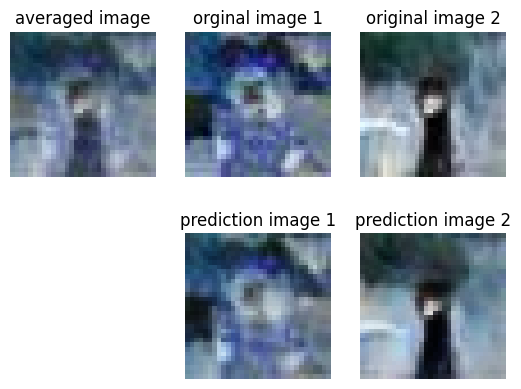

In [32]:
avg_img, pred1, pred2, img1, img2 = test_step_single(model, train_dataloader, loss_fn, device)

plt.subplot(2, 3, 1)
plt.axis("off")
plt.imshow(avg_img.cpu().permute(1, 2, 0))
plt.title("averaged image")

plt.subplot(2, 3, 2)
plt.axis("off")
plt.imshow(img1.cpu().permute(1, 2, 0))
plt.title("orginal image 1")

plt.subplot(2, 3, 3)
plt.axis("off")
plt.imshow(img2.cpu().permute(1, 2, 0))
plt.title("original image 2")

plt.subplot(2, 3, 5)
plt.axis("off")
plt.imshow(pred1.cpu().permute(1, 2, 0))
plt.title("prediction image 1")

plt.subplot(2, 3, 6)
plt.axis("off")
plt.imshow(pred2.cpu().permute(1, 2, 0))
plt.title("prediction image 2")

plt.show()

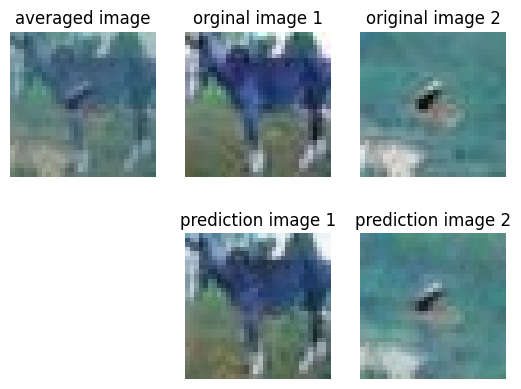

In [33]:
avg_img, pred1, pred2, img1, img2 = test_step_single(model, train_dataloader, loss_fn, device)

plt.subplot(2, 3, 1)
plt.axis("off")
plt.imshow(avg_img.cpu().permute(1, 2, 0))
plt.title("averaged image")

plt.subplot(2, 3, 2)
plt.axis("off")
plt.imshow(img1.cpu().permute(1, 2, 0))
plt.title("orginal image 1")

plt.subplot(2, 3, 3)
plt.axis("off")
plt.imshow(img2.cpu().permute(1, 2, 0))
plt.title("original image 2")

plt.subplot(2, 3, 5)
plt.axis("off")
plt.imshow(pred1.cpu().permute(1, 2, 0))
plt.title("prediction image 1")

plt.subplot(2, 3, 6)
plt.axis("off")
plt.imshow(pred2.cpu().permute(1, 2, 0))
plt.title("prediction image 2")

plt.show()